In [1]:
# =========================
# Colab: Read CSVs from Google Drive, merge, show top 25
# =========================

# 1) Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')  # the "already mounted" message is normal/informational

# 2) Imports
import pandas as pd
import os
from pathlib import Path

# 3) Base path where your files are stored.

base_path = "/content/drive/MyDrive"

# 4) Helper to resolve file path; if not found at base_path, search recursively in My Drive
def resolve_path(filename: str, base: str) -> str:
    p = Path(base) / filename
    if p.exists():
        return str(p)
    # fallback: search anywhere under My Drive
    for found in Path("/content/drive/MyDrive").rglob(filename):
        return str(found)
    raise FileNotFoundError(f"Could not find {filename} under {base} or anywhere in My Drive.")

# 5) Resolve paths for the two CSVs
transaction_path = resolve_path("train_transaction.csv", base_path)
identity_path    = resolve_path("train_identity.csv", base_path)

print("Using files:")
print(" -", transaction_path)
print(" -", identity_path)

# 6) Read the datasets
transaction_df = pd.read_csv(transaction_path)
identity_df    = pd.read_csv(identity_path)

# 7) Merge on TransactionID (left join to keep all transactions)
merged_df = pd.merge(transaction_df, identity_df, on="TransactionID", how="left")

# 8) Shapes
print("Transaction shape:", transaction_df.shape)
print("Identity shape:", identity_df.shape)
print("Merged shape:", merged_df.shape)

# 9) Display top 25 rows (let this be the LAST line so Colab renders the table)
merged_df.head(25)


Mounted at /content/drive
Using files:
 - /content/drive/MyDrive/train_transaction.csv
 - /content/drive/MyDrive/train_identity.csv
Transaction shape: (590540, 394)
Identity shape: (144233, 41)
Merged shape: (590540, 434)


TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0         2987000        0          86400          68.500         W  13926   
1         2987001        0          86401          29.000         W   2755   
2         2987002        0          86469          59.000         W   4663   
3         2987003        0          86499          50.000         W  18132   
4         2987004        0          86506          50.000         H   4497   
5         2987005        0          86510          49.000         W   5937   
6         2987006        0          86522         159.000         W  12308   
7         2987007        0          86529         422.500         W  12695   
8         2987008        0          86535          15.000         H   2803   
9         2987009        0          86536         117.000         W  17399   
10        2987010        0          86549          75.887         C  16496   
11        2987011        0          86555          16.495         C   4461   
12        2987012        0          86564          50.000         W   3786   
13        2987013        0          86585          40.000         W  12866   
14        2987014        0          86596          10.500         W  11839   
15        2987015        0          86618          57.950         W   7055   
16        2987016        0          86620          30.000         H   1790   
17        2987017        0          86668         100.000         H  11492   
18        2987018        0          86725          47.950         W   4663   
19        2987019        0          86730         186.000         W   7005   
20        2987020        0          86761          39.000         W   7875   
21        2987021        0          86769         159.950         W  11401   
22        2987022        0          86786          50.000         H   1724   
23        2987023        0          86808         107.950         W   2392   
24        2987024        0          86821          73.950         W  10112   

    card2  card3       card4  card5  ...                id_31  id_32  \
0     NaN  150.0    discover  142.0  ...                  NaN    NaN   
1   404.0  150.0  mastercard  102.0  ...                  NaN    NaN   
2   490.0  150.0        visa  166.0  ...                  NaN    NaN   
3   567.0  150.0  mastercard  117.0  ...                  NaN    NaN   
4   514.0  150.0  mastercard  102.0  ...  samsung browser 6.2   32.0   
5   555.0  150.0        visa  226.0  ...                  NaN    NaN   
6   360.0  150.0        visa  166.0  ...                  NaN    NaN   
7   490.0  150.0        visa  226.0  ...                  NaN    NaN   
8   100.0  150.0        visa  226.0  ...   mobile safari 11.0   32.0   
9   111.0  150.0  mastercard  224.0  ...                  NaN    NaN   
10  352.0  117.0  mastercard  134.0  ...          chrome 62.0    NaN   
11  375.0  185.0  mastercard  224.0  ...          chrome 62.0    NaN   
12  418.0  150.0        visa  226.0  ...                  NaN    NaN   
13  303.0  150.0        visa  226.0  ...                  NaN    NaN   
14  490.0  150.0        visa  226.0  ...                  NaN    NaN   
15  555.0  150.0        visa  226.0  ...                  NaN    NaN   
16  555.0  150.0        visa  226.0  ...          chrome 62.0   24.0   
17  111.0  150.0  mastercard  219.0  ...          chrome 62.0   24.0   
18  490.0  150.0        visa  166.0  ...                  NaN    NaN   
19  111.0  150.0        visa  226.0  ...                  NaN    NaN   
20  314.0  150.0  mastercard  224.0  ...                  NaN    NaN   
21  543.0  150.0  mastercard  117.0  ...                  NaN    NaN   
22  583.0  150.0        visa  226.0  ...                  NaN    NaN   
23  360.0  150.0  mastercard  166.0  ...                  NaN    NaN   
24  360.0  150.0        visa  166.0  ...                  NaN    NaN   

        id_33           id_34  id_35 id_36 id_37  id_38  DeviceType  \
0         NaN             NaN  

In [2]:
from sklearn.model_selection import train_test_split

# Split the merged dataset into train (70%) and test (30%)
train_df, test_df = train_test_split(merged_df, test_size=0.3, random_state=42)

# Check the sizes
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# Save to CSV if you want
train_df.to_csv("train_split.csv", index=False)
test_df.to_csv("test_split.csv", index=False)


Train shape: (413378, 434)
Test shape: (177162, 434)


In [3]:
# Feature Breakdown
# =========================
import numpy as np
import pandas as pd
from IPython.display import display

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)

def cols_exist(df, cols):
    """Return only columns from `cols` that actually exist in df."""
    return [c for c in cols if c in df.columns]

def expand_range(prefix, start, end, zero_pad=False, pad=2):
    """Create names like V1..V339, C1..C14, D1..D15, M1..M9, id_01..id_38."""
    out = []
    for i in range(start, end + 1):
        out.append(f"{prefix}{str(i).zfill(pad) if zero_pad else i}")
    return out


In [4]:
# ---- Define groups from the data dictionary
core_transaction_fields = ["TransactionID","isFraud","TransactionDT","TransactionAmt","ProductCD"]
payment_card_features   = ["card1","card2","card3","card4","card5","card6"]
address_and_location    = ["addr1","addr2","dist1","dist2"]
email_domains           = ["P_emaildomain","R_emaildomain"]

counting_features       = expand_range("C", 1, 14)          # C1..C14
timedelta_features      = expand_range("D", 1, 15)          # D1..D15
match_features          = expand_range("M", 1, 9)           # M1..M9
vesta_features          = expand_range("V", 1, 339)         # V1..V339

identity_numeric_ids    = expand_range("id_", 1, 11,  True) # id_01..id_11
identity_categorical    = expand_range("id_", 12, 38, True) # id_12..id_38
device_fields           = ["DeviceType","DeviceInfo"]

In [5]:
# ---- Map groups to actual columns present in your merged data
feature_groups = {
    "Core Transaction Fields" : cols_exist(merged_df, core_transaction_fields),
    "Payment Card Features"   : cols_exist(merged_df, payment_card_features),
    "Address & Location"      : cols_exist(merged_df, address_and_location),
    "Email Domains"           : cols_exist(merged_df, email_domains),
    "Counting Features C1–C14": cols_exist(merged_df, counting_features),
    "Timedelta D1–D15"        : cols_exist(merged_df, timedelta_features),
    "Match Features M1–M9"    : cols_exist(merged_df, match_features),
    "Vesta V1–V339"           : cols_exist(merged_df, vesta_features),
    "Identity id_01–id_11"    : cols_exist(merged_df, identity_numeric_ids),
    "Identity id_12–id_38"    : cols_exist(merged_df, identity_categorical),
    "Device Info"             : cols_exist(merged_df, device_fields),
}

def group_breakdown(df, cols):
    """
    Return summary stats for a feature group on the given df:
      - n_cols (present)
      - n_numeric / n_categorical
      - avg_missing_% (mean across columns)
      - example_cols (up to 5)
    """
    if not cols:
        return pd.Series({
            "n_cols": 0,
            "n_numeric": 0,
            "n_categorical": 0,
            "avg_missing_%": np.nan,
            "example_cols": ""
        })
    sub = df[cols]
    numeric_cols = sub.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = [c for c in cols if c not in numeric_cols]
    avg_missing = float(sub.isna().mean().mean() * 100.0)
    return pd.Series({
        "n_cols": len(cols),
        "n_numeric": len(numeric_cols),
        "n_categorical": len(cat_cols),
        "avg_missing_%": round(avg_missing, 2),
        "example_cols": ", ".join(cols[:5])
    })

In [6]:
# ---- Build breakdown for MERGED schema + compare missingness in Train/Test
rows = []
for name, cols in feature_groups.items():
    merged_stats = group_breakdown(merged_df, cols)
    tr_miss = round(train_df[cols].isna().mean().mean() * 100.0, 2) if cols else np.nan
    te_miss = round(test_df[cols].isna().mean().mean() * 100.0, 2) if cols else np.nan

    row = {
        "Feature Group": name,
        **merged_stats.to_dict(),      # expands n_cols, n_numeric, n_categorical, avg_missing_%, example_cols
        "train_missing_%": tr_miss,
        "test_missing_%": te_miss,
    }
    rows.append(row)

feature_breakdown_df = pd.DataFrame(rows).reset_index(drop=True)

print("\n=== FEATURE BREAKDOWN (by dictionary groups) ===")
display(feature_breakdown_df)



=== FEATURE BREAKDOWN (by dictionary groups) ===


Feature Group  n_cols  n_numeric  n_categorical  avg_missing_%                                       example_cols  train_missing_%  test_missing_%
0    Core Transaction Fields       5          4              1           0.00  TransactionID, isFraud, TransactionDT, Transac...             0.00            0.00
1      Payment Card Features       6          4              2           0.51                  card1, card2, card3, card4, card5             0.51            0.49
2         Address & Location       4          4              0          43.88                         addr1, addr2, dist1, dist2            43.90           43.85
3              Email Domains       2          0              2          46.37                       P_emaildomain, R_emaildomain            46.34           46.46
4   Counting Features C1–C14      14         14              0           0.00                                 C1, C2, C3, C4, C5             0.00            0.00
5           Timedelta D1–D15      15         15              0          58.15                                 D1, D2, D3, D4, D5            58.15           58.16
6       Match Features M1–M9       9          0              9          49.92                                 M1, M2, M3, M4, M5            49.91           49.95
7              Vesta V1–V339     339        339              0          43.04                                 V1, V2, V3, V4, V5            43.03           43.05
8       Identity id_01–id_11      11         11              0          84.72                  id_01, id_02, id_03, id_04, id_05            84.73           84.70
9       Identity id_12–id_38      27         12             15          84.87                  id_12, id_13, id_14, id_15, id_16            84.87           84.86
10               Device Info       2          0              2          78.03                             DeviceType, DeviceInfo            78.03           78.02

In [7]:
# ---- Per-column mini-summary
def per_column_summary(df, cols):
    if not cols:
        return pd.DataFrame(columns=["column","dtype","missing_%","nunique"])
    sub = df[cols]
    return pd.DataFrame({
        "column": sub.columns,
        "dtype": [str(t) for t in sub.dtypes.values],
        "missing_%": (sub.isna().mean() * 100).round(2).values,
        "nunique": sub.nunique(dropna=True).values
    }).sort_values(["missing_%","nunique"], ascending=[False, False]).reset_index(drop=True)


In [8]:
# Examples: drill into a few important groups
print("\n=== DETAIL: Core Transaction Fields ===")
display(per_column_summary(merged_df, feature_groups["Core Transaction Fields"]))

print("\n=== DETAIL: Payment Card Features (top 20 by missing %) ===")
display(per_column_summary(merged_df, feature_groups["Payment Card Features"]).head(20))

print("\n=== DETAIL: Device Info ===")
display(per_column_summary(merged_df, feature_groups["Device Info"]))


=== DETAIL: Core Transaction Fields ===


column    dtype  missing_%  nunique
0   TransactionID    int64        0.0   590540
1   TransactionDT    int64        0.0   573349
2  TransactionAmt  float64        0.0    20902
3       ProductCD   object        0.0        5
4         isFraud    int64        0.0        2


=== DETAIL: Payment Card Features (top 20 by missing %) ===


column    dtype  missing_%  nunique
0  card2  float64       1.51      500
1  card5  float64       0.72      119
2  card3  float64       0.27      114
3  card4   object       0.27        4
4  card6   object       0.27        4
5  card1    int64       0.00    13553


=== DETAIL: Device Info ===


column   dtype  missing_%  nunique
0  DeviceInfo  object      79.91     1786
1  DeviceType  object      76.16        2

In [9]:
# ---- Sanity checks: fraud ratios & quick samples
def fraud_rate(df):
    return float(df["isFraud"].mean() * 100.0) if "isFraud" in df.columns else np.nan

print("\nOverall fraud rate (%):", round(fraud_rate(merged_df), 3))
print("Train fraud rate   (%):", round(fraud_rate(train_df), 3))
print("Test  fraud rate   (%):", round(fraud_rate(test_df), 3))

print("\nTrain sample (5 rows):")
display(train_df.sample(5, random_state=1))

print("\nTest sample (5 rows):")
display(test_df.sample(5, random_state=1))


Overall fraud rate (%): 3.499
Train fraud rate   (%): 3.465
Test  fraud rate   (%): 3.579

Train sample (5 rows):


TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2 P_emaildomain R_emaildomain   C1    C2   C3   C4  \
538564        3525564        1       14200973           31.97         C  18250  545.0  185.0        visa  226.0  credit    NaN    NaN    NaN   17.0     gmail.com     gmail.com  3.0  17.0  0.0  1.0   
533184        3520184        0       14054263           77.00         W   1428  360.0  150.0        visa  166.0   debit  485.0   87.0    NaN    NaN     gmail.com           NaN  2.0   3.0  0.0  0.0   
318128        3305128        0        7923778          107.95         W   9500  321.0  150.0        visa  226.0   debit  272.0   87.0    NaN    NaN     yahoo.com           NaN  1.0   1.0  0.0  0.0   
391363        3378363        0        9827765           65.00         W   2830  555.0  150.0        visa  226.0   debit  299.0   87.0    3.0    NaN           NaN           NaN  4.0   3.0  0.0  0.0   
133724        3120724        0        2668725          107.95         W  11162  346.0  150.0  mastercard  224.0   debit  299.0   87.0    NaN    NaN           NaN           NaN  1.0   1.0  0.0  0.0   

         C5   C6   C7   C8   C9  C10  C11  C12   C13  C14     D1     D2     D3     D4     D5   D6   D7        D8        D9    D10    D11  D12  D13  D14    D15   M1   M2   M3   M4   M5   M6   M7  \
538564  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0   1.0  1.0    1.0    NaN    0.0    1.0    0.0  1.0  0.0  1.333333  0.333333    0.0    NaN  1.0  1.0  1.0    1.0  NaN  NaN  NaN   M2  NaN  NaN  NaN   
533184  0.0  2.0  0.0  0.0  3.0  0.0  1.0  0.0  12.0  2.0  209.0  209.0   12.0  167.0   12.0  NaN  NaN       NaN       NaN   62.0    0.0  NaN  NaN  NaN  209.0    T    T    F   M0    F    F    F   
318128  3.0  2.0  0.0  0.0  1.0  0.0  1.0  0.0   5.0  1.0  267.0  267.0  115.0  267.0  123.0  NaN  NaN       NaN       NaN  267.0    NaN  NaN  NaN  NaN  267.0  NaN  NaN  NaN  NaN  NaN    T  NaN   
391363  1.0  3.0  0.0  0.0  3.0  0.0  1.0  0.0  36.0  4.0  217.0  217.0   35.0    0.0    NaN  NaN  NaN       NaN       NaN  491.0  435.0  NaN  NaN  NaN  491.0    T    F    F   M1    F    F    F   
133724  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   5.0  1.0  211.0  211.0   38.0    NaN    NaN  NaN  NaN       NaN       NaN  212.0    NaN  NaN  NaN  NaN  212.0  NaN  NaN  NaN  NaN  NaN    T  NaN   

         M8   M9   V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  V30  V31  V32  V33  V34  V35  V36  \
538564  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0   
533184    F    F  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
318128  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0   
391363    F    T  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
133724  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  NaN  NaN   

        V37   V38  V39  V40  V41  V42  V43  V44  V45  ...  V280  V281  V282  V283  V284  V285  V286  V287  V288  V289  V290  V291  V292  V293  V294  V295  V296  V297  V298  V299  V300  V301  V302  \
538564  9.0  17.0  1.0  1.0  1.0  1.0  1.0  3.0  3.0  ...   2.0   0.0   3.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0   3.0   3.0   3.0   2.0   2.0   2.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
533184  1.0   1.0  0.0  0


Test sample (5 rows):


TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  card2  card3 card4  card5  card6  addr1  addr2  dist1  dist2 P_emaildomain R_emaildomain   C1   C2   C3   C4   C5  \
13455         3000455        0         396426           50.00         W   4463  555.0  150.0  visa  226.0  debit  231.0   87.0    NaN    NaN     gmail.com           NaN  2.0  1.0  0.0  0.0  2.0   
224378        3211378        0        5282000          105.95         W   7664  490.0  150.0  visa  226.0  debit  264.0   87.0   37.0    NaN           NaN           NaN  2.0  1.0  0.0  0.0  2.0   
454478        3441478        0       11630768          108.50         W  13366  437.0  150.0  visa  226.0  debit  337.0   87.0  132.0    NaN     gmail.com           NaN  2.0  2.0  0.0  0.0  0.0   
209630        3196630        0        4837940          117.00         W  15497  490.0  150.0  visa  226.0  debit  299.0   87.0    NaN    NaN     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0   
533109        3520109        0       14053003           58.95         W  12544  321.0  150.0  visa  226.0  debit  337.0   87.0    NaN    NaN     gmail.com           NaN  2.0  1.0  0.0  0.0  1.0   

         C6   C7   C8   C9  C10  C11  C12   C13  C14     D1     D2    D3     D4     D5  D6  D7  D8  D9    D10   D11  D12  D13  D14    D15   M1   M2   M3   M4   M5 M6   M7   M8   M9   V1   V2   V3  \
13455   1.0  0.0  0.0  1.0  0.0  2.0  0.0  27.0  2.0  327.0  327.0  15.0    NaN    NaN NaN NaN NaN NaN  479.0   NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  F  NaN  NaN  NaN  NaN  NaN  NaN   
224378  1.0  0.0  0.0  2.0  0.0  1.0  0.0   3.0  2.0    0.0    0.0   0.0    NaN    NaN NaN NaN NaN NaN    7.0   7.0  NaN  NaN  NaN    7.0    T    T    F  NaN  NaN  T    F    F    T  1.0  1.0  1.0   
454478  2.0  0.0  0.0  2.0  0.0  2.0  0.0   3.0  2.0   18.0   18.0   0.0   22.0    0.0 NaN NaN NaN NaN   22.0  22.0  NaN  NaN  NaN   22.0    T    T    F   M1    F  F    F    F    F  1.0  1.0  1.0   
209630  1.0  0.0  0.0  2.0  0.0  1.0  0.0   7.0  1.0  173.0  173.0  28.0  173.0   28.0 NaN NaN NaN NaN  173.0   NaN  NaN  NaN  NaN  173.0  NaN  NaN  NaN   M0    T  T  NaN  NaN  NaN  NaN  NaN  NaN   
533109  1.0  0.0  0.0  1.0  0.0  1.0  0.0   2.0  2.0    0.0    NaN   NaN  298.0  298.0 NaN NaN NaN NaN  298.0   0.0  NaN  NaN  NaN  298.0    T    T    T  NaN  NaN  T    F    T    T  1.0  1.0  1.0   

         V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  V30  V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  \
13455   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
224378  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
454478  1.0  1.0  1.0  2.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  2.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
209630  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
533109  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0   

        V42  V43  V44  V45  ...  V280  V281  V282  V283  V284  V285  V286  V287  V288  V289  V290  V291  V292  V293  V294  V295  V296  V297  V298  V299  V300  V301  V302  V303  V304  V305  \
13455   NaN  NaN  NaN  NaN  ...   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   1.0   2.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
224378  NaN  NaN  NaN  NaN  ...   1.0   1.0   2

In [10]:
 #=========================
# RAM-SAFE FEATURE ENGINEERING (Disk-backed batches)
# =========================
import os, gc, math, tempfile
import numpy as np
import pandas as pd

# -------- 0) PREREQS
# Already created merged_df, train_df, test_df
# Required columns in merged_df:
need = ["TransactionID","TransactionDT","TransactionAmt","card1","addr1",
        "P_emaildomain","R_emaildomain","DeviceInfo","DeviceType","ProductCD"]
missing = [c for c in need if c not in merged_df.columns]
if missing:
    raise RuntimeError(f"merged_df missing columns: {missing}")


In [11]:
# -------- 1) DTYPE TUNING to save RAM
def downcast_numeric(df):
    for c in df.select_dtypes(include=["float64"]).columns:
        df[c] = pd.to_numeric(df[c], downcast="float")
    for c in df.select_dtypes(include=["int64","int32","int"]).columns:
        df[c] = pd.to_numeric(df[c], downcast="integer")
    return df

fe_df = merged_df[need].copy()
fe_df = downcast_numeric(fe_df)

for c in ["P_emaildomain","R_emaildomain","DeviceInfo","DeviceType","ProductCD"]:
    fe_df[c] = fe_df[c].astype("category")


In [12]:
# -------- 2) DOMAIN FEATURES (vectorized)
def _email_provider(s):
    if pd.isna(s): return "unknown"
    x = str(s).lower().split("@")[-1]
    return x.split(".")[0] if x else "unknown"

def _email_tld(s):
    if pd.isna(s): return "unknown"
    x = str(s).lower().split("@")[-1]
    parts = x.split(".")
    return parts[-1] if parts else "unknown"

def _device_maker(s):
    if pd.isna(s): return "other"
    x = str(s).lower()
    if ("samsung" in x) or ("sm-" in x): return "samsung"
    if any(k in x for k in ["iphone","ipad","ios","mac","apple"]): return "apple"
    if any(k in x for k in ["huawei","honor"]): return "huawei"
    if ("xiaomi" in x) or ("redmi" in x) or ("mi " in x) or x.startswith("mi-"): return "xiaomi"
    if any(k in x for k in ["moto","motorola"]): return "motorola"
    if "oppo" in x: return "oppo"
    if "vivo" in x: return "vivo"
    if "oneplus" in x: return "oneplus"
    if "nokia" in x: return "nokia"
    if "lg" in x: return "lg"
    if "windows" in x: return "windows"
    if ("linux" in x) or ("ubuntu" in x): return "linux"
    if "android" in x: return "android"
    return "other"

fe_df["P_emaildomain_provider"] = fe_df["P_emaildomain"].map(_email_provider).astype("category")
fe_df["P_emaildomain_tld"]      = fe_df["P_emaildomain"].map(_email_tld).astype("category")
fe_df["R_emaildomain_provider"] = fe_df["R_emaildomain"].map(_email_provider).astype("category")
fe_df["R_emaildomain_tld"]      = fe_df["R_emaildomain"].map(_email_tld).astype("category")
fe_df["DeviceMaker"]            = fe_df["DeviceInfo"].map(_device_maker).astype("category")
fe_df["is_mobile"]              = fe_df["DeviceType"].astype(str).str.lower().eq("mobile").astype("int8")

amt = pd.to_numeric(fe_df["TransactionAmt"], errors="coerce").astype("float32")
fe_df["TransactionAmt_log1p"]  = np.log1p(amt.clip(lower=0)).astype("float32")

def _is_three_decimals(a):
    a3 = (a * 1000).round() / 1000.0
    a2 = (a * 100).round()  / 100.0
    return (np.isclose(a, a3) & ~np.isclose(a, a2)).astype("int8")
fe_df["TransactionAmt_is3dec"] = _is_three_decimals(amt)


In [13]:
# -------- 3) UIDs & STATIC UID AGGS (transform/map only; no large merges)
fe_df["card1_f"] = pd.to_numeric(fe_df["card1"], errors="coerce").fillna(-1).astype("int32")
fe_df["addr1_f"] = pd.to_numeric(fe_df["addr1"], errors="coerce").fillna(-1).astype("int32")
fe_df["uid"]  = (fe_df["card1_f"].astype(str) + "_" + fe_df["addr1_f"].astype(str)).astype("category")
fe_df["uid2"] = (fe_df["uid"].astype(str) + "_" + fe_df["P_emaildomain_provider"].astype(str)).astype("category")
fe_df["uid3"] = (fe_df["uid2"].astype(str) + "_" + fe_df["DeviceMaker"].astype(str)).astype("category")

grp = fe_df.groupby("uid")["TransactionAmt"]
fe_df["uid_amt_mean"]   = grp.transform("mean").astype("float32")
fe_df["uid_amt_std"]    = grp.transform("std").astype("float32")
fe_df["uid_amt_min"]    = grp.transform("min").astype("float32")
fe_df["uid_amt_max"]    = grp.transform("max").astype("float32")
fe_df["uid_amt_median"] = grp.transform("median").astype("float32")
fe_df["uid_txn_ct"]     = grp.transform("count").astype("int32")

eps = np.float32(1e-3)
fe_df["amt_to_uid_mean"]   = (amt / (fe_df["uid_amt_mean"] + eps)).astype("float32")
fe_df["amt_to_uid_median"] = (amt / (fe_df["uid_amt_median"] + eps)).astype("float32")

def _nunique_map(df, by, col, outname):
    s = df.groupby(by)[col].nunique(dropna=False)
    df[outname] = df[by].map(s).astype("int32")
_nunique_map(fe_df, "uid", "P_emaildomain_provider", "uid_pemail_prov_nui")
_nunique_map(fe_df, "uid", "DeviceMaker",              "uid_dev_maker_nui")
_nunique_map(fe_df, "uid", "ProductCD",               "uid_prodcd_nui")


/tmp/ipython-input-572441766.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = fe_df.groupby("uid")["TransactionAmt"]
/tmp/ipython-input-572441766.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  s = df.groupby(by)[col].nunique(dropna=False)
/tmp/ipython-input-572441766.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  s = df.groupby(by)[col].nunique(dropna=False)
/tmp/ipython-input-572441766.py:21: Future

In [14]:
# -------- 4) TIME COLUMN
origin = pd.Timestamp("2017-12-01")
fe_df["DT"] = origin + pd.to_timedelta(pd.to_numeric(fe_df["TransactionDT"], errors="coerce").fillna(0).astype("int64"), unit="s")


In [15]:
# -------- 5) DISK-BACKED ROLLING FEATURES (append per-UID batch to Parquet)
engineered_cols_static = [
    "TransactionID","P_emaildomain_provider","P_emaildomain_tld",
    "R_emaildomain_provider","R_emaildomain_tld",
    "DeviceMaker","is_mobile",
    "TransactionAmt_log1p","TransactionAmt_is3dec",
    "uid","uid2","uid3",
    "uid_txn_ct","uid_amt_mean","uid_amt_std","uid_amt_min","uid_amt_max","uid_amt_median",
    "amt_to_uid_mean","amt_to_uid_median",
    "uid_pemail_prov_nui","uid_dev_maker_nui","uid_prodcd_nui",
    "DT","TransactionAmt"
]

temp_dir = tempfile.mkdtemp(prefix="ieee_roll_")
temp_parquet = os.path.join(temp_dir, "rolling_batches.parquet")
if os.path.exists(temp_parquet):
    os.remove(temp_parquet)



In [16]:
import os, gc, glob
import numpy as np
import pandas as pd
import tempfile

# ... your engineered_cols_static, temp_dir setup, etc. stay the same

uids = fe_df["uid"].astype(str).unique()
uids.sort()
BATCH = 600

def compute_rollings_for_chunk(df_chunk: pd.DataFrame) -> pd.DataFrame:
    """
    Requires columns: TransactionID, uid, DT, TransactionAmt.
    Returns TransactionID + rolling features. Safe for empty input.
    """
    out_cols = [
        "TransactionID",
        "uid_cnt_1d","uid_cnt_7d","uid_cnt_30d",
        "uid_amt_sum_1d","uid_amt_sum_7d","uid_amt_sum_30d",
        "uid_amt_mean_7d","uid_amt_mean_30d","uid_days_since_prev"
    ]
    if df_chunk.empty:
        return pd.DataFrame(columns=out_cols)

    # Ensure datetime and minimal sort
    if not pd.api.types.is_datetime64_any_dtype(df_chunk["DT"]):
        df_chunk = df_chunk.copy()
        df_chunk["DT"] = pd.to_datetime(df_chunk["DT"], errors="coerce")

    df_chunk = df_chunk.sort_values(["uid","DT"]).copy()

    # Prepare output skeleton
    out = df_chunk[["TransactionID"]].copy()
    out["uid_cnt_1d"] = 0.0
    out["uid_cnt_7d"] = 0.0
    out["uid_cnt_30d"] = 0.0
    out["uid_amt_sum_1d"] = 0.0
    out["uid_amt_sum_7d"] = 0.0
    out["uid_amt_sum_30d"] = 0.0
    out["uid_amt_mean_7d"] = 0.0
    out["uid_amt_mean_30d"] = 0.0
    out["uid_days_since_prev"] = 9999.0

    for uid_val, g in df_chunk.groupby("uid", sort=False):
        if g.empty:
            continue

        g = g.sort_values("DT")
        dt = g["DT"]
        amt = g["TransactionAmt"].astype("float32").values

        # Build Series with a proper DatetimeIndex (important for time-based rolling)
        s_cnt = pd.Series(1.0, index=dt)      # not dt.values
        s_amt = pd.Series(amt,  index=dt)

        # Rolling (shift(1) to exclude current row)
        r1c  = s_cnt.rolling("1D").count().shift(1).astype("float32")
        r7c  = s_cnt.rolling("7D").count().shift(1).astype("float32")
        r30c = s_cnt.rolling("30D").count().shift(1).astype("float32")

        r1s  = s_amt.rolling("1D").sum().shift(1).astype("float32")
        r7s  = s_amt.rolling("7D").sum().shift(1).astype("float32")
        r30s = s_amt.rolling("30D").sum().shift(1).astype("float32")

        r7m  = s_amt.rolling("7D").mean().shift(1).astype("float32")
        r30m = s_amt.rolling("30D").mean().shift(1).astype("float32")

        # Days since previous txn (fill first with 9999)
        dtdiff_days = dt.diff().dt.total_seconds().div(86400.0).astype("float32").fillna(np.float32(9999.0))

        # Map back to out
        idx = out.index[out["TransactionID"].isin(g["TransactionID"])]
        out.loc[idx, "uid_cnt_1d"]       = r1c.values
        out.loc[idx, "uid_cnt_7d"]       = r7c.values
        out.loc[idx, "uid_cnt_30d"]      = r30c.values
        out.loc[idx, "uid_amt_sum_1d"]   = r1s.values
        out.loc[idx, "uid_amt_sum_7d"]   = r7s.values
        out.loc[idx, "uid_amt_sum_30d"]  = r30s.values
        out.loc[idx, "uid_amt_mean_7d"]  = r7m.values
        out.loc[idx, "uid_amt_mean_30d"] = r30m.values
        out.loc[idx, "uid_days_since_prev"] = dtdiff_days.values

    return out[out_cols]

# --- Write static once ---
static_df = fe_df[engineered_cols_static].copy()
static_path = os.path.join(temp_dir, "static.parquet")
static_df.to_parquet(static_path, index=False)
del static_df; gc.collect()

# --- Write EVERY batch to a part file (no special-casing first batch) ---
part_paths = []
for i in range(0, len(uids), BATCH):
    uid_slice = uids[i:i+BATCH]
    sub = fe_df[fe_df["uid"].astype(str).isin(uid_slice)]

    roll_chunk = compute_rollings_for_chunk(sub)[[
        "TransactionID","uid_cnt_1d","uid_cnt_7d","uid_cnt_30d",
        "uid_amt_sum_1d","uid_amt_sum_7d","uid_amt_sum_30d",
        "uid_amt_mean_7d","uid_amt_mean_30d","uid_days_since_prev"
    ]]

    part_path = os.path.join(temp_dir, f"roll_part_{i//BATCH:05d}.parquet")
    roll_chunk.to_parquet(part_path, index=False)
    part_paths.append(part_path)

    del sub, roll_chunk
    gc.collect()

# --- Concatenate parts once, write final parquet ---
if part_paths:
    rolling_all = pd.concat((pd.read_parquet(p) for p in sorted(part_paths)), ignore_index=True)
    temp_parquet = os.path.join(temp_dir, "rolling_batches.parquet")
    rolling_all.to_parquet(temp_parquet, index=False)
    del rolling_all; gc.collect()
    for p in part_paths:
        os.remove(p)

# --- Rebuild final feature frame ---
static_df  = pd.read_parquet(static_path)
rolling_df = pd.read_parquet(temp_parquet)
fe_df_small = static_df.merge(rolling_df, on="TransactionID", how="left")

engineered_cols = [
    "TransactionID",
    "P_emaildomain_provider","P_emaildomain_tld",
    "R_emaildomain_provider","R_emaildomain_tld",
    "DeviceMaker","is_mobile",
    "TransactionAmt_log1p","TransactionAmt_is3dec",
    "uid","uid2","uid3",
    "uid_txn_ct","uid_amt_mean","uid_amt_std","uid_amt_min","uid_amt_max","uid_amt_median",
    "amt_to_uid_mean","amt_to_uid_median",
    "uid_pemail_prov_nui","uid_dev_maker_nui","uid_prodcd_nui",
    "DT",
    "uid_cnt_1d","uid_cnt_7d","uid_cnt_30d",
    "uid_amt_sum_1d","uid_amt_sum_7d","uid_amt_sum_30d",
    "uid_amt_mean_7d","uid_amt_mean_30d",
    "uid_days_since_prev"
]
fe_df_small = fe_df_small[engineered_cols].copy()


/tmp/ipython-input-2077215363.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for uid_val, g in df_chunk.groupby("uid", sort=False):
/tmp/ipython-input-2077215363.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for uid_val, g in df_chunk.groupby("uid", sort=False):
/tmp/ipython-input-2077215363.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for uid_val, g in df_chunk.groupby("uid", sort=False):
/tmp/ipyth

In [17]:
cols_to_show = [
    "TransactionID","uid","uid_txn_ct","uid_amt_mean","amt_to_uid_mean",
    "uid_cnt_7d","uid_amt_sum_7d","uid_days_since_prev",
    "P_emaildomain_provider","P_emaildomain_tld",
    "DeviceMaker","is_mobile","TransactionAmt_log1p","TransactionAmt_is3dec"
]

print(fe_df_small[cols_to_show].head(10))  # show first 10 rows


   TransactionID        uid  uid_txn_ct  uid_amt_mean  amt_to_uid_mean  uid_cnt_7d  uid_amt_sum_7d  uid_days_since_prev P_emaildomain_provider P_emaildomain_tld DeviceMaker  is_mobile  \
0        2987000  13926_315           3    142.000000         0.482391         NaN             NaN               9999.0                unknown           unknown       other          0   
1        2987001   2755_325          61    275.521637         0.105255         NaN             NaN               9999.0                  gmail               com       other          0   
2        2987002   4663_330          34     52.433529         1.125213         NaN             NaN               9999.0                outlook               com       other          0   
3        2987003  18132_476         257    124.769531         0.400736         NaN             NaN               9999.0                  yahoo               com       other          0   
4        2987004   4497_420           1     50.000000         0.9

In [18]:
print("Final engineered feature set shape:", fe_df_small.shape)
print(fe_df_small.head())



Final engineered feature set shape: (590540, 33)
   TransactionID P_emaildomain_provider P_emaildomain_tld R_emaildomain_provider R_emaildomain_tld DeviceMaker  is_mobile  TransactionAmt_log1p  TransactionAmt_is3dec        uid               uid2  \
0        2987000                unknown           unknown                unknown           unknown       other          0              4.241327                      0  13926_315  13926_315_unknown   
1        2987001                  gmail               com                unknown           unknown       other          0              3.401197                      0   2755_325     2755_325_gmail   
2        2987002                outlook               com                unknown           unknown       other          0              4.094345                      0   4663_330   4663_330_outlook   
3        2987003                  yahoo               com                unknown           unknown       other          0              3.931826        

In [19]:
fe_df_small


TransactionID P_emaildomain_provider P_emaildomain_tld R_emaildomain_provider R_emaildomain_tld DeviceMaker  is_mobile  TransactionAmt_log1p  TransactionAmt_is3dec        uid  \
0             2987000                unknown           unknown                unknown           unknown       other          0              4.241327                      0  13926_315   
1             2987001                  gmail               com                unknown           unknown       other          0              3.401197                      0   2755_325   
2             2987002                outlook               com                unknown           unknown       other          0              4.094345                      0   4663_330   
3             2987003                  yahoo               com                unknown           unknown       other          0              3.931826                      0  18132_476   
4             2987004                  gmail               com                unknown           unknown     samsung          1              3.931826                      0   4497_420   
...               ...                    ...               ...                    ...               ...         ...        ...                   ...                    ...        ...   
590535        3577535                unknown           unknown                unknown           unknown       other          0              3.912023                      0   6550_272   
590536        3577536                  gmail               com                unknown           unknown       other          0              3.701302                      0  10444_204   
590537        3577537                  gmail               com                unknown           unknown       other          0              3.464172                      0  12037_231   
590538        3577538                    aol               com                unknown           unknown       other          0              4.770685                      0   7826_387   
590539        3577539                  gmail               com                unknown           unknown       other          0              5.638177                      0  15066_299   

                     uid2                     uid3  uid_txn_ct  uid_amt_mean  uid_amt_std  uid_amt_min  uid_amt_max  uid_amt_median  amt_to_uid_mean  amt_to_uid_median  uid_pemail_prov_nui  \
0       13926_315_unknown  13926_315_unknown_other           3    142.000000   152.654022        40.00   317.500000       68.500000         0.482391           0.999985                    3   
1          2755_325_gmail     2755_325_gmail_other          61    275.521637   609.754028        29.00  4592.020020      108.500000         0.105255           0.267279                    6   
2        4663_330_outlook   4663_330_outlook_other          34     52.433529    22.055990        25.00   122.989998       49.000000         1.125213           1.204057                    7   
3         18132_476_yahoo    18132_476_yahoo_other         257    124.769531   248.511734         6.00  3190.000000       88.500000         0.400736           0.564965                    9   
4          4497_420_gmail   4497_420_gmail_samsung           1     50.000000          NaN        50.00    50.000000       50.000000         0.999980           0.999980                    1   
...                   ...                      ...         ...           ...          ...          ...          ...             ...              ...                ...                  ...   
590535   6550_272_unknown   6550_272_unknown_other          21     63.945236    24.885582        15.95   117.000000       59.000000         0.766269           0.830494                    3   
590536    10444_204_gmail    10444_204_gmail_other          12    242.041672    98.117386        39.50   335.000000      280.000000         0.163194           0.141071                    3   
590537    12037_231_gmail    12037_231_gmail_ot

In [20]:
# ==========================================
# Plotting Debug + Visualizations (Colab-ready)
# Works if you have `train_fe`; falls back to `merged_df`.
# Forces inline backend and ensures required columns exist.
# ==========================================
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

print("Matplotlib:", matplotlib.__version__, "| Backend:", matplotlib.get_backend())



Matplotlib: 3.10.0 | Backend: module://matplotlib_inline.backend_inline


In [21]:
import numpy as np
import pandas as pd
import gc

# --------- Pick a dataframe to analyze (no copy to save RAM)
if "train_fe" in globals():
    df = train_fe
elif "merged_df" in globals():
    df = merged_df
else:
    raise RuntimeError("No DataFrame found. Define `train_fe` or `merged_df` first.")

n_rows, n_cols = df.shape
print(f"Analyzing df with shape = {df.shape}")

# ------------------------------------------
# Column-wise missing summary (lightweight)
# ------------------------------------------
# These operations stream over columns; they don't materialize a full boolean matrix at once.
missing_count = df.isna().sum()
available_count = n_rows - missing_count
missing_pct = (missing_count / n_rows) * 100.0

col_summary = (
    pd.DataFrame({
        "Column": df.columns,
        "Total_Records": n_rows,
        "Missing_Count": missing_count.values,
        "Available_Count": available_count.values,
        "Missing_%": missing_pct.values
    })
    .sort_values("Missing_%", ascending=False, kind="mergesort")  # stable sort
    .reset_index(drop=True)
)

# Show Top 25 columns with most missing
top25_missing = col_summary.head(25)
print("\nTop 25 Columns with Most Missing Values:")
print(top25_missing)

# ------------------------------------------
# Row-level missing features (chunked to avoid O(n_rows*n_cols) boolean matrix)
# ------------------------------------------
# If you truly need row-level features, compute incrementally in column blocks.
BLOCK_COLS = 40  # tune based on RAM; smaller = safer
row_null_count = np.zeros(n_rows, dtype=np.int32)

cols = df.columns.to_list()
for start in range(0, n_cols, BLOCK_COLS):
    end = min(start + BLOCK_COLS, n_cols)
    block = df.iloc[:, start:end]
    # Boolean mask only for this block, released each loop
    row_null_count += block.isna().sum(axis=1).to_numpy(dtype=np.int32)
    del block
    gc.collect()

# Attach row-level features (lightweight arrays)
# (Avoid float64 by casting)
df["row_null_count"] = row_null_count
df["row_null_ratio"] = (row_null_count / n_cols * 100.0).astype("float32")

print("\nAdded row-level features: row_null_count, row_null_ratio")
print(df[["row_null_count", "row_null_ratio"]].head(10))

# ------------------------------------------
# (Optional) Persist the summaries to files instead of printing giant tables
# ------------------------------------------
# col_summary.to_csv("column_missing_summary.csv", index=False)
# top25_missing.to_csv("top25_missing_summary.csv", index=False)
# print("\nSaved: column_missing_summary.csv and top25_missing_summary.csv")


Analyzing df with shape = (590540, 434)

Top 25 Columns with Most Missing Values:
   Column  Total_Records  Missing_Count  Available_Count  Missing_%
0   id_24         590540         585793             4747  99.196159
1   id_25         590540         585408             5132  99.130965
2   id_07         590540         585385             5155  99.127070
3   id_08         590540         585385             5155  99.127070
4   id_21         590540         585381             5159  99.126393
5   id_26         590540         585377             5163  99.125715
6   id_22         590540         585371             5169  99.124699
7   id_23         590540         585371             5169  99.124699
8   id_27         590540         585371             5169  99.124699
9   dist2         590540         552913            37627  93.628374
10     D7         590540         551623            38917  93.409930
11  id_18         590540         545427            45113  92.360721
12    D13         590540         5

In [22]:
import numpy as np
import pandas as pd
import gc

# --------- Pick a dataframe to analyze (no copy to save RAM)
if "train_fe" in globals():
    df = train_fe
elif "merged_df" in globals():
    df = merged_df
else:
    raise RuntimeError("No DataFrame found. Define `train_fe` or `merged_df` first.")

# ===============================
# Vectorized helpers (Series in, Series out)
# ===============================
def _v_safe_lower(s: pd.Series) -> pd.Series:
    # fast vectorized lower with NA handling
    return s.astype("string").str.lower().fillna("unknown")

def _v_email_domain_only(s: pd.Series) -> pd.Series:
    # take right of '@' if present; keep unknown if NA
    s = s.astype("string").fillna("unknown").str.lower()
    return s.str.split('@').str[-1]

def _v_email_provider(s: pd.Series) -> pd.Series:
    d = _v_email_domain_only(s)
    prov = d.str.split('.').str[0]
    return prov.fillna("unknown").replace("", "unknown")

def _v_email_tld(s: pd.Series) -> pd.Series:
    d = _v_email_domain_only(s)
    tld = d.str.split('.').str[-1]
    return tld.fillna("unknown").replace("", "unknown")

def _v_device_maker(devinfo: pd.Series) -> pd.Series:
    s = devinfo.astype("string").str.lower().fillna("unknown")
    out = pd.Series(np.full(len(s), "other", dtype=object), index=s.index)

    # boolean masks (vectorized)
    m_samsung  = s.str.contains(r"\bsamsung\b", na=False) | s.str.contains(r"\bsm-", na=False)
    m_apple    = s.str.contains(r"\b(iphone|ipad|ios|mac|apple)\b", na=False)
    m_huawei   = s.str.contains(r"\b(huawei|honor)\b", na=False)
    m_xiaomi   = s.str.contains(r"\b(xiaomi|redmi)\b", na=False) | s.str.startswith("mi-", na=False) | s.str.contains(r"\bmi ", na=False)
    m_moto     = s.str.contains(r"\b(moto|motorola)\b", na=False)
    m_oppo     = s.str.contains(r"\boppo\b", na=False)
    m_vivo     = s.str.contains(r"\bvivo\b", na=False)
    m_oneplus  = s.str.contains(r"\boneplus\b", na=False)
    m_nokia    = s.str.contains(r"\bnokia\b", na=False)
    m_lg       = s.str.contains(r"\blg\b", na=False)
    m_windows  = s.str.contains(r"\bwindows\b", na=False)
    m_linux    = s.str.contains(r"\blinux|ubuntu\b", na=False)
    m_android  = s.str.contains(r"\bandroid\b", na=False)

    out[m_samsung] = "samsung"
    out[m_apple]   = "apple"
    out[m_huawei]  = "huawei"
    out[m_xiaomi]  = "xiaomi"
    out[m_moto]    = "motorola"
    out[m_oppo]    = "oppo"
    out[m_vivo]    = "vivo"
    out[m_oneplus] = "oneplus"
    out[m_nokia]   = "nokia"
    out[m_lg]      = "lg"
    out[m_windows] = "windows"
    out[m_linux]   = "linux"
    out[m_android] = "android"
    return out.astype("string")

def _v_is_three_decimals(x: pd.Series) -> pd.Series:
    a = pd.to_numeric(x, errors="coerce").to_numpy(np.float64)
    # close to 3-decimals but not 2-decimals
    a3 = np.round(a * 1000) / 1000.0
    a2 = np.round(a * 100)  / 100.0
    mask = (np.isclose(a, a3, rtol=0, atol=1e-12) & ~np.isclose(a, a2, rtol=0, atol=1e-12))
    return pd.Series(mask.astype(np.int8), index=x.index)

# =========================================
# Ensure core derived columns exist (only if sources are present)
# =========================================

# Email-derived features
if "P_emaildomain" in df.columns:
    if "P_emaildomain_provider" not in df.columns:
        df["P_emaildomain_provider"] = _v_email_provider(df["P_emaildomain"])
    if "P_emaildomain_tld" not in df.columns:
        df["P_emaildomain_tld"] = _v_email_tld(df["P_emaildomain"])

if "R_emaildomain" in df.columns:
    if "R_emaildomain_provider" not in df.columns:
        df["R_emaildomain_provider"] = _v_email_provider(df["R_emaildomain"])
    if "R_emaildomain_tld" not in df.columns:
        df["R_emaildomain_tld"] = _v_email_tld(df["R_emaildomain"])

# Device info
if "DeviceInfo" in df.columns and "DeviceMaker" not in df.columns:
    df["DeviceMaker"] = _v_device_maker(df["DeviceInfo"])

# is_mobile: prefer DeviceType if present; else infer from text hints
if "is_mobile" not in df.columns:
    if "DeviceType" in df.columns:
        s = df["DeviceType"].astype("string").str.lower().fillna("unknown")
        df["is_mobile"] = s.eq("mobile").astype("int8")
        del s
    elif "DeviceInfo" in df.columns:
        s = df["DeviceInfo"].astype("string").str.lower().fillna("unknown")
        hint = (
            s.str.contains("mobile", na=False) |
            s.str.contains("android", na=False) |
            s.str.contains("iphone", na=False)
        )
        df["is_mobile"] = hint.astype("int8")
        del s, hint
    else:
        df["is_mobile"] = 0  # fallback

# Transaction amount transforms
if "TransactionAmt" in df.columns:
    if "TransactionAmt_log1p" not in df.columns:
        amt = pd.to_numeric(df["TransactionAmt"], errors="coerce")
        df["TransactionAmt_log1p"] = np.log1p(amt).astype("float32")
        del amt
    if "TransactionAmt_is3dec" not in df.columns:
        df["TransactionAmt_is3dec"] = _v_is_three_decimals(df["TransactionAmt"])

gc.collect()

print("✅ Derived columns ensured (where sources existed):",
      [c for c in ["P_emaildomain_provider","P_emaildomain_tld",
                   "R_emaildomain_provider","R_emaildomain_tld",
                   "DeviceMaker","is_mobile",
                   "TransactionAmt_log1p","TransactionAmt_is3dec"]
       if c in df.columns])


/tmp/ipython-input-691731877.py:41: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  m_apple    = s.str.contains(r"\b(iphone|ipad|ios|mac|apple)\b", na=False)
/tmp/ipython-input-691731877.py:42: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  m_huawei   = s.str.contains(r"\b(huawei|honor)\b", na=False)
/tmp/ipython-input-691731877.py:43: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  m_xiaomi   = s.str.contains(r"\b(xiaomi|redmi)\b", na=False) | s.str.startswith("mi-", na=False) | s.str.contains(r"\bmi ", na=False)
/tmp/ipython-input-691731877.py:44: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  m_moto     = s.str.contains(r"\b(moto|motorola)

✅ Derived columns ensured (where sources existed): ['P_emaildomain_provider', 'P_emaildomain_tld', 'R_emaildomain_provider', 'R_emaildomain_tld', 'DeviceMaker', 'is_mobile', 'TransactionAmt_log1p', 'TransactionAmt_is3dec']


In [23]:
# =========================================
# DT (calendar time) from TransactionDT
# =========================================
if "TransactionDT" in df.columns and "DT" not in df.columns:
    try:
        # Consistent arbitrary origin (competition uses this convention)
        origin = pd.Timestamp("2017-12-01")

        # Ensure numeric type to avoid overflow/parse issues
        txn_dt = pd.to_numeric(df["TransactionDT"], errors="coerce")

        # Build calendar timestamp
        df["DT"] = origin + pd.to_timedelta(txn_dt, unit="s")

        # Clean up temp
        del txn_dt
        gc.collect()

        print("✅ Derived 'DT' column created from 'TransactionDT' using origin =", origin.date())
    except Exception as e:
        print("⚠️ Could not create 'DT' column:", str(e))


✅ Derived 'DT' column created from 'TransactionDT' using origin = 2017-12-01


In [24]:
# =========================================
# Email provider/TLD if missing (vectorized)
# =========================================

if "P_emaildomain" in df.columns:
    s = df["P_emaildomain"].astype("string").fillna("unknown").str.lower()
    s = s.str.split("@").str[-1]  # handle if emails slipped in

    if "P_emaildomain_provider" not in df.columns:
        df["P_emaildomain_provider"] = s.str.split(".").str[0].fillna("unknown").replace("", "unknown")

    if "P_emaildomain_tld" not in df.columns:
        df["P_emaildomain_tld"] = s.str.split(".").str[-1].fillna("unknown").replace("", "unknown")

if "R_emaildomain" in df.columns:
    s = df["R_emaildomain"].astype("string").fillna("unknown").str.lower()
    s = s.str.split("@").str[-1]

    if "R_emaildomain_provider" not in df.columns:
        df["R_emaildomain_provider"] = s.str.split(".").str[0].fillna("unknown").replace("", "unknown")

    if "R_emaildomain_tld" not in df.columns:
        df["R_emaildomain_tld"] = s.str.split(".").str[-1].fillna("unknown").replace("", "unknown")


In [25]:
# =========================================
# Device maker & mobile flag if missing
# =========================================

# Device maker (vectorized)
if "DeviceInfo" in df.columns and "DeviceMaker" not in df.columns:
    s = df["DeviceInfo"].astype("string").str.lower().fillna("unknown")

    out = pd.Series("other", index=s.index, dtype="string")

    out[s.str.contains(r"samsung|sm-", na=False)] = "samsung"
    out[s.str.contains(r"iphone|ipad|ios|mac|apple", na=False)] = "apple"
    out[s.str.contains(r"huawei|honor", na=False)] = "huawei"
    out[s.str.contains(r"xiaomi|redmi", na=False) | s.str.startswith("mi-", na=False) | s.str.contains(r"\bmi ", na=False)] = "xiaomi"
    out[s.str.contains(r"moto|motorola", na=False)] = "motorola"
    out[s.str.contains(r"oppo", na=False)] = "oppo"
    out[s.str.contains(r"vivo", na=False)] = "vivo"
    out[s.str.contains(r"oneplus", na=False)] = "oneplus"
    out[s.str.contains(r"nokia", na=False)] = "nokia"
    out[s.str.contains(r"\blg\b", na=False)] = "lg"
    out[s.str.contains(r"windows", na=False)] = "windows"
    out[s.str.contains(r"linux|ubuntu", na=False)] = "linux"
    out[s.str.contains(r"android", na=False)] = "android"

    df["DeviceMaker"] = out

# is_mobile flag
if "is_mobile" not in df.columns:
    if "DeviceType" in df.columns:
        df["is_mobile"] = df["DeviceType"].astype("string").str.lower().eq("mobile").astype("int8")
    elif "DeviceInfo" in df.columns:
        s = df["DeviceInfo"].astype("string").str.lower().fillna("unknown")
        df["is_mobile"] = (
            s.str.contains("mobile", na=False) |
            s.str.contains("android", na=False) |
            s.str.contains("iphone", na=False)
        ).astype("int8")
    else:
        df["is_mobile"] = 0  # fallback


In [26]:
# =========================================
# Transaction Amount transforms
# =========================================

if "TransactionAmt" in df.columns:

    # Log1p transform (clip negatives for safety)
    if "TransactionAmt_log1p" not in df.columns:
        amt = pd.to_numeric(df["TransactionAmt"], errors="coerce").clip(lower=0)
        df["TransactionAmt_log1p"] = np.log1p(amt).astype("float32")
        del amt

    # Flag if amount has exactly 3 decimals (not 2)
    if "TransactionAmt_is3dec" not in df.columns:
        amt = pd.to_numeric(df["TransactionAmt"], errors="coerce")
        a3 = np.round(amt * 1000) / 1000.0
        a2 = np.round(amt * 100) / 100.0
        mask = (np.isclose(amt, a3, rtol=0, atol=1e-12) & ~np.isclose(amt, a2, rtol=0, atol=1e-12))
        df["TransactionAmt_is3dec"] = mask.astype("int8")
        del amt, a3, a2, mask


In [27]:
# =========================================
# Plot helpers (matplotlib-only; one figure per chart)
# =========================================
def _check_cols(df, required=None, optional=None, strict=False):
    """
    Check if required (and optional) columns exist in df.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame to check.
    required : list, optional
        List of columns that must exist.
    optional : list, optional
        List of optional columns (warn if missing).
    strict : bool, default False
        If True, raise RuntimeError if required cols are missing.

    Returns
    -------
    bool
        True if all required cols are present, else False.
    """
    required = required or []
    optional = optional or []

    missing_required = [c for c in required if c not in df.columns]
    missing_optional = [c for c in optional if c not in df.columns]

    if missing_required:
        msg = f"❌ Missing required columns: {missing_required}"
        if strict:
            raise RuntimeError(msg)
        else:
            print(msg)
            return False

    if missing_optional:
        print(f"⚠️ Warning: Missing optional columns: {missing_optional}")

    return True


In [28]:
def plot_count_bar(df, cat_col, top_n=15, title=None):
    if not _check_cols(df, [cat_col]): return
    vc = df[cat_col].fillna("unknown").astype(str).value_counts().head(top_n)
    plt.figure(figsize=(10,5))
    vc[::-1].plot(kind="barh")
    plt.title(title or f"Top {top_n} by count: {cat_col}")
    plt.xlabel("Count"); plt.ylabel(cat_col)
    plt.tight_layout(); plt.show()

DataFrame shape: (590540, 445)
First 5 column names: ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD']
NA count in 'DeviceMaker': 0
Unique values in 'DeviceMaker': 13

Preview counts (top 10):
DeviceMaker
other       504819
windows      47775
apple        19783
samsung      11940
motorola      2743
lg            2331
huawei         719
xiaomi         193
linux          121
android         82
Name: count, dtype: Int64

[Method A] pandas Series.plot(kind='barh')


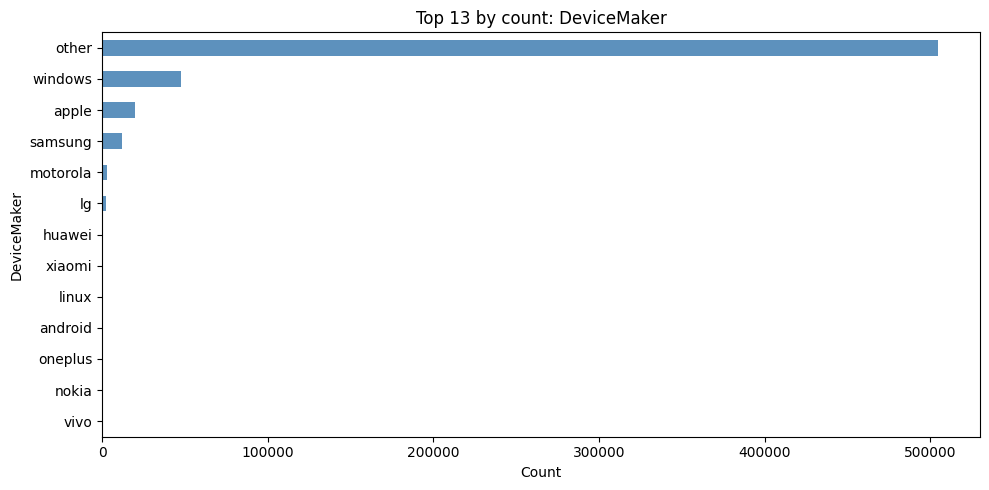


[Method B] pure matplotlib


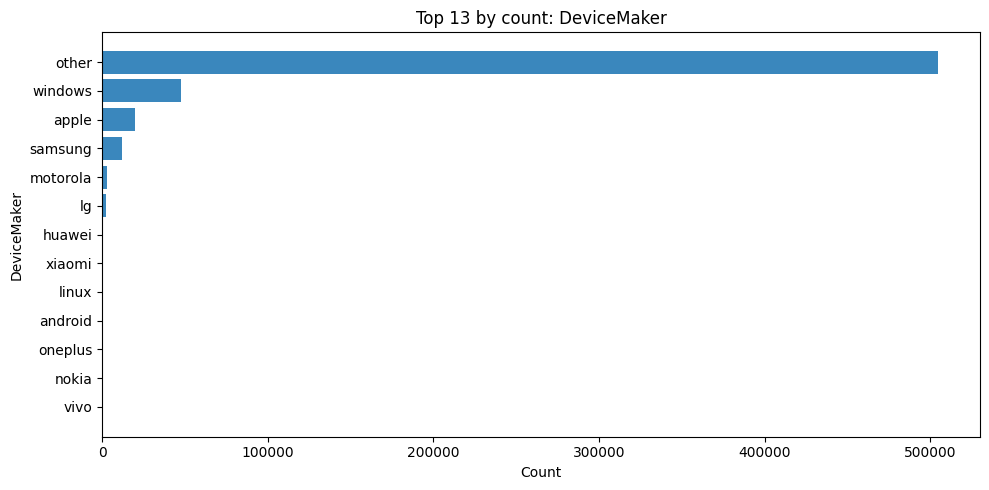


[Method C] display(fig) fallback


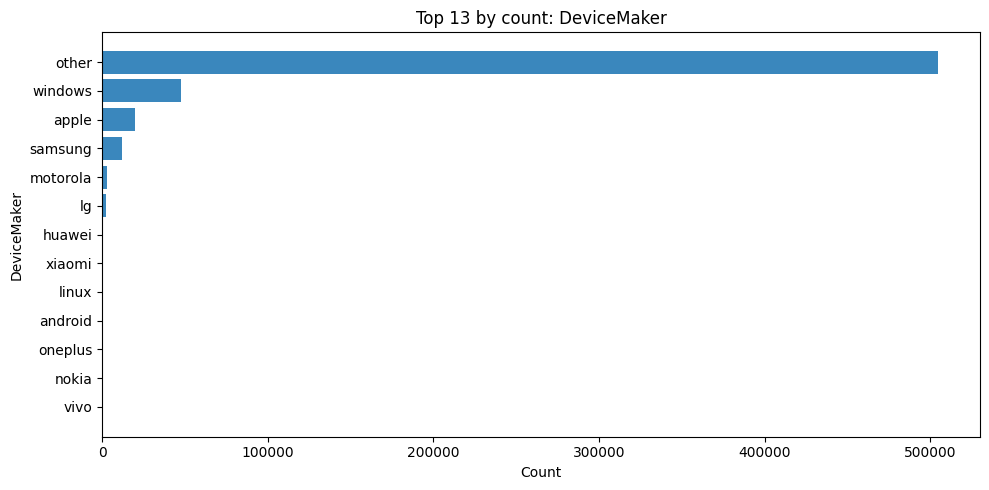

In [29]:
# --- COLAB DIAGNOSTIC PLOTTER (no hidden deps) ---
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from IPython.display import display

# 0) Choose DF
if 'df' in globals() and isinstance(df, pd.DataFrame):
    DF = df
elif 'train_fe' in globals() and isinstance(train_fe, pd.DataFrame):
    DF = train_fe
elif 'merged_df' in globals() and isinstance(merged_df, pd.DataFrame):
    DF = merged_df
else:
    raise RuntimeError("No DataFrame found. Define one of: df, train_fe, merged_df")

CAT_COL = "DeviceMaker"   # <-- change to your categorical column

# 1) Sanity checks
print("DataFrame shape:", DF.shape)
print("First 5 column names:", list(DF.columns[:5]))
if CAT_COL not in DF.columns:
    raise KeyError(f"Column '{CAT_COL}' not found. Available columns: {list(DF.columns)[:30]}")

s = DF[CAT_COL].astype("string").fillna("unknown")
print(f"NA count in '{CAT_COL}':", DF[CAT_COL].isna().sum())
print(f"Unique values in '{CAT_COL}':", s.nunique())

counts = s.value_counts()
print("\nPreview counts (top 10):")
print(counts.head(10))

if counts.empty:
    raise ValueError(f"No values to plot for '{CAT_COL}' (counts is empty).")

top_n = 15
counts_top = counts.head(max(1, int(top_n)))

# 2) Ensure inline backend + interactive on
try:
    # Colab usually sets backend; this is safe
    import matplotlib_inline.backend_inline as _bi
    matplotlib.use("module://matplotlib_inline.backend_inline", force=True)
except Exception as _e:
    print("Backend set attempt skipped:", _e)

plt.ion()  # turn interactive on just in case

# 3a) Plot via pandas .plot (uses matplotlib under the hood)
print("\n[Method A] pandas Series.plot(kind='barh')")
fig_a = plt.figure(figsize=(10,5))
counts_top.sort_values(ascending=True).plot(kind="barh", alpha=0.88, color="steelblue")
plt.title(f"Top {len(counts_top)} by count: {CAT_COL}")
plt.xlabel("Count"); plt.ylabel(CAT_COL)
plt.tight_layout()
plt.show()

# 3b) Plot via pure matplotlib
print("\n[Method B] pure matplotlib")
fig_b, ax_b = plt.subplots(figsize=(10,5))
ct_sorted = counts_top.sort_values(ascending=True)
ax_b.barh(ct_sorted.index.astype(str), ct_sorted.values, alpha=0.88)
ax_b.set_title(f"Top {len(ct_sorted)} by count: {CAT_COL}")
ax_b.set_xlabel("Count"); ax_b.set_ylabel(CAT_COL)
fig_b.tight_layout()
plt.show()

# 3c) Fallback: explicitly display(fig) (helps when show() is ignored)
print("\n[Method C] display(fig) fallback")
fig_c, ax_c = plt.subplots(figsize=(10,5))
ax_c.barh(ct_sorted.index.astype(str), ct_sorted.values, alpha=0.88)
ax_c.set_title(f"Top {len(ct_sorted)} by count: {CAT_COL}")
ax_c.set_xlabel("Count"); ax_c.set_ylabel(CAT_COL)
fig_c.tight_layout()
display(fig_c)
plt.close(fig_c)  # avoid duplicate display in some environments


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from IPython.display import display

def plot_fraud_rate_bar_simple(
    df: pd.DataFrame,
    cat_col: str,
    min_count: int = 500,
    top_n: int = 15,
    title: str | None = None,
    sort_by: str = "rate",   # "rate" or "count"
    descending: bool = True,
    add_labels: bool = True
):
    # --- basic checks
    if not isinstance(df, pd.DataFrame) or df.empty:
        print("❌ df is empty or not a DataFrame"); return
    if "isFraud" not in df.columns:
        print("❌ Column 'isFraud' not found"); return
    if cat_col not in df.columns:
        print(f"❌ Column '{cat_col}' not found"); return

    # --- clean / coerce
    cats = df[cat_col].astype("string").fillna("unknown")
    y = pd.to_numeric(df["isFraud"], errors="coerce").fillna(0).astype(np.int8)

    # --- aggregate
    tmp = (
        pd.DataFrame({"_cat": cats, "isFraud": y})
          .groupby("_cat", observed=True)
          .agg(n=("isFraud", "size"), fr=("isFraud", "mean"))
          .reset_index()
    )
    if tmp.empty:
        print("⚠️ No data to aggregate"); return

    print(f"[Info] unique categories in '{cat_col}': {tmp.shape[0]}")
    print("[Info] top 10 by count before filtering:\n", tmp.sort_values("n", ascending=False).head(10))

    # --- filter by min_count (auto-relax if needed)
    tmp_f = tmp.loc[tmp["n"] >= int(min_count)]
    if tmp_f.empty:
        max_n = int(tmp["n"].max())
        print(f"⚠️ No category meets min_count={min_count}. Relaxing to {max_n}.")
        tmp_f = tmp.loc[tmp["n"] >= max_n]

    # --- sort by chosen metric
    sort_col = "fr" if str(sort_by).lower() == "rate" else "n"
    tmp_f = tmp_f.sort_values(sort_col, ascending=not bool(descending))

    # --- keep top_n
    top_n = max(1, int(top_n))
    tmp_f = tmp_f.head(top_n)

    # --- order for barh (ascending by rate for bottom->top)
    tmp_plot = tmp_f.sort_values("fr", ascending=True)
    print("\n[Info] will plot these categories:\n", tmp_plot[["_cat","n","fr"]])

    # --- plot
    fig, ax = plt.subplots(figsize=(10,5))
    ax.barh(tmp_plot["_cat"].astype(str), tmp_plot["fr"].values, alpha=0.9)
    ax.xaxis.set_major_formatter(PercentFormatter(1.0, decimals=1))
    ax.set_xlabel("Fraud rate (%)")
    ax.set_ylabel(cat_col)
    ax.set_title(title or f"Fraud rate by {cat_col} (min_count ≥ {min_count})")

    if add_labels:
        for yi, (fr_val, n_val) in enumerate(zip(tmp_plot["fr"].values, tmp_plot["n"].values)):
            ax.text(fr_val, yi, f"  {fr_val*100:.2f}% (n={int(n_val)})", va="center", ha="left")

    fig.tight_layout()
    plt.show()         # normal rendering
    display(fig)       # explicit display fallback
    plt.close(fig)     # prevent duplicate in some environments

    return tmp_plot  # table of what got plotted


[Info] unique categories in 'DeviceMaker': 13
[Info] top 10 by count before filtering:
         _cat       n        fr
8      other  504819  0.028069
11   windows   47775  0.065536
1      apple   19783  0.062731
9    samsung   11940  0.115410
5   motorola    2743  0.145461
3         lg    2331  0.104247
2     huawei     719  0.095967
12    xiaomi     193  0.098446
4      linux     121  0.000000
0    android      82  0.036585

[Info] will plot these categories:
         _cat       n        fr
4      linux     121  0.000000
10      vivo      10  0.000000
7    oneplus      14  0.000000
8      other  504819  0.028069
0    android      82  0.036585
1      apple   19783  0.062731
11   windows   47775  0.065536
2     huawei     719  0.095967
12    xiaomi     193  0.098446
3         lg    2331  0.104247
9    samsung   11940  0.115410
5   motorola    2743  0.145461
6      nokia      10  1.000000


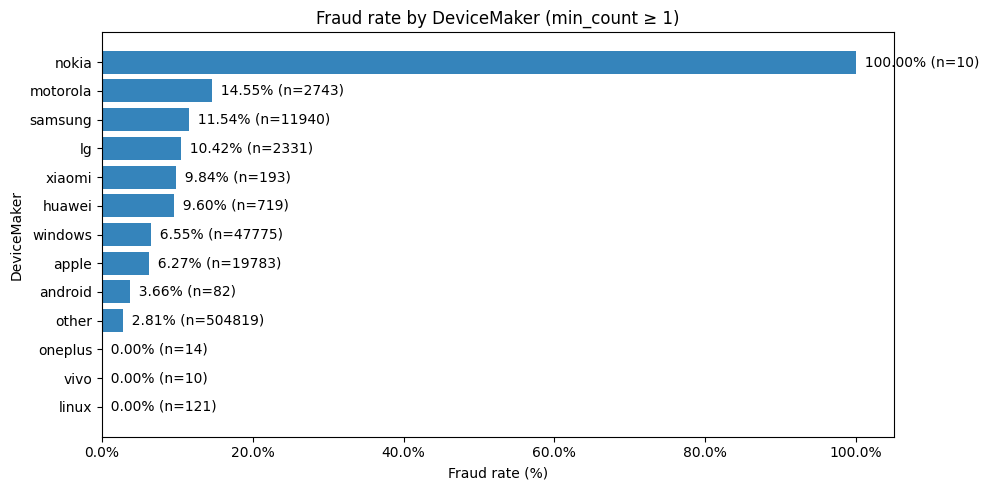

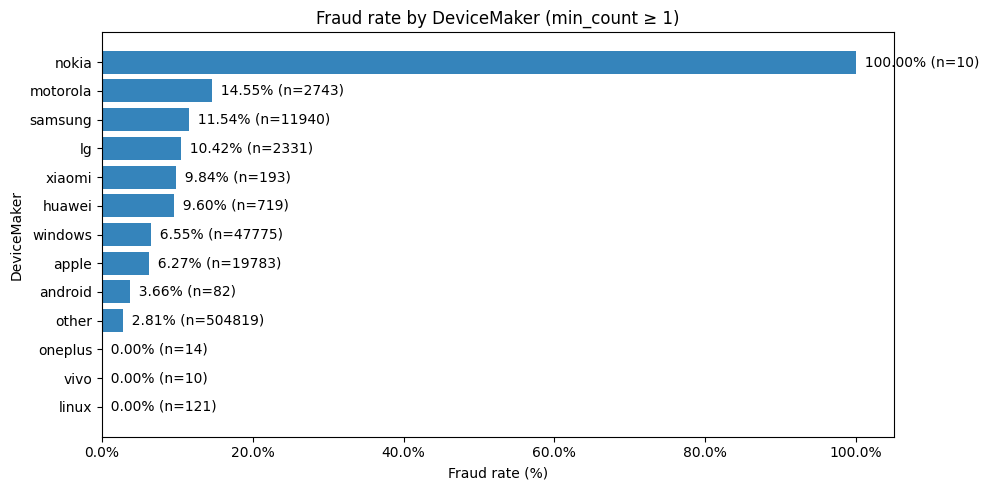

_cat       n        fr
4      linux     121  0.000000
10      vivo      10  0.000000
7    oneplus      14  0.000000
8      other  504819  0.028069
0    android      82  0.036585
1      apple   19783  0.062731
11   windows   47775  0.065536
2     huawei     719  0.095967
12    xiaomi     193  0.098446
3         lg    2331  0.104247
9    samsung   11940  0.115410
5   motorola    2743  0.145461
6      nokia      10  1.000000

In [31]:
# Pick your DataFrame
df = train_fe if 'train_fe' in globals() else merged_df if 'merged_df' in globals() else df

# Try a column you know exists (adjust as needed)
plot_fraud_rate_bar_simple(df, "DeviceMaker", min_count=1, top_n=15, sort_by="rate")
# Another example:
# plot_fraud_rate_bar_simple(df, "P_emaildomain_provider", min_count=1, top_n=20, sort_by="count")


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

def plot_hist(
    df: pd.DataFrame,
    num_col: str,
    bins: int = 50,
    title: str | None = None,
    logx: bool = False,
    density: bool = False,
    color: str = "steelblue",
    alpha: float = 0.85
):
    """Plot histogram for a numeric column with optional log1p transform."""

    # --- checks
    if num_col not in df.columns:
        print(f"❌ Column '{num_col}' not found. Available columns: {list(df.columns)[:20]}...")
        return

    # --- clean to numeric
    x = pd.to_numeric(df[num_col], errors="coerce").dropna().values
    if x.size == 0:
        print(f"⚠️ Skipping {num_col} – no numeric values.")
        return

    # --- optional log transform
    if logx:
        x = x[x > 0]        # only keep positive values
        x = np.log1p(x)     # log(1+x)
        if x.size == 0:
            print(f"⚠️ Skipping {num_col} – no positive values for log1p transform.")
            return

    # --- histogram
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.hist(x, bins=bins, density=density, color=color, alpha=alpha, edgecolor="black")

    # labels & title
    ttl = title or f"Distribution: {num_col}" + (" (log1p)" if logx else "")
    ax.set_title(ttl)
    ax.set_xlabel(num_col + (" (log1p)" if logx else ""))
    ax.set_ylabel("Density" if density else "Frequency")

    fig.tight_layout()
    plt.show()
    display(fig)   # explicit fallback for Colab
    plt.close(fig)

    print(f"[Info] {num_col}: n={len(x)}, min={x.min():.4f}, max={x.max():.4f}, mean={x.mean():.4f}")


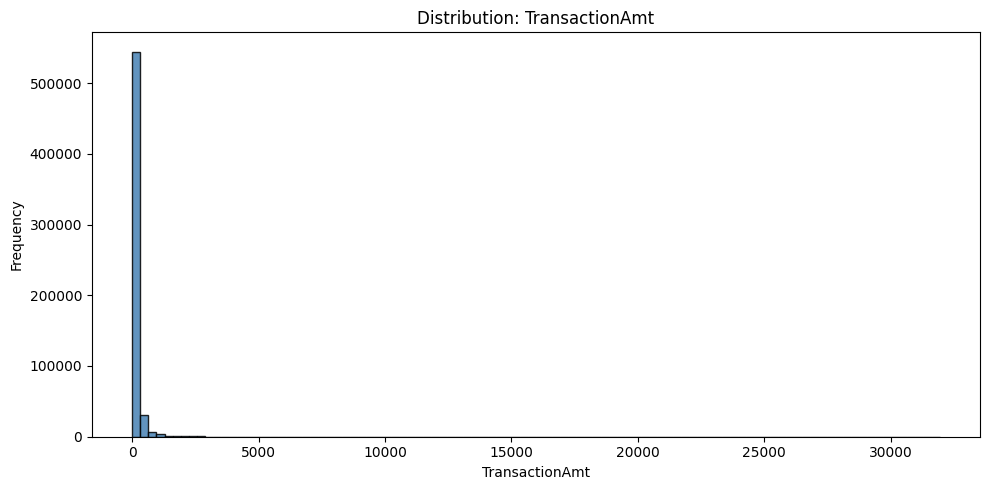

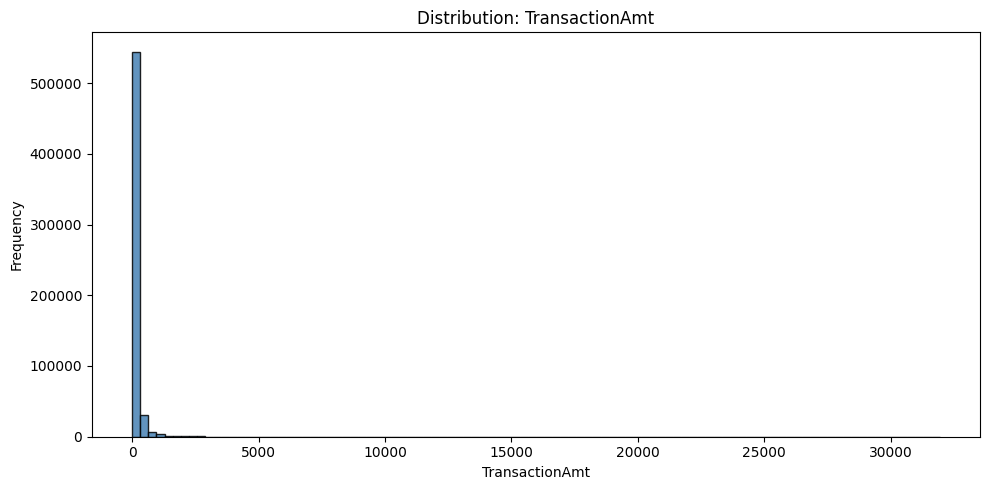

[Info] TransactionAmt: n=590540, min=0.2510, max=31937.3910, mean=135.0272


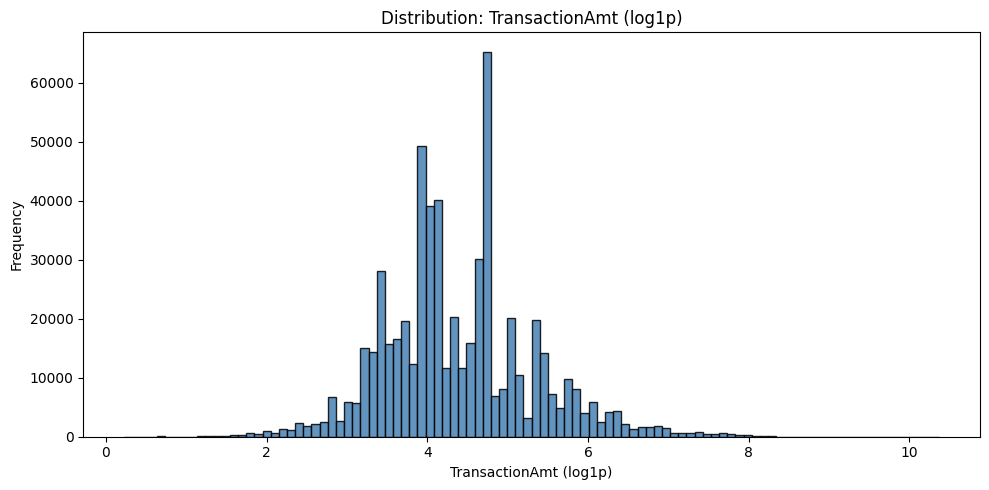

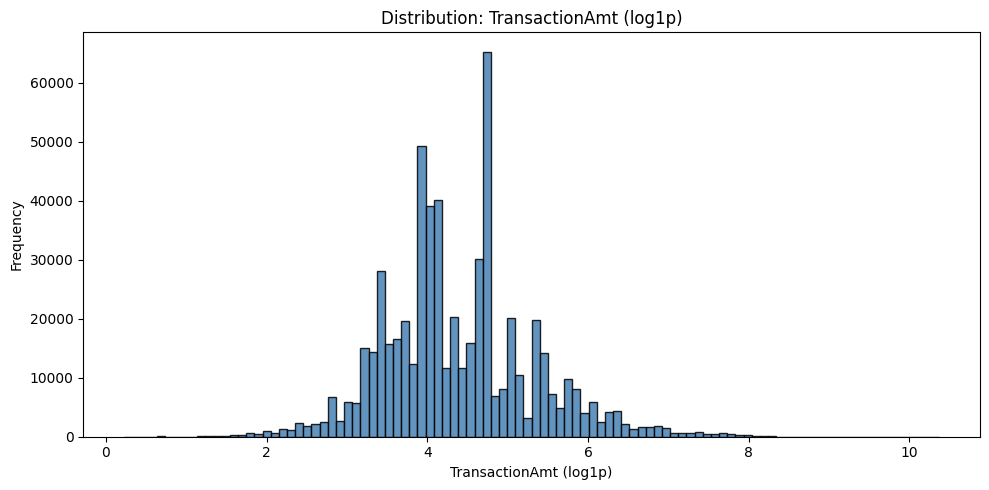

[Info] TransactionAmt: n=590540, min=0.2239, max=10.3716, mean=4.3830


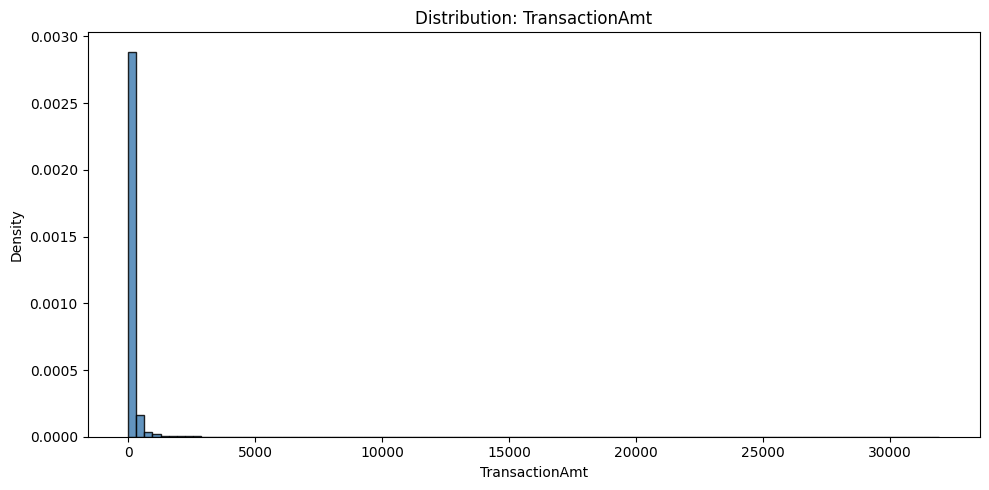

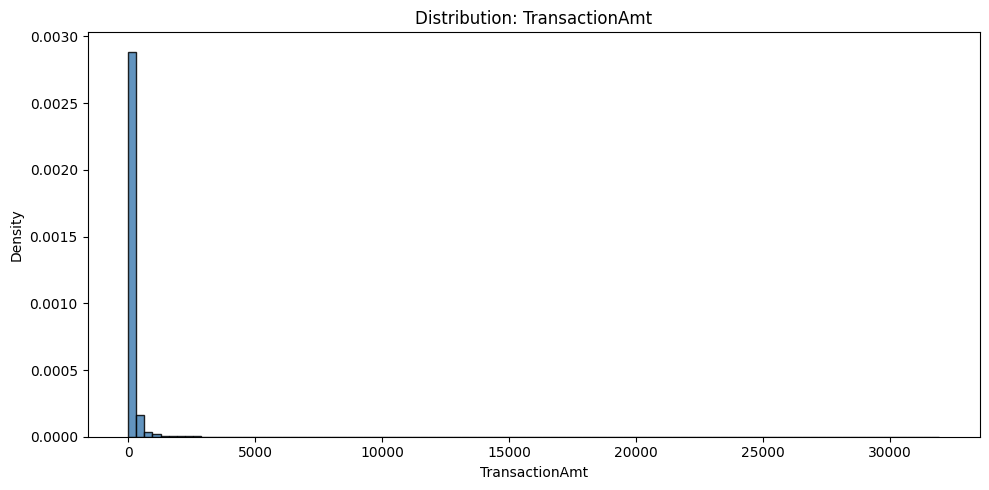

[Info] TransactionAmt: n=590540, min=0.2510, max=31937.3910, mean=135.0272


In [33]:
# Raw histogram of TransactionAmt
plot_hist(df, "TransactionAmt", bins=100)

# Histogram with log1p transform
plot_hist(df, "TransactionAmt", bins=100, logx=True)

# Density (normalized to probability instead of counts)
plot_hist(df, "TransactionAmt", bins=100, density=True)


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from IPython.display import display

def bin_and_plot_fraud_rate(
    df: pd.DataFrame,
    num_col: str,
    bins: int = 10,
    title: str | None = None,
    quantile: bool = False,
    drop_empty_bins: bool = True,
    add_labels: bool = True
):
    """Bin a numeric column and plot fraud rate (%) per bin."""
    # --- basic checks
    if not isinstance(df, pd.DataFrame) or df.empty:
        print("❌ df is empty or not a DataFrame"); return
    if "isFraud" not in df.columns:
        print("❌ Column 'isFraud' not found"); return
    if num_col not in df.columns:
        print(f"❌ Column '{num_col}' not found"); return

    # --- numeric clean
    s = pd.to_numeric(df[num_col], errors="coerce")
    y = pd.to_numeric(df["isFraud"], errors="coerce").fillna(0).astype(np.int8)
    mask = s.notna()
    if mask.sum() == 0:
        print(f"⚠️ Skipping {num_col} – no numeric values."); return

    s = s[mask]; y = y[mask]

    # --- build bins
    if quantile:
        # quantile edges; ensure uniqueness
        q = np.linspace(0, 1, bins + 1)
        edges = np.unique(np.quantile(s.values, q))
        if edges.size < 2:
            print(f"⚠️ Skipping {num_col} – not enough unique quantile edges."); return
        # Guard against identical edges causing empty intervals
        binned = pd.cut(s, bins=edges, include_lowest=True, duplicates="drop")
        # If still too few bins, fallback to qcut with duplicates drop
        if binned.nunique(dropna=True) < 2:
            try:
                binned = pd.qcut(s, q=bins, duplicates="drop")
            except Exception as e:
                print(f"⚠️ qcut failed: {e}"); return
    else:
        # equal-width bins between min & max
        try:
            binned = pd.cut(s, bins=bins, include_lowest=True)
        except Exception as e:
            print(f"⚠️ cut failed: {e}"); return

    # --- aggregate fraud rate & counts
    tmp = (
        pd.DataFrame({"_bin": binned, "isFraud": y})
        .groupby("_bin", observed=True)
        .agg(n=("isFraud", "size"), fr=("isFraud", "mean"))
        .reset_index()
    )

    if drop_empty_bins:
        tmp = tmp[tmp["n"] > 0]

    if tmp.empty:
        print(f"⚠️ All bins are empty for {num_col}."); return

    # --- prepare labels/values
    tmp = tmp.sort_values("_bin")  # left->right by bin
    labels = tmp["_bin"].astype(str).values
    vals = (tmp["fr"] * 100.0).values

    # --- plot
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.bar(range(len(vals)), vals, alpha=0.9, color="steelblue", edgecolor="black")
    ax.set_xticks(range(len(vals)))
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.set_ylabel("Fraud rate (%)")
    ax.set_xlabel(f"{num_col} bins")
    ax.set_title(title or f"Fraud rate (%) vs {num_col} bins" + (" (quantile bins)" if quantile else ""))

    # Add labels on bars
    if add_labels:
        for i, (v, n) in enumerate(zip(vals, tmp["n"].values)):
            ax.text(i, v, f"{v:.2f}%\n(n={int(n)})", ha="center", va="bottom", fontsize=9)

    fig.tight_layout()
    plt.show()
    display(fig)
    plt.close(fig)

    # Console preview to help debug when "nothing shows"
    print(f"[Info] Plotted {len(vals)} bins for '{num_col}'.")
    print(tmp[["_bin", "n", "fr"]])

    return tmp


def plot_twoaxis_daily_counts_and_fraud(
    df: pd.DataFrame,
    dt_col: str = "DT",
    title: str | None = None,
    line_alpha: float = 0.9
):
    """Two-axis plot: daily transaction count (left) and fraud rate % (right)."""
    # --- checks
    if not isinstance(df, pd.DataFrame) or df.empty:
        print("❌ df is empty or not a DataFrame"); return
    if "isFraud" not in df.columns:
        print("❌ Column 'isFraud' not found"); return
    if dt_col not in df.columns:
        print(f"❌ Column '{dt_col}' not found"); return

    # --- ensure datetime
    dt = pd.to_datetime(df[dt_col], errors="coerce")
    m = dt.notna() & df["isFraud"].notna()
    if m.sum() == 0:
        print("⚠️ Skipping daily plot – DT/isFraud empty after coercion."); return

    # --- daily aggregate
    d = pd.DataFrame({"DT": dt[m].dt.floor("D"), "isFraud": df.loc[m, "isFraud"].astype(int)})
    daily = d.groupby("DT", observed=True).agg(cnt=("isFraud", "size"), fr=("isFraud", "mean")).reset_index()

    if daily.empty:
        print("⚠️ No daily data to plot."); return

    x = daily["DT"].values
    y_cnt = daily["cnt"].values
    y_fr = daily["fr"].values * 100.0

    # --- plot
    fig, ax1 = plt.subplots(figsize=(12, 5))
    l1, = ax1.plot(x, y_cnt, marker="o", linewidth=1.5, alpha=line_alpha, label="Transactions (count)")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Transactions (count)")
    ax1.tick_params(axis="x", rotation=45)

    ax2 = ax1.twinx()
    l2, = ax2.plot(x, y_fr, marker="s", linewidth=1.5, alpha=line_alpha, color="tab:red", label="Fraud rate (%)")
    ax2.set_ylabel("Fraud rate (%)")

    # Build a shared legend
    lines = [l1, l2]
    labels = [ln.get_label() for ln in lines]
    ax1.legend(lines, labels, loc="upper left")

    plt.title(title or "Daily volume & fraud rate")
    fig.tight_layout()
    plt.show()
    display(fig)
    plt.close(fig)

    # Console preview
    print("[Info] Daily head:")
    print(daily.head())

    return daily


In [35]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# -------- Pick a dataframe to work with (no copy to save RAM)
if "train_fe" in globals() and isinstance(train_fe, pd.DataFrame):
    df = train_fe
elif "merged_df" in globals() and isinstance(merged_df, pd.DataFrame):
    df = merged_df
else:
    raise RuntimeError("Define `train_fe` or `merged_df` first.")

# -------- Basic checks (coerce if needed)
required = ["isFraud", "TransactionDT", "TransactionAmt"]
missing = [c for c in required if c not in df.columns]
if missing:
    raise RuntimeError(f"Missing required column(s): {missing}")

# Coerce types safely
df["isFraud"] = pd.to_numeric(df["isFraud"], errors="coerce").fillna(0).astype(np.int8)
txn_dt = pd.to_numeric(df["TransactionDT"], errors="coerce")

# Drop rows with invalid TransactionDT for time-based features (keeps full df for other use)
valid_mask = txn_dt.notna()
if not valid_mask.any():
    raise RuntimeError("All TransactionDT values are non-numeric/NaN after coercion.")

SECONDS_IN_DAY = 86_400

# -------- Optional: create calendar timestamp 'DT' if missing
if "DT" not in df.columns:
    origin = pd.Timestamp("2017-12-01")
    df.loc[valid_mask, "DT"] = origin + pd.to_timedelta(txn_dt[valid_mask], unit="s")

# -------- Day index (0-based) and day-of-week (Mon=0, Sun=6)
day_index = (np.floor_divide(txn_dt[valid_mask].values.astype(np.int64), SECONDS_IN_DAY)).astype(np.int32)
day_of_week = (day_index % 7).astype(np.int8)

df.loc[valid_mask, "DayIndex"] = day_index
df.loc[valid_mask, "DayOfWeek"] = day_of_week

# -------- Ordered day-name labels (handy for plots)
dow_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
df.loc[valid_mask, "DOW_Name"] = pd.Categorical(
    pd.Series(day_of_week, index=txn_dt[valid_mask].index).map(dict(enumerate(dow_order))),
    categories=dow_order,
    ordered=True
)

# -------- Hour of day (0–23)
hour = (np.mod(txn_dt[valid_mask].values, SECONDS_IN_DAY) // 3600).astype(np.int8)
df.loc[valid_mask, "Hour"] = hour

# -------- Optional: sanity print
print("Derived columns added:", [c for c in ["DT","DayIndex","DayOfWeek","DOW_Name","Hour"] if c in df.columns])
print("Sample:")
print(df.loc[valid_mask, ["TransactionDT","DT","DayIndex","DayOfWeek","DOW_Name","Hour"]].head())


Derived columns added: ['DT', 'DayIndex', 'DayOfWeek', 'DOW_Name', 'Hour']
Sample:
   TransactionDT                  DT  DayIndex  DayOfWeek DOW_Name  Hour
0          86400 2017-12-02 00:00:00       1.0        1.0      Tue   0.0
1          86401 2017-12-02 00:00:01       1.0        1.0      Tue   0.0
2          86469 2017-12-02 00:01:09       1.0        1.0      Tue   0.0
3          86499 2017-12-02 00:01:39       1.0        1.0      Tue   0.0
4          86506 2017-12-02 00:01:46       1.0        1.0      Tue   0.0


In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# 1) Distribution of Fraudulent vs Non-Fraudulent Transactions
def plot_fraud_distribution(df, col="isFraud", normalize=False, add_labels=True):
    if col not in df.columns:
        print(f"❌ Column '{col}' not found in DataFrame.")
        return

    # Ensure numeric/binary
    s = pd.to_numeric(df[col], errors="coerce").fillna(0).astype(int)
    counts = s.value_counts(normalize=normalize).reindex([0, 1]).fillna(0)

    # Labels & values
    labels = ["Non-Fraud (0)", "Fraud (1)"]
    values = counts.values

    # Plot
    fig, ax = plt.subplots(figsize=(6, 4))
    bars = ax.bar(labels, values, color=["steelblue", "crimson"], alpha=0.9, edgecolor="black")

    if normalize:
        ax.set_ylabel("Proportion")
        ax.set_ylim(0, 1)
    else:
        ax.set_ylabel("Count")

    ax.set_title("Distribution: Fraudulent vs Non-Fraudulent")

    # Optional value labels
    if add_labels:
        for bar, v in zip(bars, values):
            if normalize:
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                        f"{v:.2%}", ha="center", va="bottom")
            else:
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                        f"{int(v)}", ha="center", va="bottom")

    fig.tight_layout()
    plt.show()
    return counts


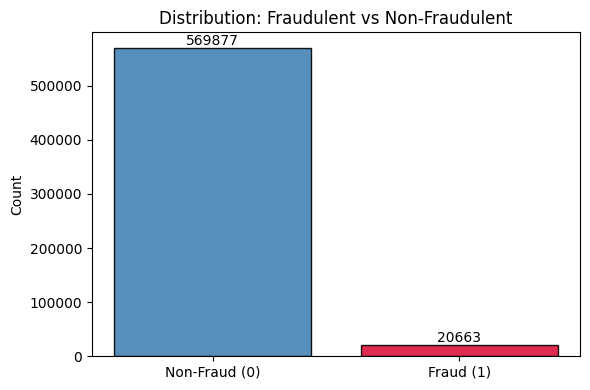

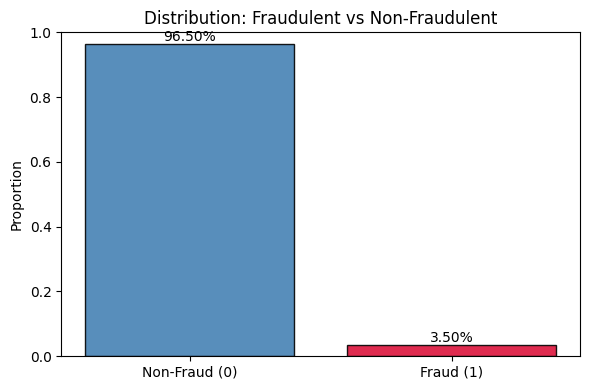

isFraud
0    0.96501
1    0.03499
Name: proportion, dtype: float64

In [37]:
# Raw counts
plot_fraud_distribution(df)

# Normalized (percentages)
plot_fraud_distribution(df, normalize=True)


In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_transaction_amount_logscale(
    df, col="TransactionAmt", bins=100, density=False, add_stats=True
):
    if col not in df.columns:
        print(f"❌ Column '{col}' not found in DataFrame.")
        return

    # Clean numeric values and filter positives
    amt = pd.to_numeric(df[col], errors="coerce")
    amt = amt[amt > 0]
    if amt.empty:
        print(f"⚠️ No positive values in '{col}' to plot.")
        return

    # Plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.hist(amt, bins=bins, density=density, color="steelblue", alpha=0.85, edgecolor="black")
    ax.set_xscale("log")

    ax.set_title("Distribution of Transaction Amounts (Log Scale)")
    ax.set_xlabel(f"{col} (log scale)")
    ax.set_ylabel("Density" if density else "Frequency")

    fig.tight_layout()
    plt.show()

    # Optional stats print
    if add_stats:
        print(f"[Info] {col}: n={len(amt)}, min={amt.min():.2f}, max={amt.max():.2f}, mean={amt.mean():.2f}, median={amt.median():.2f}")

    return amt


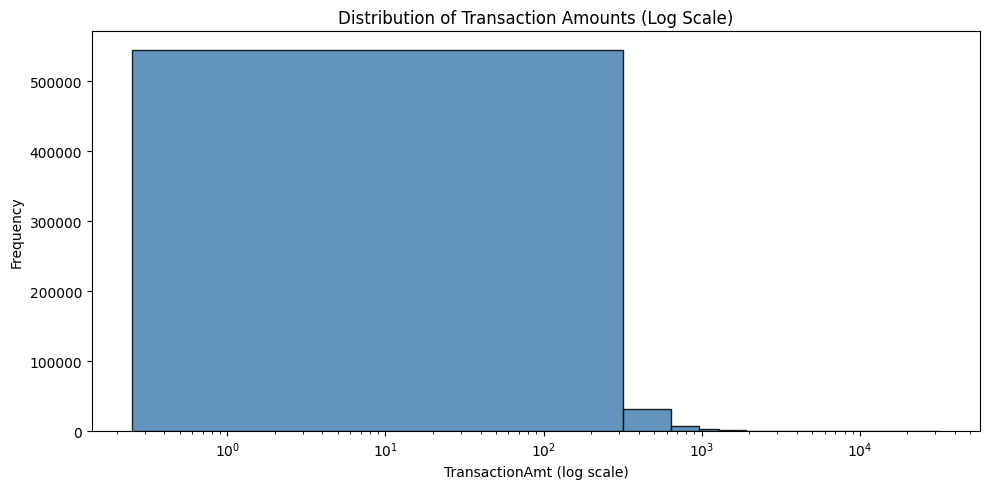

[Info] TransactionAmt: n=590540, min=0.25, max=31937.39, mean=135.03, median=68.77


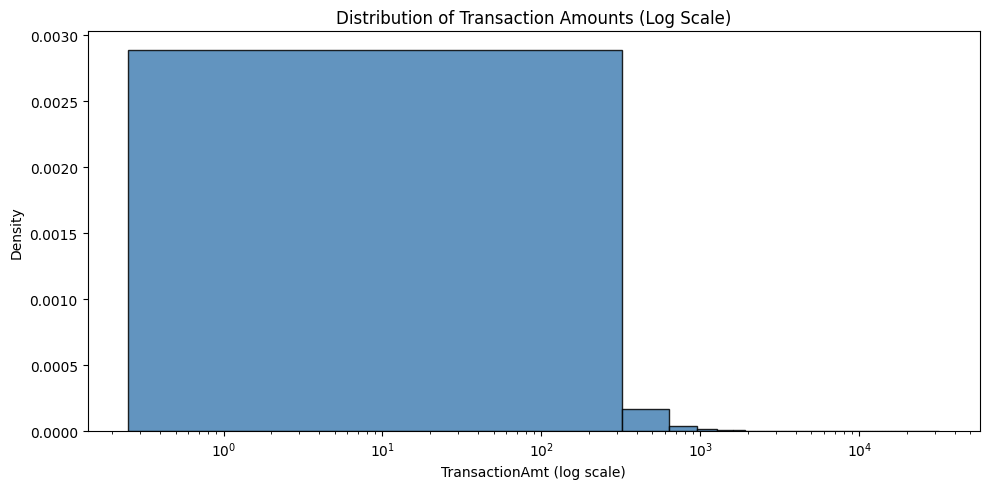

[Info] TransactionAmt: n=590540, min=0.25, max=31937.39, mean=135.03, median=68.77


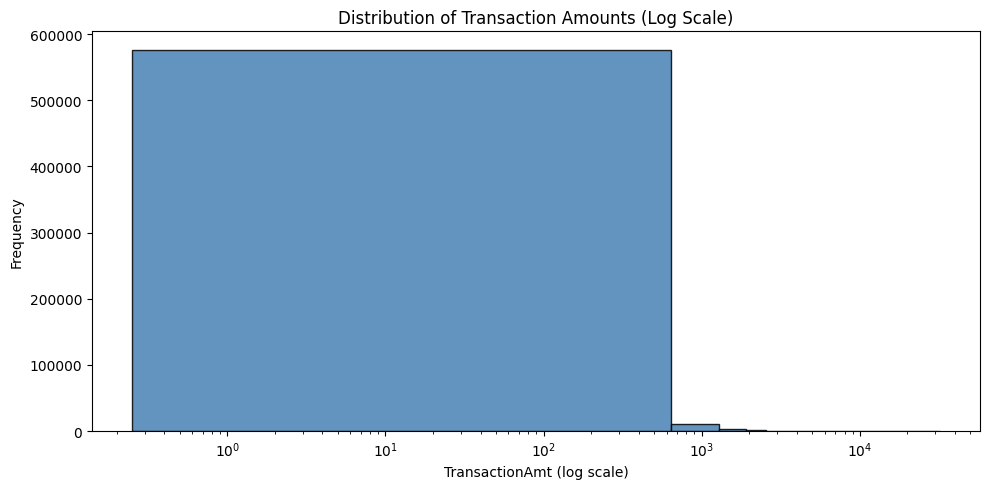

[Info] TransactionAmt: n=590540, min=0.25, max=31937.39, mean=135.03, median=68.77


0          68.50
1          29.00
2          59.00
3          50.00
4          50.00
           ...  
590535     49.00
590536     39.50
590537     30.95
590538    117.00
590539    279.95
Name: TransactionAmt, Length: 590540, dtype: float64

In [39]:
# Default: frequency histogram
plot_transaction_amount_logscale(df)

# Normalized density view
plot_transaction_amount_logscale(df, density=True)

# Fewer bins for smoother view
plot_transaction_amount_logscale(df, bins=50)


In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_fraud_count_by_hour(df, fraud_col="isFraud", hour_col="Hour",
                             normalize=False, add_labels=True):
    # --- checks
    for col in [fraud_col, hour_col]:
        if col not in df.columns:
            print(f"❌ Column '{col}' not found in DataFrame.")
            return

    # Clean
    fraud = pd.to_numeric(df[fraud_col], errors="coerce").fillna(0).astype(int)
    hour = pd.to_numeric(df[hour_col], errors="coerce").fillna(-1).astype(int)
    mask = (fraud == 1) & (hour.between(0, 23))

    fraud_by_hour = (fraud[mask]
                     .groupby(hour[mask])
                     .size()
                     .reindex(range(24), fill_value=0))

    # Normalize to percentages if requested
    if normalize and fraud_by_hour.sum() > 0:
        values = fraud_by_hour.values / fraud_by_hour.sum() * 100
        ylabel = "Fraud % by Hour"
    else:
        values = fraud_by_hour.values
        ylabel = "Fraud Count"

    # --- plot
    fig, ax = plt.subplots(figsize=(10, 5))
    bars = ax.bar(range(24), values, color="crimson", alpha=0.85, edgecolor="black")
    ax.set_xticks(range(24))
    ax.set_xlabel("Hour of Day (0–23)")
    ax.set_ylabel(ylabel)
    ax.set_title("Fraud Distribution by Hour of the Day")

    if add_labels:
        for bar, v in zip(bars, values):
            if v > 0:
                label = f"{v:.1f}%" if normalize else str(int(v))
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                        label, ha="center", va="bottom", fontsize=8)

    fig.tight_layout()
    plt.show()

    return fraud_by_hour


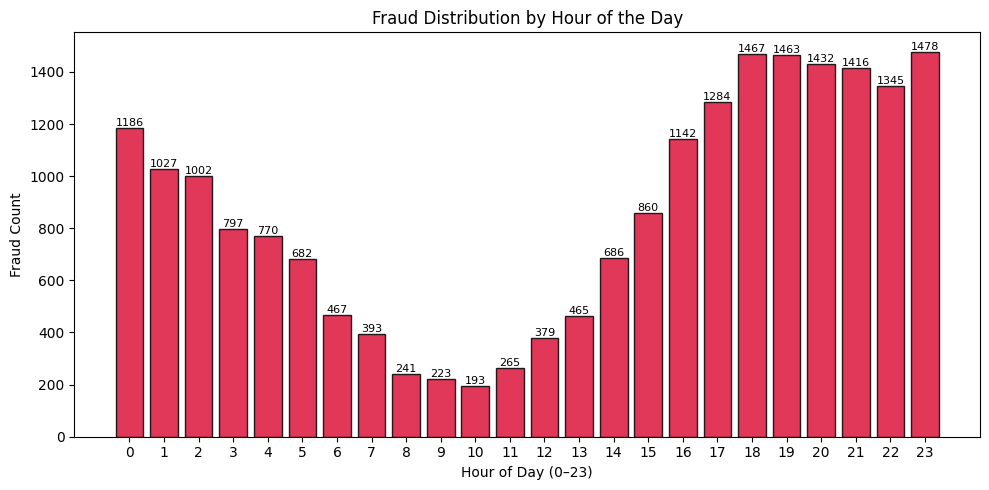

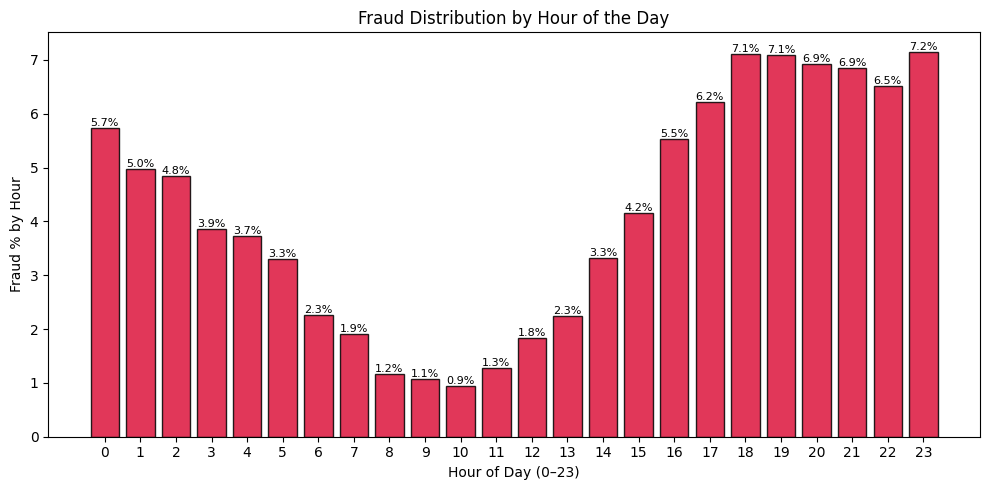

Hour
0     1186
1     1027
2     1002
3      797
4      770
5      682
6      467
7      393
8      241
9      223
10     193
11     265
12     379
13     465
14     686
15     860
16    1142
17    1284
18    1467
19    1463
20    1432
21    1416
22    1345
23    1478
Name: isFraud, dtype: int64

In [41]:
# Absolute fraud counts per hour
plot_fraud_count_by_hour(df)

# Percentage distribution of fraud by hour
plot_fraud_count_by_hour(df, normalize=True)


In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_fraud_count_by_dow(
    df,
    fraud_col="isFraud",
    dow_col="DOW_Name",
    dow_order=None,
    base_y=500,
    threshold=600,
    add_labels=True
):
    # --- checks
    for col in [fraud_col, dow_col]:
        if col not in df.columns:
            print(f"❌ Column '{col}' not found in DataFrame.")
            return

    # Ensure fraud column is numeric/binary
    fraud = pd.to_numeric(df[fraud_col], errors="coerce").fillna(0).astype(int)
    dow = df[dow_col].astype(str)

    # Order days if given
    if dow_order is None:
        dow_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

    fraud_by_dow = (
        fraud[dow == dow].groupby(dow).sum()
        .reindex(dow_order, fill_value=0)
    )

    # --- plot
    fig, ax = plt.subplots(figsize=(8,5))
    bars = ax.bar(fraud_by_dow.index, fraud_by_dow.values,
                  color="steelblue", alpha=0.8, edgecolor="black")

    # Threshold line
    ax.axhline(threshold, color="red", linestyle="--", label=f"Threshold = {threshold}")

    # Axis labels & title
    ax.set_title(f"Fraud Count by Day of Week (Y-axis starts at {base_y})")
    ax.set_xlabel("Day of Week")
    ax.set_ylabel("Fraud Count")

    # Y-axis starting base
    ymax = max(fraud_by_dow.max() + 50, threshold + 50)
    ax.set_ylim(base_y, ymax)

    # Value labels
    if add_labels:
        for bar, v in zip(bars, fraud_by_dow.values):
            if v >= base_y:
                ax.text(bar.get_x() + bar.get_width()/2, v + 5,
                        str(int(v)), ha="center", va="bottom", fontsize=9)

    ax.legend()
    fig.tight_layout()
    plt.show()

    # --- diagnostics
    print(f"[Info] Days with fraud count > {threshold}:")
    print(fraud_by_dow[fraud_by_dow > threshold])

    return fraud_by_dow


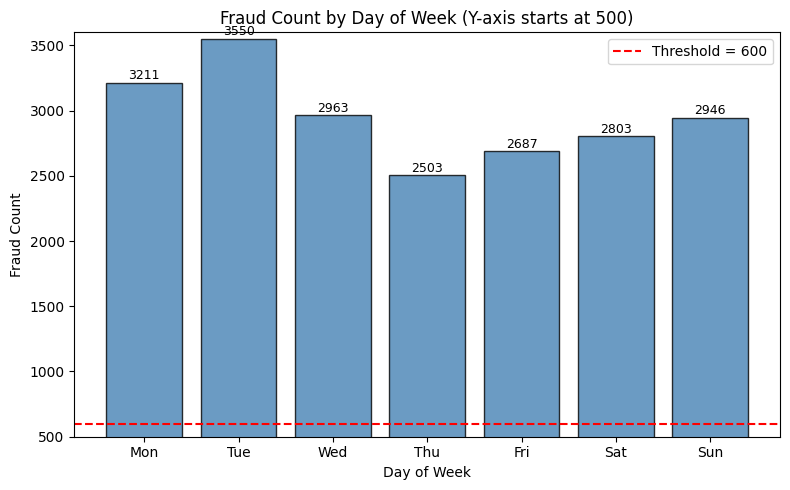

[Info] Days with fraud count > 600:
DOW_Name
Mon    3211
Tue    3550
Wed    2963
Thu    2503
Fri    2687
Sat    2803
Sun    2946
Name: isFraud, dtype: int64


DOW_Name
Mon    3211
Tue    3550
Wed    2963
Thu    2503
Fri    2687
Sat    2803
Sun    2946
Name: isFraud, dtype: int64

In [43]:
plot_fraud_count_by_dow(df, dow_order=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"], base_y=500, threshold=600)


In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import PercentFormatter

def plot_fraud_rate_by_hour(
    df,
    fraud_col="isFraud",
    hour_col="Hour",
    add_labels=True,
    show_overall_line=True
):
    # --- checks
    for col in [fraud_col, hour_col]:
        if col not in df.columns:
            print(f"❌ Column '{col}' not in DataFrame.")
            return

    # Clean inputs
    fraud = pd.to_numeric(df[fraud_col], errors="coerce").fillna(0).astype(int)
    hour = pd.to_numeric(df[hour_col], errors="coerce").fillna(-1).astype(int)
    mask = hour.between(0, 23)

    # Fraud rate per hour (%)
    rate_by_hour = (
        pd.DataFrame({"hour": hour[mask], "isFraud": fraud[mask]})
        .groupby("hour")["isFraud"].mean()
        .mul(100)
        .reindex(range(24), fill_value=0)
    )

    # --- plot
    fig, ax = plt.subplots(figsize=(10,5))
    bars = ax.bar(rate_by_hour.index, rate_by_hour.values,
                  color="darkorange", alpha=0.85, edgecolor="black")

    # Format axis
    ax.set_xticks(range(24))
    ax.set_xlabel("Hour of Day (0–23)")
    ax.set_ylabel("Fraud Rate (%)")
    ax.set_title("Fraud Rate by Hour of the Day")
    ax.yaxis.set_major_formatter(PercentFormatter(decimals=1))

    # Add overall fraud rate line
    if show_overall_line:
        overall_rate = fraud.mean() * 100
        ax.axhline(overall_rate, color="red", linestyle="--",
                   label=f"Overall avg = {overall_rate:.2f}%")
        ax.legend()

    # Add labels on bars
    if add_labels:
        for bar, v in zip(bars, rate_by_hour.values):
            if v > 0:
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                        f"{v:.2f}%", ha="center", va="bottom", fontsize=8)

    fig.tight_layout()
    plt.show()

    return rate_by_hour


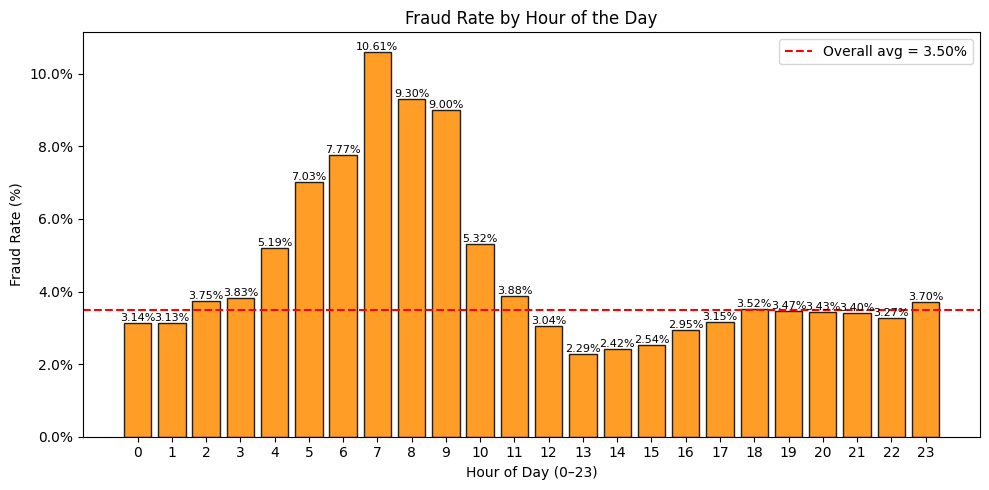

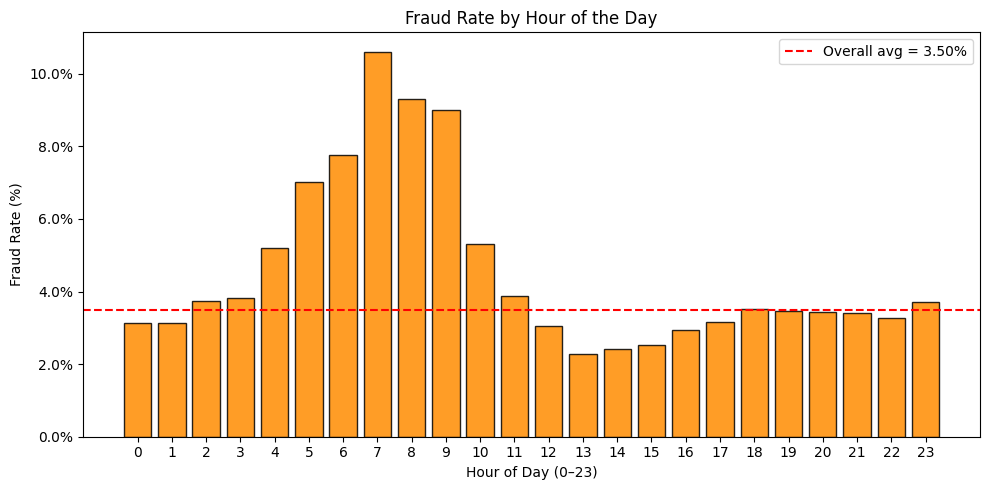

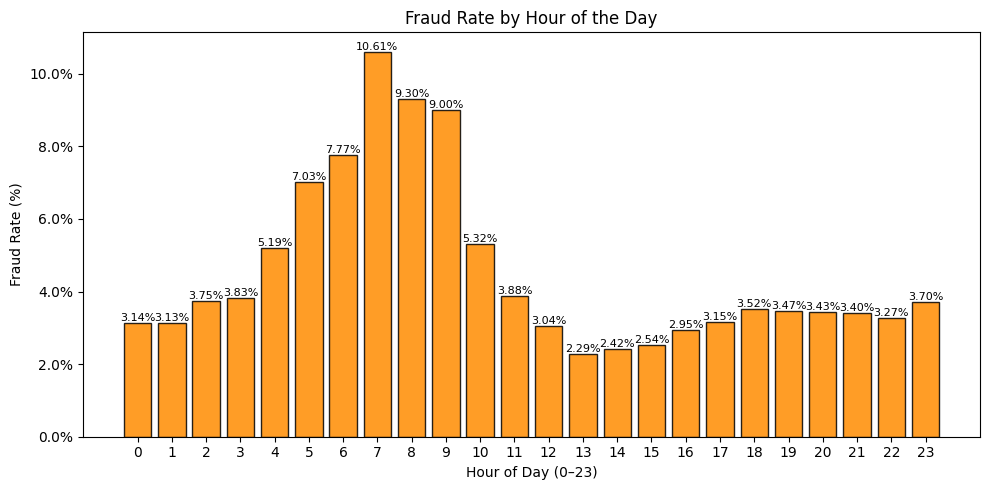

hour
0      3.137981
1      3.131384
2      3.748317
3      3.831362
4      5.189029
5      7.030203
6      7.774263
7     10.610151
8      9.301428
9      8.995563
10     5.321202
11     3.881646
12     3.043932
13     2.288949
14     2.421632
15     2.539945
16     2.951057
17     3.153009
18     3.523139
19     3.473822
20     3.427313
21     3.400495
22     3.269404
23     3.699717
Name: isFraud, dtype: float64

In [45]:
# Plot fraud rate by hour
plot_fraud_rate_by_hour(df)

# Without labels, only bars + overall line
plot_fraud_rate_by_hour(df, add_labels=False)

# Just bars (no overall line)
plot_fraud_rate_by_hour(df, show_overall_line=False)


/tmp/ipython-input-3112959014.py:91: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(dow[mask])
/tmp/ipython-input-3112959014.py:97: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(dow[mask])



[Diagnostics] Metrics used for plotting:
          Total_Transactions  Fraud_Count  Fraud_Rate(%)
DOW_Name                                                
Mon                    86377         3211          3.717
Tue                    98502         3550          3.604
Wed                    79834         2963          3.711
Thu                    70223         2503          3.564
Fri                    85433         2687          3.145
Sat                    84815         2803          3.305
Sun                    85356         2946          3.451


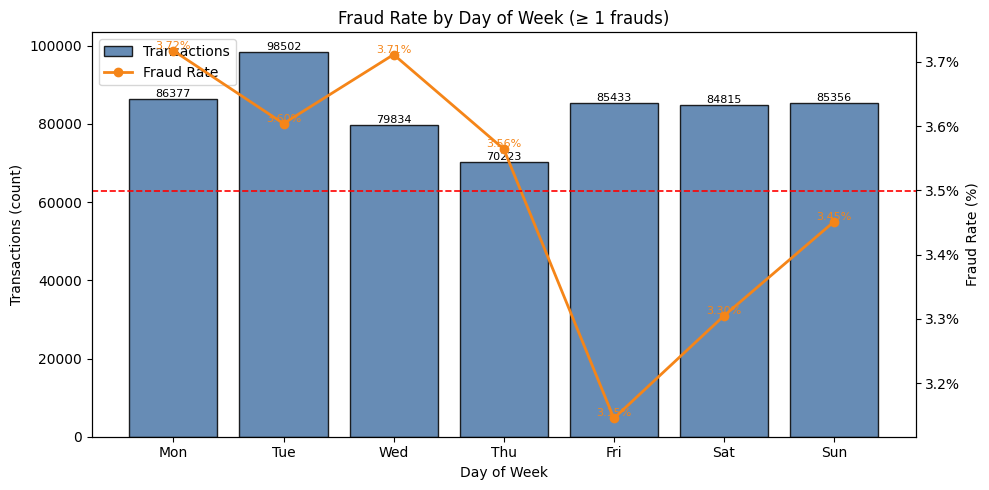

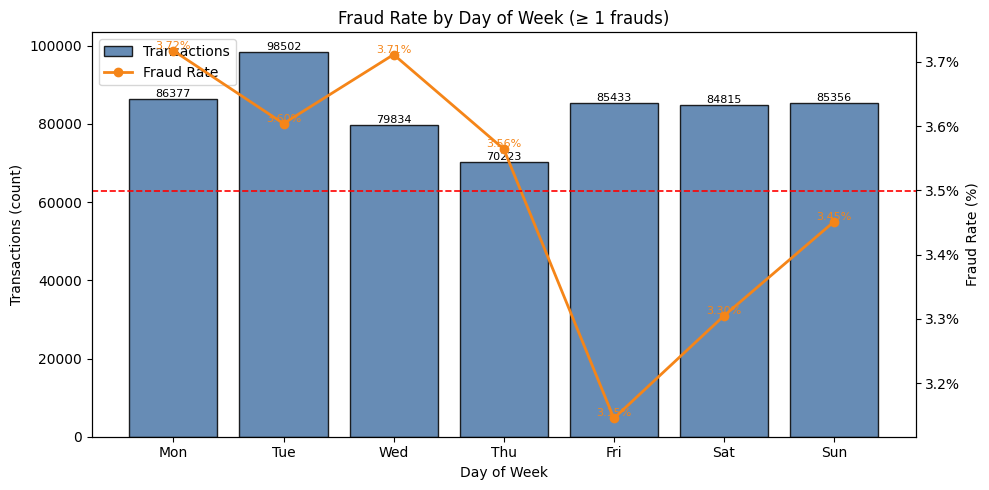

In [46]:
# --- FORCE INLINE BACKEND (Colab) ---
import matplotlib_inline.backend_inline as _bi
import matplotlib
matplotlib.use("module://matplotlib_inline.backend_inline", force=True)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from IPython.display import display

DOW_ORDER = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]

# ---------------- Helpers ----------------
def _ensure_dow_name(df, dow_col="DOW_Name", dt_col="DT", tx_col="TransactionDT"):
    """
    Ensure a correct DOW_Name (Mon..Sun) column exists.
    Priority:
      1) Use DT if present (coerced to datetime, then dt.dayofweek)
      2) Else derive from TransactionDT seconds since 2017-12-01
    """
    if dow_col in df.columns:
        # Coerce to ordered Mon..Sun just to be safe
        s = df[dow_col].astype("string")
        df[dow_col] = pd.Categorical(s, categories=DOW_ORDER, ordered=True)
        return df

    dt = None
    if dt_col in df.columns:
        dt = pd.to_datetime(df[dt_col], errors="coerce")
    elif tx_col in df.columns:
        origin = pd.Timestamp("2017-12-01")
        txn = pd.to_numeric(df[tx_col], errors="coerce")
        good = txn.notna()
        dt = pd.Series(pd.NaT, index=df.index)
        if good.any():
            dt.loc[good] = origin + pd.to_timedelta(txn.loc[good], unit="s")
    else:
        print("❌ No DT or TransactionDT available to derive DOW.")
        return df

    if dt is None or dt.isna().all():
        print("⚠️ Could not derive DOW (DT all NaT).")
        return df

    # Correct weekday from real calendar: Mon=0..Sun=6
    idx = dt.dt.dayofweek  # 0..6
    name = idx.map(dict(enumerate(DOW_ORDER)))
    df[dow_col] = pd.Categorical(name, categories=DOW_ORDER, ordered=True)
    return df


# --------------- Main Plotter ---------------
def plot_fraud_rate_by_dow_correct(
    df: pd.DataFrame,
    dow_col: str = "DOW_Name",
    fraud_col: str = "isFraud",
    min_fraud_count: int = 500,
    title: str | None = None,
    add_labels: bool = True
):
    """
    Properly recompute counts and fraud rate by weekday and plot:
      - Bar (left y-axis): total transactions per weekday
      - Line (right y-axis): fraud rate per weekday (0..1 → %)
    Filters to days with fraud_count >= min_fraud_count; if none, plots all days.
    """
    # Preconditions
    if not isinstance(df, pd.DataFrame) or df.empty:
        print("❌ df is empty / not a DataFrame"); return
    if fraud_col not in df.columns:
        print(f"❌ Column '{fraud_col}' not found."); return

    # Ensure DOW_Name is correct
    df = _ensure_dow_name(df, dow_col=dow_col)

    if dow_col not in df.columns:
        print(f"❌ Column '{dow_col}' not available even after derivation."); return

    # Coerce fraud to 0/1
    fraud = pd.to_numeric(df[fraud_col], errors="coerce").fillna(0).astype(int)
    # Only rows where DOW is known
    dow = df[dow_col]
    mask = dow.notna()
    if not mask.any():
        print("⚠️ No valid weekdays to plot."); return

    # Totals and fraud counts
    totals_by_dow = (
        pd.Series(1, index=df.index)[mask]
          .groupby(dow[mask])
          .size()
          .reindex(DOW_ORDER, fill_value=0)
    )
    frauds_by_dow = (
        fraud[mask]
          .groupby(dow[mask])
          .sum()
          .reindex(DOW_ORDER, fill_value=0)
    )
    # Fraud rate as fraction
    with np.errstate(divide='ignore', invalid='ignore'):
        rate_by_dow = (frauds_by_dow / totals_by_dow).fillna(0.0)

    # Filtering by fraud count threshold
    valid_idx = frauds_by_dow.index[frauds_by_dow.values >= int(min_fraud_count)]
    used_fallback = False
    if len(valid_idx) == 0:
        used_fallback = True
        valid_idx = totals_by_dow.index  # plot all days

    # Slice to plot
    tot = totals_by_dow.loc[valid_idx]
    frd = frauds_by_dow.loc[valid_idx]
    rate = rate_by_dow.loc[valid_idx]

    if tot.sum() == 0:
        print("⚠️ No transactions to plot after filtering."); return

    # Diagnostics in console
    diag = pd.DataFrame({
        "Total_Transactions": tot.astype(int),
        "Fraud_Count": frd.astype(int),
        "Fraud_Rate(%)": (rate.values * 100).round(3)
    })
    print("\n[Diagnostics] Metrics used for plotting:")
    print(diag)

    # Plot: bar (totals) + line (rate)
    fig, ax1 = plt.subplots(figsize=(10, 5))
    bars = ax1.bar(tot.index.tolist(), tot.values, color="#4c78a8", alpha=0.85, edgecolor="black", label="Transactions")
    ax1.set_ylabel("Transactions (count)")
    ax1.set_xlabel("Day of Week")

    ax2 = ax1.twinx()
    ln2, = ax2.plot(rate.index.tolist(), rate.values, color="#f58518", marker="o", linewidth=2.0, label="Fraud Rate")
    ax2.yaxis.set_major_formatter(PercentFormatter(1.0, decimals=1))
    ax2.set_ylabel("Fraud Rate (%)")

    ttl = title or f"Fraud Rate by Day of Week" + (f" (≥ {min_fraud_count} frauds)" if not used_fallback else " (no day met threshold — showing all)")
    plt.title(ttl)

    # Overall average line on rate axis
    overall_rate = (fraud.sum() / max((mask.sum()), 1))
    ax2.axhline(overall_rate, color="red", linestyle="--", linewidth=1.2, label=f"Overall Rate = {overall_rate*100:.2f}%")

    # Labels (optional)
    if add_labels:
        for bar, n in zip(bars, tot.values):
            ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{int(n)}", ha="center", va="bottom", fontsize=8)
        for x, r in zip(rate.index, rate.values):
            ax2.text(x, r, f"{r*100:.2f}%", ha="center", va="bottom", fontsize=8, color="#f58518")

    # Shared legend
    lines = [bars, ln2]
    labels = ["Transactions", "Fraud Rate"]
    ax1.legend(lines, labels, loc="upper left")

    fig.tight_layout()
    plt.show()
    display(fig)
    plt.close(fig)

    return diag


# --------- CALL THE FUNCTION (start with a forgiving threshold) ---------
# Pick your dataframe here:
df_plot = (train_fe if 'train_fe' in globals() else
           merged_df if 'merged_df' in globals() else None)

if df_plot is None:
    print("❌ Define train_fe or merged_df first.")
else:
    # Start with min_fraud_count=1 so a plot is guaranteed, then raise it as needed.
    plot_fraud_rate_by_dow_correct(df_plot, min_fraud_count=1)


In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import PercentFormatter

def plot_rolling_fraud_rate(
    df: pd.DataFrame,
    dt_col: str = "DT",
    fraud_col: str = "isFraud",
    window: int = 7,
    add_labels: bool = False
):
    # --- checks
    if dt_col not in df.columns:
        print(f"❌ Column '{dt_col}' not in DataFrame.")
        return
    if fraud_col not in df.columns:
        print(f"❌ Column '{fraud_col}' not in DataFrame.")
        return

    # Coerce datetime
    dt = pd.to_datetime(df[dt_col], errors="coerce")
    mask = dt.notna()
    if not mask.any():
        print("⚠️ No valid datetime values in DT column.")
        return

    fraud = pd.to_numeric(df.loc[mask, fraud_col], errors="coerce").fillna(0).astype(int)

    # Daily fraud rate (fraction 0..1)
    daily = fraud.groupby(dt[mask].dt.date).mean()
    daily.index = pd.to_datetime(daily.index)

    if daily.empty:
        print("⚠️ No daily fraud data to plot.")
        return

    # Rolling average
    rollingN = daily.rolling(window=window, min_periods=1).mean()

    # --- plot
    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(daily.index, daily.values * 100, label="Daily Fraud Rate", marker="o", alpha=0.7)
    ax.plot(rollingN.index, rollingN.values * 100, label=f"{window}D Rolling Fraud Rate", linewidth=2)

    ax.set_title(f"Fraud Rate Over Time (Daily + {window}D Rolling)")
    ax.set_xlabel("Date")
    ax.set_ylabel("Fraud Rate (%)")
    ax.yaxis.set_major_formatter(PercentFormatter(100, decimals=1))  # because values already in %
    ax.legend()
    fig.tight_layout()
    plt.show()

    # Optional labels for small datasets
    if add_labels and len(daily) <= 30:
        for x, y in zip(daily.index, daily.values*100):
            ax.text(x, y, f"{y:.1f}%", ha="center", va="bottom", fontsize=8)

    print(f"[Info] Daily fraud rate computed for {len(daily)} days. Rolling window = {window}.")
    return pd.DataFrame({"Daily_FraudRate": daily*100, f"{window}D_Rolling": rollingN*100})


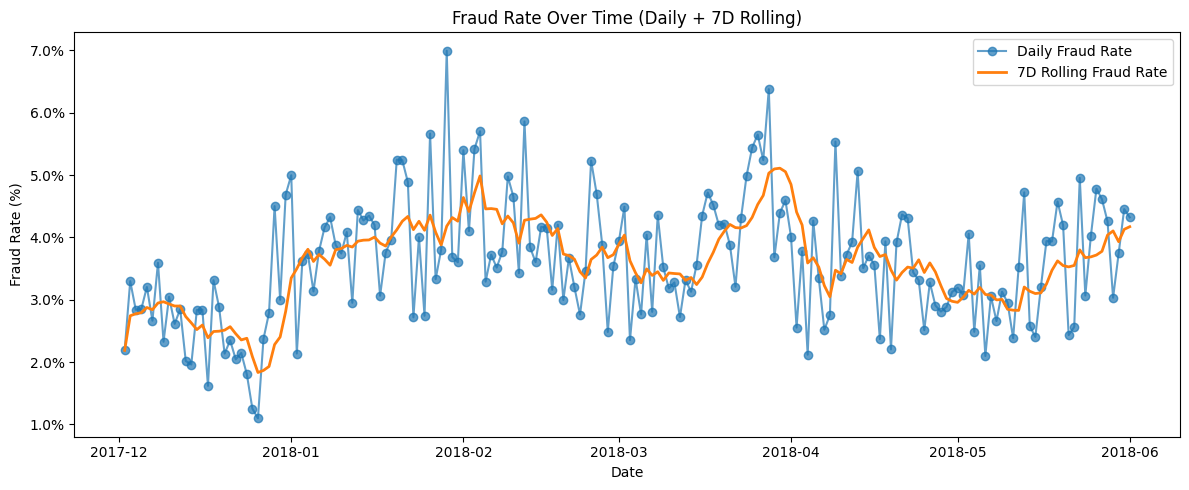

[Info] Daily fraud rate computed for 182 days. Rolling window = 7.


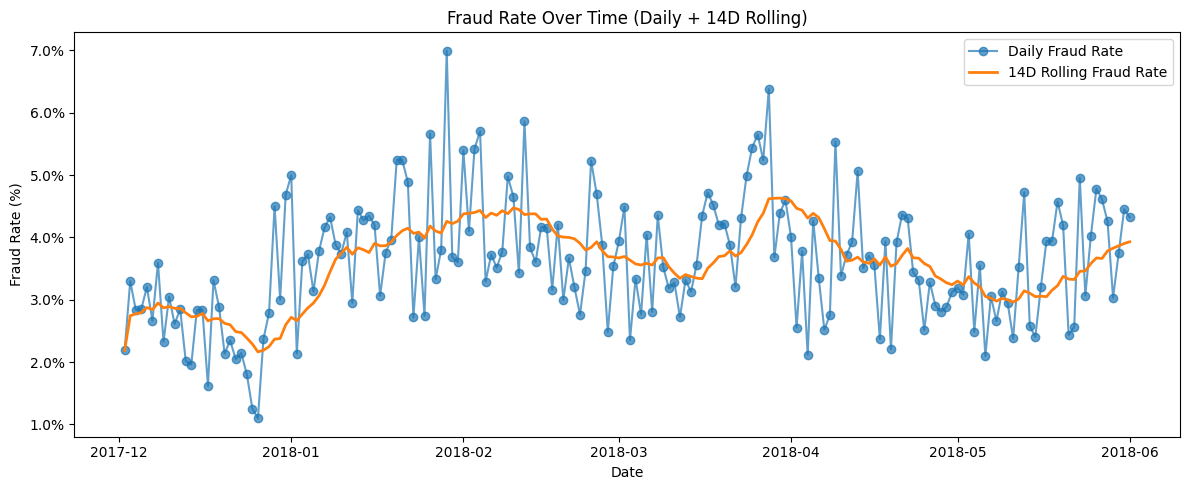

[Info] Daily fraud rate computed for 182 days. Rolling window = 14.


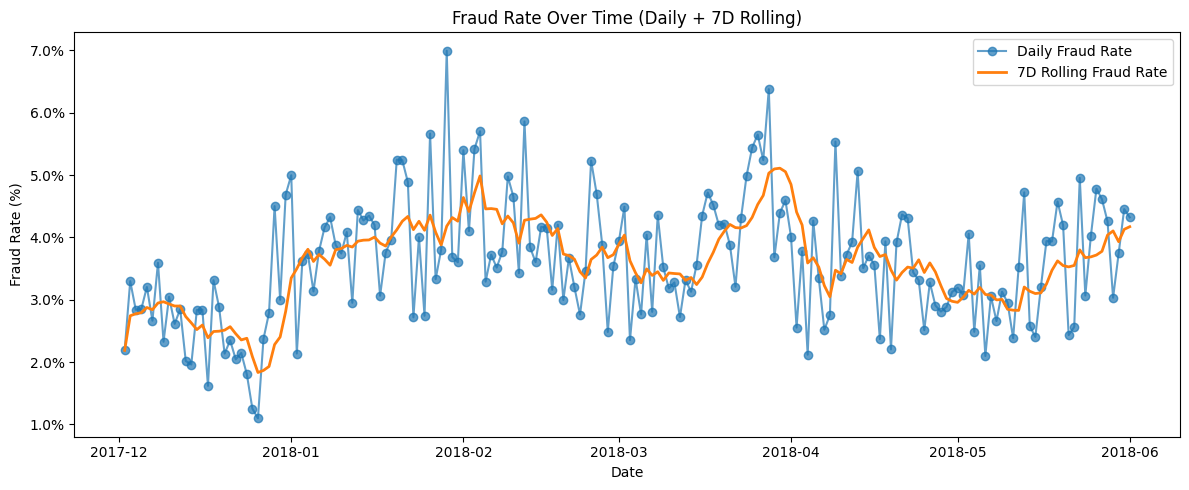

[Info] Daily fraud rate computed for 182 days. Rolling window = 7.


Daily_FraudRate  7D_Rolling
DT                                     
2017-12-02         2.186646    2.186646
2017-12-03         3.297587    2.742116
2017-12-04         2.838630    2.774288
2017-12-05         2.849356    2.793055
2017-12-06         3.203835    2.875211
...                     ...         ...
2018-05-28         4.255319    4.036909
2018-05-29         3.031695    4.103824
2018-05-30         3.743316    3.930778
2018-05-31         4.454180    4.129001
2018-06-01         4.320988    4.171236

[182 rows x 2 columns]

In [48]:
# Basic
plot_rolling_fraud_rate(df, window=7)

# Longer smoothing
plot_rolling_fraud_rate(df, window=14)

# With value labels (good for short ranges)
plot_rolling_fraud_rate(df, window=7, add_labels=True)


[Info] Limiting to top 50 entities by activity.
[Done] Time features computed (streaming, low memory).

[Info] Plotting (with sub-sampling) …


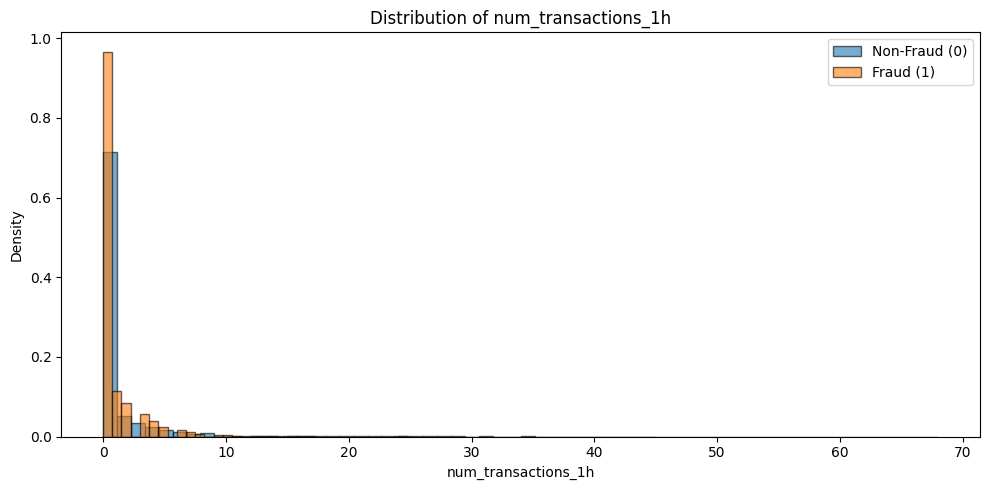

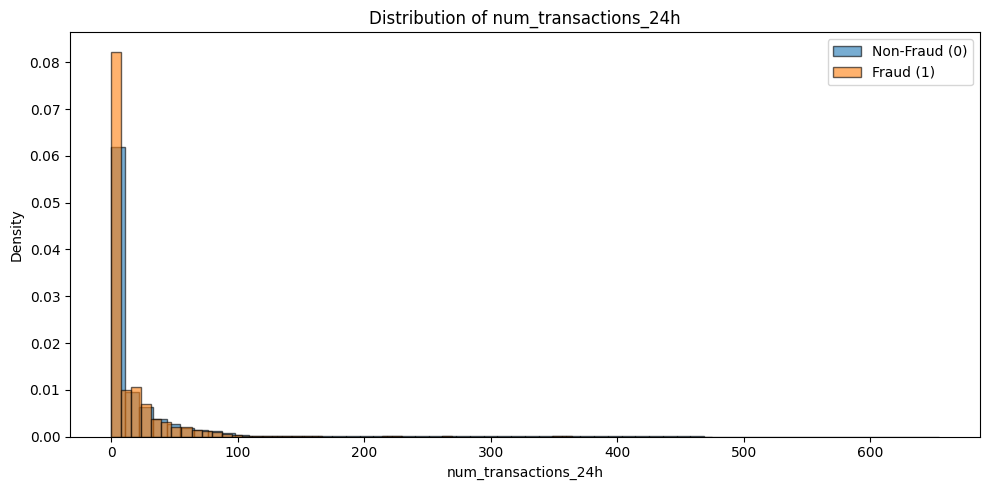

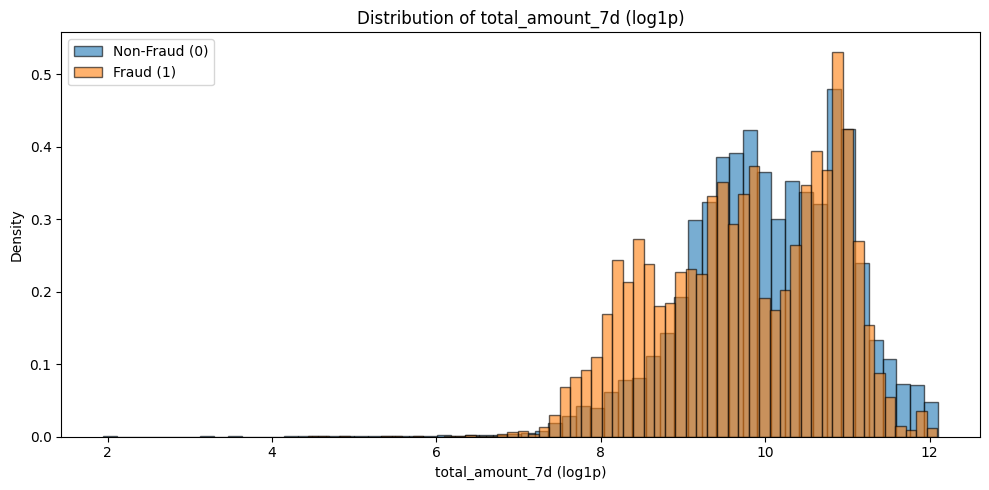

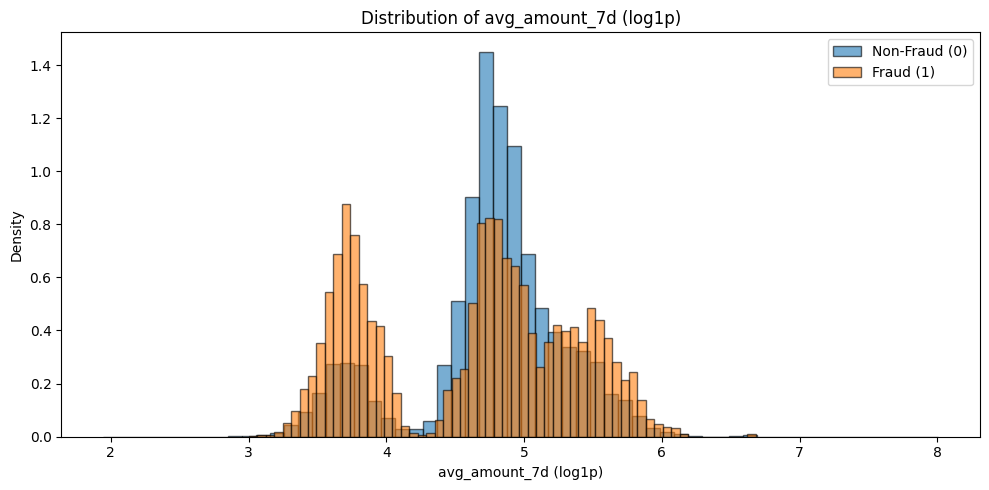

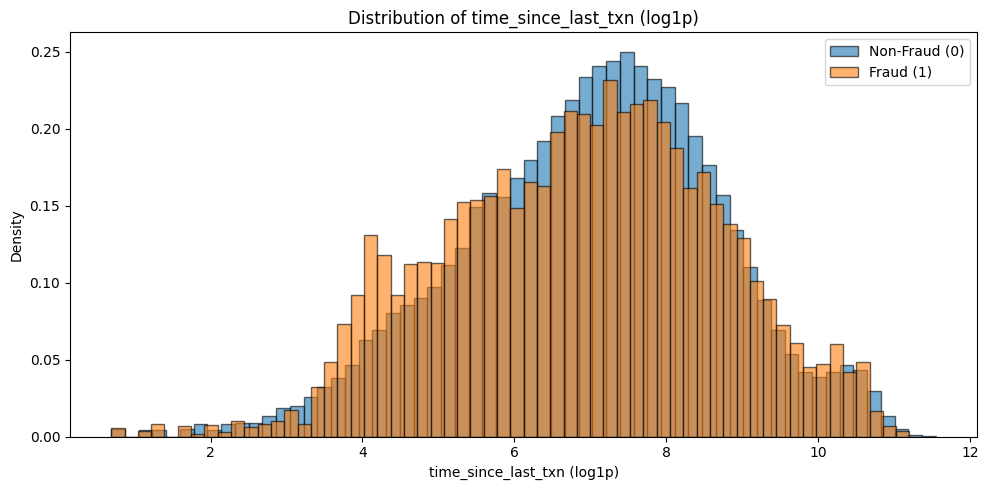


[Head] Engineered time-based features:


card1                  DT  num_transactions_1h  num_transactions_24h  total_amount_7d  avg_amount_7d  time_since_last_txn  isFraud
0  13926 2017-12-02 00:00:00                    0                     0              0.0            0.0                  NaN        0
1   2755 2017-12-02 00:00:01                    0                     0              0.0            0.0                  NaN        0
2   4663 2017-12-02 00:01:09                    0                     0              0.0            0.0                  NaN        0
3  18132 2017-12-02 00:01:39                    0                     0              0.0            0.0                  NaN        0
4   4497 2017-12-02 00:01:46                    0                     0              0.0            0.0                  NaN        0
5   5937 2017-12-02 00:01:50                    0                     0              0.0            0.0                  NaN        0
6  12308 2017-12-02 00:02:02                    0                     0              0.0            0.0                  NaN        0
7  12695 2017-12-02 00:02:09                    0                     0              0.0            0.0                  NaN        0
8   2803 2017-12-02 00:02:15                    0                     0              0.0            0.0                  NaN        0
9  17399 2017-12-02 00:02:16                    0                     0              0.0            0.0                  NaN        0

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import gc

# =========================
# Helpers (robust casting)
# =========================
def clean_binary_flag(s, true_values=(1,)):
    """Coerce a column to a clean 0/1 int8 flag without raising on NaN/Inf."""
    x = pd.to_numeric(s, errors="coerce")
    x = x.where(np.isfinite(x), 0.0)
    x = (x > 0).astype(np.int8)
    return x

def ensure_dt(df, dt_col="DT", tx_col="TransactionDT"):
    """
    Ensure df[dt_col] exists as datetime64[ns].
    If missing, derive from seconds since 2017-12-01 (IEEE-CIS style).
    """
    if dt_col in df.columns:
        df[dt_col] = pd.to_datetime(df[dt_col], errors="coerce")
        return df
    if tx_col not in df.columns:
        raise RuntimeError(f"Neither '{dt_col}' nor '{tx_col}' present to build time features.")
    origin = pd.Timestamp("2017-12-01")
    txn = pd.to_numeric(df[tx_col], errors="coerce")
    df[dt_col] = origin + pd.to_timedelta(txn, unit="s")
    return df

# =========================================================
# STREAMING, LOW-MEM TIME FEATURES (no pandas rolling)
# =========================================================
def compute_time_features_streaming(
    df: pd.DataFrame,
    entity_col: str,
    dt_col: str = "DT",
    amt_col: str = "TransactionAmt",
    max_entities: int | None = None,     # process only top-N most active entities (optional)
    max_rows_per_entity: int | None = None, # cap per-entity rows processed (optional, newest kept)
    verbose: bool = True
):
    """
    Compute leakage-free velocity/recency features with O(n) sliding windows per entity,
    writing results back to df without creating big intermediate frames.

    Features:
      - num_transactions_1h, num_transactions_24h  (prior counts)
      - total_amount_7d, avg_amount_7d             (prior sum/mean)
      - time_since_last_txn (seconds)
    """

    # Preconditions
    for c in [entity_col, amt_col]:
        if c not in df.columns:
            raise RuntimeError(f"Missing column '{c}'")

    ensure_dt(df, dt_col=dt_col)
    df[amt_col] = pd.to_numeric(df[amt_col], errors="coerce")
    df["isFraud"] = clean_binary_flag(df.get("isFraud", 0))

    # Downcast amount to float32 if reasonable (saves memory)
    if pd.api.types.is_float_dtype(df[amt_col]):
        df[amt_col] = df[amt_col].astype("float32")

    # Prepare output arrays
    n = len(df)
    out_n1h   = np.zeros(n, dtype=np.int32)
    out_n24h  = np.zeros(n, dtype=np.int32)
    out_sum7d = np.zeros(n, dtype=np.float32)
    out_avg7d = np.zeros(n, dtype=np.float32)
    out_rec   = np.full(n, np.nan, dtype=np.float32)

    # Choose entities (optionally top-N by activity)
    if max_entities is not None:
        vc = df[entity_col].value_counts()
        keep_entities = set(vc.head(int(max_entities)).index)
        ent_iter = df[df[entity_col].isin(keep_entities)][entity_col].drop_duplicates().tolist()
        if verbose:
            print(f"[Info] Limiting to top {len(keep_entities)} entities by activity.")
    else:
        ent_iter = df[entity_col].drop_duplicates().tolist()

    # Index groups without materializing large frames
    # Map from entity to its row indices
    # (We keep it light by using groupby indices, not copying data)
    for ent in ent_iter:
        idx = df.index[df[entity_col] == ent]
        if idx.size == 0:
            continue

        # Optional per-entity cap: keep the most recent rows to focus on latest behavior
        if max_rows_per_entity is not None and idx.size > max_rows_per_entity:
            # sort by time and keep last max_rows_per_entity
            sub = df.loc[idx, [dt_col]]
            order = np.argsort(pd.to_datetime(sub[dt_col].values).view("i8"))
            idx = idx.values[order][-int(max_rows_per_entity):]
            idx = pd.Index(idx)

        # Sort this entity's indices by time (increasing)
        t_ns = pd.to_datetime(df.loc[idx, dt_col].values, errors="coerce").view("i8")
        valid = np.isfinite(t_ns)
        if not valid.any():
            continue
        idx = idx.values[valid]
        t_ns = t_ns[valid]
        order = np.argsort(t_ns)
        idx = idx[order]
        t_ns = t_ns[order]

        amt = pd.to_numeric(df.loc[idx, amt_col].values, errors="coerce")
        # Replace NaN amounts with 0 for sums; doesn’t affect counts
        amt = np.where(np.isfinite(amt), amt, 0.0).astype(np.float32)

        # Convert times to seconds (int64)
        t_s = (t_ns // 1_000_000_000).astype(np.int64)

        # Sliding window pointers
        p1h = p24h = p7d = 0
        last_time = None

        for j in range(len(idx)):
            tj = t_s[j]

            # Recency (seconds since previous)
            if last_time is None:
                out_rec[idx[j]] = np.nan
            else:
                out_rec[idx[j]] = float(tj - last_time)
            last_time = tj

            # Move left pointers to maintain prior-only windows
            # prior window is (tj - W, tj), excluding current
            # 1 hour
            while p1h < j and t_s[p1h] < tj - 3600:
                p1h += 1
            # 24 hours
            while p24h < j and t_s[p24h] < tj - 86400:
                p24h += 1
            # 7 days
            while p7d < j and t_s[p7d] < tj - 7*86400:
                p7d += 1

            # Counts exclude current j
            out_n1h[idx[j]]  = j - p1h
            out_n24h[idx[j]] = j - p24h

            # Sums/means over (p7d .. j-1)
            if j - p7d > 0:
                s7 = float(amt[p7d:j].sum())
                out_sum7d[idx[j]] = s7
                out_avg7d[idx[j]] = s7 / (j - p7d)
            else:
                out_sum7d[idx[j]] = 0.0
                out_avg7d[idx[j]] = 0.0

        # Periodic GC to keep memory low
        if verbose and (len(idx) > 200_000):
            gc.collect()

    # Attach results back to df (as efficient dtypes)
    df["num_transactions_1h"]  = out_n1h
    df["num_transactions_24h"] = out_n24h
    df["total_amount_7d"]      = out_sum7d
    df["avg_amount_7d"]        = out_avg7d
    df["time_since_last_txn"]  = out_rec

    # Optional: downcast counts to int16 if you know counts won’t exceed 32767
    # df["num_transactions_1h"]  = pd.to_numeric(df["num_transactions_1h"], downcast="integer")
    # df["num_transactions_24h"] = pd.to_numeric(df["num_transactions_24h"], downcast="integer")

    if verbose:
        print("[Done] Time features computed (streaming, low memory).")
    return df

# =========================================================
# LIGHTWEIGHT SPLIT HISTOGRAM (with sub-sampling)
# =========================================================
def plot_split_hist_light(
    df: pd.DataFrame,
    feature: str,
    fraud_col: str = "isFraud",
    bins: int = 60,
    logx: bool = False,
    density: bool = True,
    max_samples_per_class: int = 200_000,  # cap plotted points to avoid heavy memory
    title: str | None = None
):
    if feature not in df.columns:
        print(f"❌ Missing feature '{feature}'"); return
    if fraud_col not in df.columns:
        print(f"❌ Missing column '{fraud_col}'"); return

    y = clean_binary_flag(df[fraud_col])
    x = pd.to_numeric(df[feature], errors="coerce")

    x0 = x[y == 0].dropna()
    x1 = x[y == 1].dropna()

    # Sub-sample to keep plotting light
    if len(x0) > max_samples_per_class:
        x0 = x0.sample(max_samples_per_class, random_state=42)
    if len(x1) > max_samples_per_class:
        x1 = x1.sample(max_samples_per_class, random_state=42)

    if logx:
        x0 = x0[x0 > 0]; x1 = x1[x1 > 0]
        x0 = np.log1p(x0); x1 = np.log1p(x1)

    if len(x0) == 0 and len(x1) == 0:
        print(f"⚠️ Nothing to plot for '{feature}'"); return

    fig, ax = plt.subplots(figsize=(10,5))
    ax.hist(x0, bins=bins, density=density, alpha=0.6, edgecolor="black", label="Non-Fraud (0)")
    ax.hist(x1, bins=bins, density=density, alpha=0.6, edgecolor="black", label="Fraud (1)")

    ttl = title or f"Distribution of {feature}" + (" (log1p)" if logx else "")
    ax.set_title(ttl)
    ax.set_xlabel(feature + (" (log1p)" if logx else ""))
    ax.set_ylabel("Density" if density else "Frequency")
    ax.legend()
    fig.tight_layout()
    plt.show()
    plt.close(fig)

# =========================================================
# DRIVER: safe, crash-resistant EDA run
# =========================================================
def run_time_behavior_eda_light(
    df: pd.DataFrame,
    entity_col: str,                  # e.g., 'uid' or 'card1'
    dt_col: str = "DT",
    amt_col: str = "TransactionAmt",
    fraud_col: str = "isFraud",
    max_entities: int | None = 50,    # process only top-N active entities by default
    max_rows_per_entity: int | None = 200_000,  # cap per-entity rows
    plot: bool = True
):
    # 1) Ensure datetime & clean fraud flag
    ensure_dt(df, dt_col=dt_col)
    df[fraud_col] = clean_binary_flag(df[fraud_col])

    # 2) Compute streaming features (low memory)
    df = compute_time_features_streaming(
        df=df,
        entity_col=entity_col,
        dt_col=dt_col,
        amt_col=amt_col,
        max_entities=max_entities,
        max_rows_per_entity=max_rows_per_entity,
        verbose=True
    )

    if plot:
        feats = [
            "num_transactions_1h",
            "num_transactions_24h",
            "total_amount_7d",
            "avg_amount_7d",
            "time_since_last_txn",
        ]
        print("\n[Info] Plotting (with sub-sampling) …")
        for f in feats:
            log_flag = f in {"total_amount_7d", "avg_amount_7d", "time_since_last_txn"}
            plot_split_hist_light(df, f, fraud_col=fraud_col, bins=60, logx=log_flag, density=True)

    return df

# =========================
# EXAMPLE USAGE
# =========================
# Choose your dataframe
_df = (train_fe if 'train_fe' in globals() else
       merged_df if 'merged_df' in globals() else None)

if _df is None:
    print("❌ Define train_fe or merged_df first.")
else:
    # Choose an entity key you have (uid preferred if available)
    entity_key = 'uid' if 'uid' in _df.columns else ('card1' if 'card1' in _df.columns else None)
    if entity_key is None:
        raise RuntimeError("Please provide an entity column like 'uid' or 'card1'.")

    # Run the lightweight EDA
    _df = run_time_behavior_eda_light(
        _df,
        entity_col=entity_key,
        dt_col="DT",
        amt_col="TransactionAmt",
        fraud_col="isFraud",
        max_entities=50,            # adjust up/down based on RAM
        max_rows_per_entity=200_000, # adjust up/down based on RAM
        plot=True
    )

    # Quick peek at engineered columns
    cols_show = [entity_key, "DT", "num_transactions_1h", "num_transactions_24h",
                 "total_amount_7d", "avg_amount_7d", "time_since_last_txn", "isFraud"]
    print("\n[Head] Engineered time-based features:")
    display(_df[cols_show].head(10))

    # Encourage GC after heavy work
    gc.collect()


[Device] Processing 590,540 rows across 1,787 devices.


/tmp/ipython-input-1111090539.py:170: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  t_ns = pd.to_datetime(df.loc[idx, dt_col], errors="coerce").view("i8").values
/tmp/ipython-input-1111090539.py:170: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  t_ns = pd.to_datetime(df.loc[idx, dt_col], errors="coerce").view("i8").values
/tmp/ipython-input-1111090539.py:170: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  t_ns = pd.to_datetime(df.loc[idx, dt_col], errors="coerce").view("i8").values
/tmp/ipython-input-1111090539.py:170: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  t_ns = pd.to_datetime(df.loc[idx, dt_col], errors="coerce").vi

[Subnet] Processing 590,540 rows across 438 subnets.


/tmp/ipython-input-1111090539.py:199: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  t_ns = pd.to_datetime(df.loc[idx, dt_col], errors="coerce").view("i8").values
/tmp/ipython-input-1111090539.py:199: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  t_ns = pd.to_datetime(df.loc[idx, dt_col], errors="coerce").view("i8").values
/tmp/ipython-input-1111090539.py:199: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  t_ns = pd.to_datetime(df.loc[idx, dt_col], errors="coerce").view("i8").values
/tmp/ipython-input-1111090539.py:199: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  t_ns = pd.to_datetime(df.loc[idx, dt_col], errors="coerce").vi

[UA] Entities total: 13,553 (batch size: 10,000)


Streaming output truncated to the last 5000 lines.
/tmp/ipython-input-1111090539.py:236: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  t_ns = pd.to_datetime(df.loc[idx, dt_col], errors="coerce").view("i8").values
/tmp/ipython-input-1111090539.py:236: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  t_ns = pd.to_datetime(df.loc[idx, dt_col], errors="coerce").view("i8").values
/tmp/ipython-input-1111090539.py:236: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  t_ns = pd.to_datetime(df.loc[idx, dt_col], errors="coerce").view("i8").values
/tmp/ipython-input-1111090539.py:236: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  t_ns = pd.t

[Done] Risk features derived (RAM-safe).

[Plots] Fraud share by Device Type


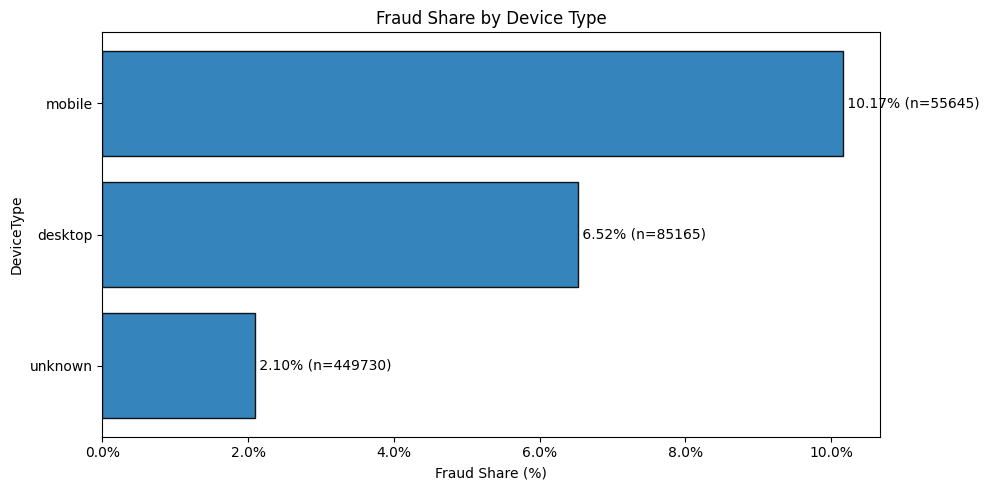


[Plots] Fraud share by DeviceInfo


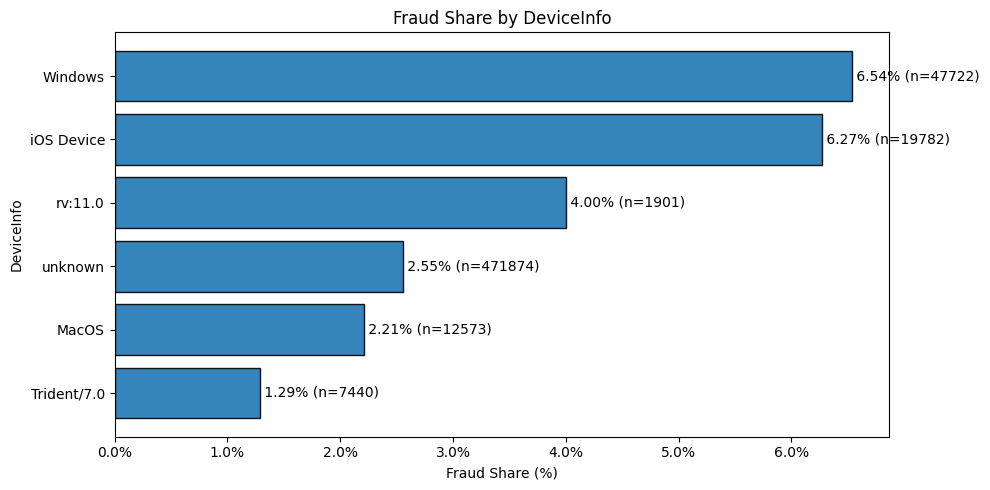


[Plots] Fraud share by IP Subnet Frequency


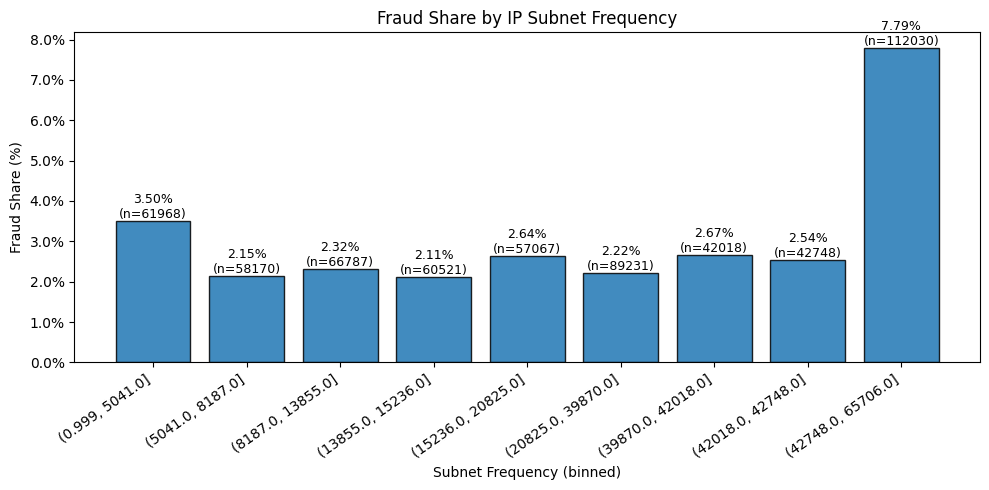


[Head] New risk features:


card1                  DT  first_seen_device_age_days  ip_subnet_seen_before  user_agent_mismatch_rate_7d                     DeviceInfo DeviceType _subnet  isFraud
0  13926 2017-12-02 00:00:00                    0.000000                      0                          NaN                        unknown    unknown  315-87        0
1   2755 2017-12-02 00:00:01                    0.000012                      0                          NaN                        unknown    unknown  325-87        0
2   4663 2017-12-02 00:01:09                    0.000799                      0                          NaN                        unknown    unknown  330-87        0
3  18132 2017-12-02 00:01:39                    0.001146                      0                          NaN                        unknown    unknown  476-87        0
4   4497 2017-12-02 00:01:46                    0.000000                      0                          NaN  SAMSUNG SM-G892A Build/NRD90M     mobile  420-87        0
5   5937 2017-12-02 00:01:50                    0.001273                      0                          NaN                        unknown    unknown  272-87        0
6  12308 2017-12-02 00:02:02                    0.001412                      0                          NaN                        unknown    unknown  126-87        0
7  12695 2017-12-02 00:02:09                    0.001493                      1                          NaN                        unknown    unknown  325-87        0
8   2803 2017-12-02 00:02:15                    0.000000                      0                          NaN                     iOS Device     mobile  337-87        0
9  17399 2017-12-02 00:02:16                    0.001574                      0                          NaN                        unknown    unknown  204-87        0

In [50]:
# =========================
# Device/IP/UA Risk — Ultra RAM-Safe (Colab)
# =========================
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from IPython.display import display
from collections import deque, Counter
import gc, sys, math

# ---------- SAFETY CONFIG (tune here) ----------
SAFETY_CONFIG = dict(
    # Trim source DataFrame to only these columns (others are dropped for this EDA pass)
    keep_cols=[
        "DT","TransactionDT","TransactionAmt","isFraud",
        "DeviceInfo","DeviceID","device_id","DeviceType","device_type",
        "ip","IPaddress","ip_addr","addr1","addr2",
        "UserAgent","user_agent","id_31",
        # entity key(s) – add 'uid' or 'card1' or your id:
        "uid","card1"
    ],
    # Caps (lower = safer)
    max_unique_devices=50_000,
    max_unique_subnets=150_000,
    # Process entities in batches (N unique entities per batch)
    entity_batch_size=10_000,
    # Cap rows per entity (keeps newest N rows per entity)
    max_rows_per_entity=150_000,
    # Plotting sample caps per class to avoid large hist allocations
    max_samples_per_class=150_000
)

# ---------- Helpers ----------
def _free():
    gc.collect()

def _approx_obj_size_gb(obj) -> float:
    """Rough memory estimator in GB."""
    try:
        import sys
        return sys.getsizeof(obj) / (1024**3)
    except Exception:
        return 0.0

def _is_tight_memory(threshold_gb=1.0):
    """Very rough heuristic: treat as tight if Python objects balloon."""
    # (We can’t read Colab RAM programmatically without psutil; use a conservative flag.)
    return False  # leave as False; users can flip manually if needed.

def clean_binary_flag(s):
    x = pd.to_numeric(s, errors="coerce")
    x = x.where(np.isfinite(x), 0.0)
    return (x > 0).astype(np.int8)

def ensure_dt(df, dt_col="DT", tx_col="TransactionDT"):
    if dt_col in df.columns:
        df[dt_col] = pd.to_datetime(df[dt_col], errors="coerce")
        return df
    if tx_col not in df.columns:
        raise RuntimeError(f"Neither '{dt_col}' nor '{tx_col}' present to build time features.")
    origin = pd.Timestamp("2017-12-01")
    df[dt_col] = origin + pd.to_timedelta(pd.to_numeric(df[tx_col], errors="coerce"), unit="s")
    return df

def choose_first_available(df, candidates, fallback=None):
    for c in candidates:
        if c in df.columns:
            return c
    return fallback

def extract_ipv4_subnet(ip_series, default="unknown"):
    s = ip_series.fillna("").astype(str)
    parts = s.str.split(".", n=3, expand=True)
    if parts.shape[1] != 4:
        return pd.Series(default, index=s.index)
    subnet = (parts[0].where(parts[0].str.isnumeric(), np.nan) + "." +
              parts[1].where(parts[1].str.isnumeric(), np.nan) + "." +
              parts[2].where(parts[2].str.isnumeric(), np.nan))
    return subnet.where(subnet.notna(), default)

def build_pseudo_subnet_from_addr(df, col1="addr1", col2="addr2", default="unknown"):
    a1 = pd.to_numeric(df[col1], errors="coerce").astype("Int64") if col1 in df.columns else pd.Series(pd.NA, index=df.index, dtype="Int64")
    a2 = pd.to_numeric(df[col2], errors="coerce").astype("Int64") if col2 in df.columns else pd.Series(pd.NA, index=df.index, dtype="Int64")
    sub = a1.astype(str) + "-" + a2.astype(str)
    return sub.where(~a1.isna() & ~a2.isna(), default)

def _trim_and_downcast(df, keep_cols):
    cols = [c for c in keep_cols if c in df.columns]
    df = df[cols].copy()
    # downcast numerics
    for c in df.columns:
        if pd.api.types.is_float_dtype(df[c]):
            df[c] = pd.to_numeric(df[c], downcast="float")
        elif pd.api.types.is_integer_dtype(df[c]):
            df[c] = pd.to_numeric(df[c], downcast="integer")
        elif pd.api.types.is_bool_dtype(df[c]):
            df[c] = df[c].astype("int8")
        # strings left as is
    return df

# ---------- Feature engineering (RAM-safe, batched) ----------
def compute_device_ip_ua_risk_features_safe(
    df: pd.DataFrame,
    entity_col: str,
    dt_col: str = "DT",
    device_col_candidates = ("DeviceInfo","DeviceID","device_id"),
    device_type_col_candidates = ("DeviceType","device_type"),
    ip_col_candidates = ("ip","IPaddress","ip_addr"),
    ua_col_candidates = ("UserAgent","user_agent","id_31"),
    max_unique_devices: int | None = SAFETY_CONFIG["max_unique_devices"],
    max_unique_subnets: int | None = SAFETY_CONFIG["max_unique_subnets"],
    entity_batch_size: int = SAFETY_CONFIG["entity_batch_size"],
    max_rows_per_entity: int | None = SAFETY_CONFIG["max_rows_per_entity"],
    verbose: bool = True
):
    # Keep only needed columns (huge memory saver)
    df = _trim_and_downcast(df, SAFETY_CONFIG["keep_cols"])
    _free()

    ensure_dt(df, dt_col=dt_col)
    df["isFraud"] = clean_binary_flag(df.get("isFraud", 0))

    # Pick available columns
    device_col = choose_first_available(df, device_col_candidates)
    device_type_col = choose_first_available(df, device_type_col_candidates)
    ip_col = choose_first_available(df, ip_col_candidates)
    ua_col = choose_first_available(df, ua_col_candidates)

    if device_col is None:
        df["__device__"] = "unknown"; device_col = "__device__"
    if device_type_col is None:
        df["__devtype__"] = "unknown"; device_type_col = "__devtype__"
    if ua_col is None:
        df["__ua__"] = "unknown"; ua_col = "__ua__"

    # Subnet
    if ip_col is not None and ip_col in df.columns:
        df["_subnet"] = extract_ipv4_subnet(df[ip_col], default="unknown")
    elif "addr1" in df.columns and "addr2" in df.columns:
        df["_subnet"] = build_pseudo_subnet_from_addr(df, "addr1","addr2", default="unknown")
    else:
        df["_subnet"] = "unknown"

    for c in [device_col, device_type_col, ua_col, "_subnet", entity_col]:
        if c in df.columns:
            df[c] = df[c].astype("string").fillna("unknown")

    n = len(df)
    age_days = np.full(n, np.nan, dtype=np.float32)
    seen_before = np.zeros(n, dtype=np.int8)
    ua_mismatch = np.full(n, np.nan, dtype=np.float32)

    # ---- Device first seen age (batched on unique devices) ----
    devs = df[device_col].dropna().unique().tolist()
    if max_unique_devices is not None and len(devs) > max_unique_devices:
        # Keep the most frequent devices only (safe approach using value_counts but on single column)
        vc = df[device_col].value_counts()
        devs = vc.nlargest(int(max_unique_devices)).index.tolist()
        mask_dev = df[device_col].isin(devs)
    else:
        mask_dev = pd.Series(True, index=df.index)

    if verbose:
        print(f"[Device] Processing {mask_dev.sum():,} rows across {len(devs):,} devices.")

    # groupby groups indices; iterate without building big frames
    for dev, idx in df.loc[mask_dev, [device_col, dt_col]].groupby(device_col, sort=False).groups.items():
        t_ns = pd.to_datetime(df.loc[idx, dt_col], errors="coerce").view("i8").values
        ok = np.isfinite(t_ns)
        if not ok.any():
            continue
        idx = df.loc[idx].index.values[ok]
        t_ns = t_ns[ok]
        order = np.argsort(t_ns)
        idx = idx[order]; t_ns = t_ns[order]
        first_t = t_ns[0]
        age = ((t_ns - first_t) / 86_400_000_000_000).astype(np.float64)
        age_days[idx] = age.astype(np.float32)
        if len(idx) > 400_000:
            _free()

    df["first_seen_device_age_days"] = age_days

    # ---- Subnet seen before (batched) ----
    subs = df["_subnet"].dropna().unique().tolist()
    if max_unique_subnets is not None and len(subs) > max_unique_subnets:
        vc = df["_subnet"].value_counts()
        subs = vc.nlargest(int(max_unique_subnets)).index.tolist()
        mask_sub = df["_subnet"].isin(subs)
    else:
        mask_sub = pd.Series(True, index=df.index)

    if verbose:
        print(f"[Subnet] Processing {mask_sub.sum():,} rows across {len(subs):,} subnets.")

    for sub, idx in df.loc[mask_sub, ["_subnet", dt_col]].groupby("_subnet", sort=False).groups.items():
        t_ns = pd.to_datetime(df.loc[idx, dt_col], errors="coerce").view("i8").values
        ok = np.isfinite(t_ns)
        if not ok.any():
            continue
        idx = df.loc[idx].index.values[ok]
        t_ns = t_ns[ok]
        order = np.argsort(t_ns)
        idx = idx[order]
        if len(idx) > 1:
            seen_before[idx[1:]] = 1
        if len(idx) > 500_000:
            _free()

    df["ip_subnet_seen_before"] = seen_before.astype(np.int8)

    # ---- UA mismatch rate over past 7 days (entity-batched) ----
    WINDOW_NS_7D = 7 * 86_400_000_000_000
    # Unique entities
    ents = df[entity_col].dropna().unique().tolist()
    if verbose:
        print(f"[UA] Entities total: {len(ents):,} (batch size: {entity_batch_size:,})")

    # Process entities in batches to bound memory
    for start in range(0, len(ents), entity_batch_size):
        end = min(start + entity_batch_size, len(ents))
        batch_ents = set(ents[start:end])
        e_mask = df[entity_col].isin(batch_ents)
        # For each entity in this batch
        for _, eidx in df.loc[e_mask, [entity_col, dt_col]].groupby(entity_col, sort=False).groups.items():
            idx = df.loc[eidx].index
            # cap rows per entity (keep newest)
            if max_rows_per_entity is not None and len(idx) > max_rows_per_entity:
                t_ns_all = pd.to_datetime(df.loc[idx, dt_col], errors="coerce").view("i8").values
                order_all = np.argsort(t_ns_all)
                idx = idx.values[order_all][-int(max_rows_per_entity):]
                idx = pd.Index(idx)

            t_ns = pd.to_datetime(df.loc[idx, dt_col], errors="coerce").view("i8").values
            ok = np.isfinite(t_ns)
            if not ok.any():
                continue
            idx = idx.values[ok]
            t_ns = t_ns[ok]
            ua = df.loc[idx, ua_col].astype(str).values

            order = np.argsort(t_ns)
            idx = idx[order]; t_ns = t_ns[order]; ua = ua[order]

            win = deque()
            counts = Counter()

            for j in range(len(idx)):
                tj = t_ns[j]
                bound = tj - WINDOW_NS_7D
                while win and win[0][0] < bound:
                    old_t, old_ua = win.popleft()
                    counts[old_ua] -= 1
                    if counts[old_ua] == 0:
                        del counts[old_ua]
                prior_n = sum(counts.values())  # correct
                if prior_n == 0:
                    ua_mismatch[idx[j]] = np.nan
                else:
                    same = counts.get(ua[j], 0)
                    ua_mismatch[idx[j]] = (prior_n - same) / prior_n
                win.append((tj, ua[j]))
                counts[ua[j]] += 1

        _free()
        # Auto-throttle if we sense memory pressure
        if _is_tight_memory():
            print("[UA] Tight memory detected; reducing future batch size by half.")
            entity_batch_size = max(1000, entity_batch_size // 2)

    df["user_agent_mismatch_rate_7d"] = ua_mismatch.astype(np.float32)

    _free()
    if verbose:
        print("[Done] Risk features derived (RAM-safe).")
    return df

# ---------- Lightweight plotting ----------
def plot_fraud_share_by_category_light(
    df: pd.DataFrame,
    cat_col: str,
    fraud_col: str = "isFraud",
    min_count: int = 500,
    top_n: int = 20,
    title: str | None = None
):
    if cat_col not in df.columns:
        print(f"❌ Column '{cat_col}' not found."); return
    y = clean_binary_flag(df[fraud_col])
    s = df[cat_col].astype("string").fillna("unknown")
    tmp = (pd.DataFrame({"cat": s, "isFraud": y})
           .groupby("cat", observed=True)
           .agg(n=("isFraud","size"), fr=("isFraud","mean"))
           .reset_index())
    tmp = tmp[tmp["n"] >= int(min_count)]
    if tmp.empty:
        tmp = tmp.sort_values("n", ascending=False).head(top_n)
    else:
        tmp = tmp.sort_values("fr", ascending=True).head(top_n)

    fig, ax = plt.subplots(figsize=(10,5))
    ax.barh(tmp["cat"].astype(str), tmp["fr"].values, alpha=0.9, edgecolor="black")
    ax.xaxis.set_major_formatter(PercentFormatter(1.0, decimals=1))
    ax.set_xlabel("Fraud Share (%)"); ax.set_ylabel(cat_col)
    ax.set_title(title or f"Fraud Share by {cat_col}")
    for yi, (fr, n) in enumerate(zip(tmp["fr"].values, tmp["n"].values)):
        ax.text(fr, yi, f" {fr*100:.2f}% (n={int(n)})", va="center")
    plt.tight_layout(); plt.show()

def plot_fraud_share_by_ip_frequency_light(
    df: pd.DataFrame,
    subnet_col: str = "_subnet",
    fraud_col: str = "isFraud",
    max_bins: int = 10,
    title: str | None = None
):
    if subnet_col not in df.columns:
        print(f"❌ Column '{subnet_col}' not found."); return
    y = clean_binary_flag(df[fraud_col])
    sub = df[subnet_col].astype("string").fillna("unknown")

    vc = sub.value_counts()
    freq = sub.map(vc).astype("int32")

    # quantile bins (robust)
    qs = np.linspace(0, 1, max_bins+1)
    edges = np.unique(np.quantile(freq, qs))
    if edges.size < 2:
        print("⚠️ Not enough variation to bin IP frequency.")
        return
    binned = pd.cut(freq, bins=edges, include_lowest=True)
    tmp = (pd.DataFrame({"bin": binned, "isFraud": y})
           .groupby("bin", observed=True)
           .agg(n=("isFraud","size"), fr=("isFraud","mean"))
           .reset_index()
           .sort_values("bin"))

    fig, ax = plt.subplots(figsize=(10,5))
    ax.bar(tmp["bin"].astype(str), tmp["fr"].values, alpha=0.85, edgecolor="black")
    ax.yaxis.set_major_formatter(PercentFormatter(1.0, decimals=1))
    ax.set_xlabel("Subnet Frequency (binned)"); ax.set_ylabel("Fraud Share (%)")
    ax.set_title(title or "Fraud Share by IP Subnet Frequency")
    for i, (fr, n) in enumerate(zip(tmp["fr"].values, tmp["n"].values)):
        ax.text(i, fr, f"{fr*100:.2f}%\n(n={int(n)})", ha="center", va="bottom", fontsize=9)
    plt.xticks(rotation=35, ha="right"); plt.tight_layout(); plt.show()

# ---------- Driver ----------
def run_device_ip_ua_risk_eda_ultrasafe(
    df: pd.DataFrame,
    entity_col: str,
    dt_col: str = "DT",
    device_col_candidates=("DeviceInfo","DeviceID","device_id"),
    device_type_col_candidates=("DeviceType","device_type"),
    ip_col_candidates=("ip","IPaddress","ip_addr"),
    ua_col_candidates=("UserAgent","user_agent","id_31"),
    retry_if_memory=True
):
    cfg = SAFETY_CONFIG.copy()
    try:
        df = compute_device_ip_ua_risk_features_safe(
            df=df,
            entity_col=entity_col,
            dt_col=dt_col,
            device_col_candidates=device_col_candidates,
            device_type_col_candidates=device_type_col_candidates,
            ip_col_candidates=ip_col_candidates,
            ua_col_candidates=ua_col_candidates,
            max_unique_devices=cfg["max_unique_devices"],
            max_unique_subnets=cfg["max_unique_subnets"],
            entity_batch_size=cfg["entity_batch_size"],
            max_rows_per_entity=cfg["max_rows_per_entity"],
            verbose=True
        )
    except MemoryError:
        if not retry_if_memory:
            raise
        print("⚠️ MemoryError detected — retrying with tighter caps.")
        cfg["max_unique_devices"] = max(10_000, cfg["max_unique_devices"] // 5)
        cfg["max_unique_subnets"] = max(30_000, cfg["max_unique_subnets"] // 5)
        cfg["entity_batch_size"]  = max(2_000, cfg["entity_batch_size"] // 2)
        cfg["max_rows_per_entity"]= max(50_000, cfg["max_rows_per_entity"] // 2)
        _free()
        df = compute_device_ip_ua_risk_features_safe(
            df=df,
            entity_col=entity_col,
            dt_col=dt_col,
            device_col_candidates=device_col_candidates,
            device_type_col_candidates=device_type_col_candidates,
            ip_col_candidates=ip_col_candidates,
            ua_col_candidates=ua_col_candidates,
            max_unique_devices=cfg["max_unique_devices"],
            max_unique_subnets=cfg["max_unique_subnets"],
            entity_batch_size=cfg["entity_batch_size"],
            max_rows_per_entity=cfg["max_rows_per_entity"],
            verbose=True
        )

    # Plots (lightweight)
    devtype_col = choose_first_available(df, device_type_col_candidates, fallback="DeviceType")
    device_col  = choose_first_available(df, device_col_candidates, fallback="DeviceInfo")

    print("\n[Plots] Fraud share by Device Type")
    plot_fraud_share_by_category_light(df, devtype_col, min_count=500, top_n=20,
                                       title="Fraud Share by Device Type")

    print("\n[Plots] Fraud share by DeviceInfo")
    plot_fraud_share_by_category_light(df, device_col, min_count=1000, top_n=20,
                                       title="Fraud Share by DeviceInfo")

    print("\n[Plots] Fraud share by IP Subnet Frequency")
    plot_fraud_share_by_ip_frequency_light(df, subnet_col="_subnet",
                                           title="Fraud Share by IP Subnet Frequency")

    return df

# =========================
# Example usage
# =========================
_df = (train_fe if 'train_fe' in globals() else
       merged_df if 'merged_df' in globals() else None)

if _df is None:
    print("❌ Define train_fe or merged_df first.")
else:
    entity_key = 'uid' if 'uid' in _df.columns else ('card1' if 'card1' in _df.columns else None)
    if entity_key is None:
        raise RuntimeError("Please provide an entity/account column like 'uid' or 'card1'.")

    _df = run_device_ip_ua_risk_eda_ultrasafe(
        _df,
        entity_col=entity_key,
        dt_col="DT",
        device_col_candidates=("DeviceInfo","DeviceID","device_id"),
        device_type_col_candidates=("DeviceType","device_type"),
        ip_col_candidates=("ip","IPaddress","ip_addr"),
        ua_col_candidates=("UserAgent","user_agent","id_31"),
        retry_if_memory=True
    )

    print("\n[Head] New risk features:")
    cols_show = [entity_key, "DT", "first_seen_device_age_days",
                 "ip_subnet_seen_before", "user_agent_mismatch_rate_7d",
                 "DeviceInfo" if "DeviceInfo" in _df.columns else None,
                 "DeviceType" if "DeviceType" in _df.columns else None,
                 "_subnet", "isFraud"]
    cols_show = [c for c in cols_show if c is not None]
    display(_df[cols_show].head(10))


[Info] Using in-memory DataFrame 'df' shape=(590540, 454)
[Info] Loaded shape: (590540, 10)


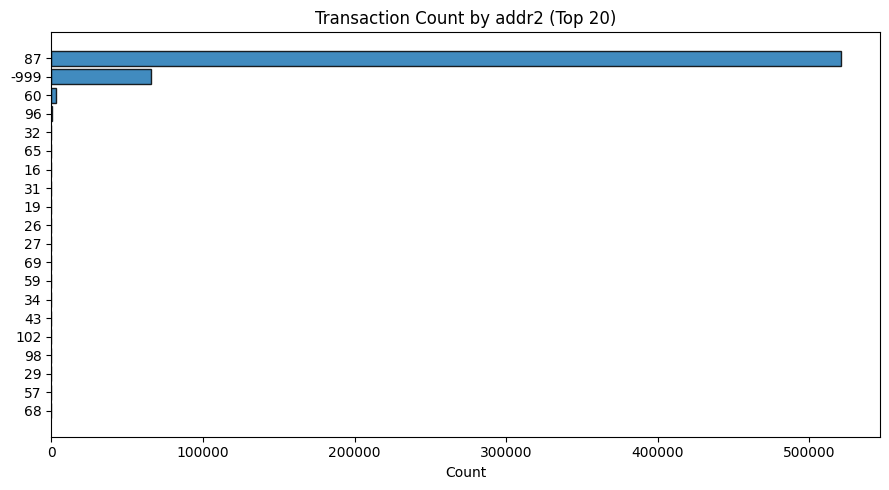

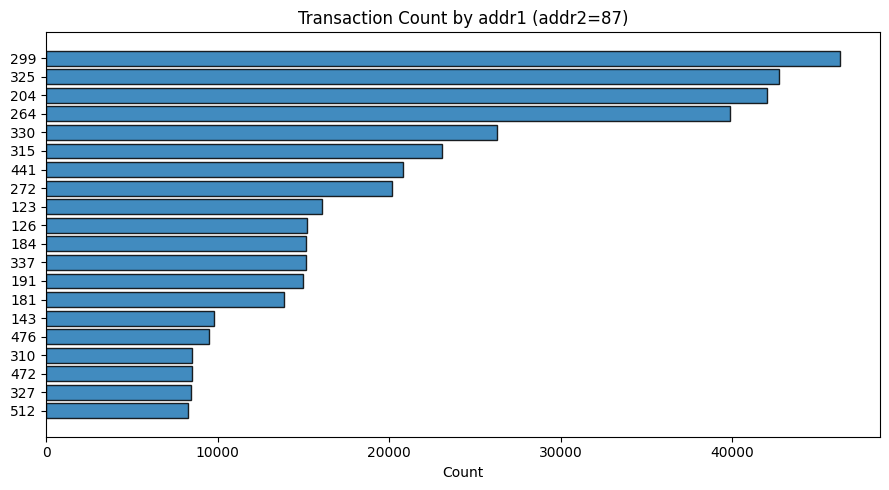

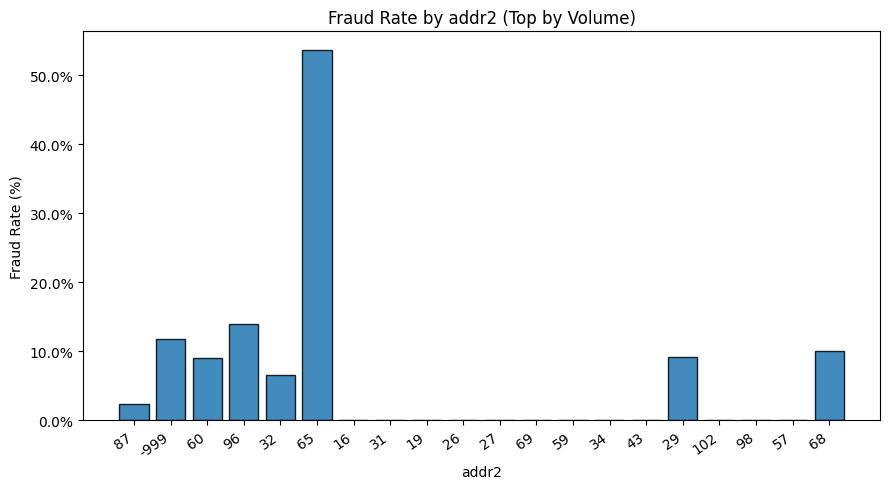

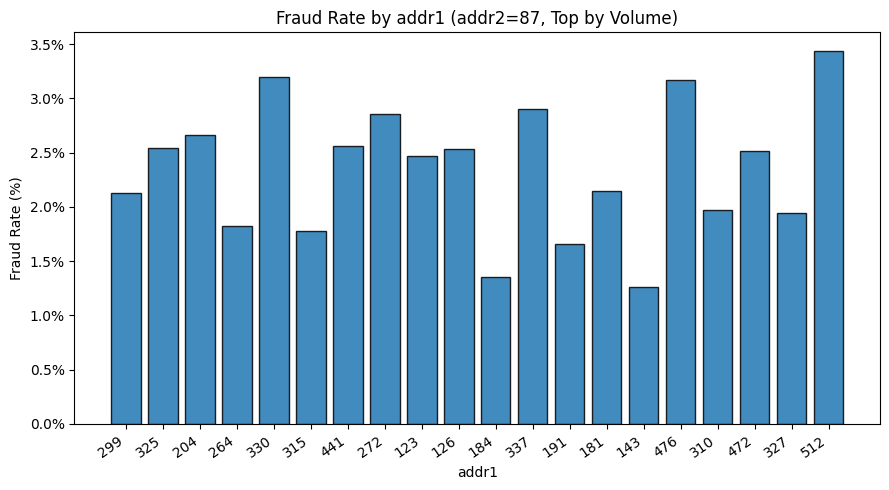

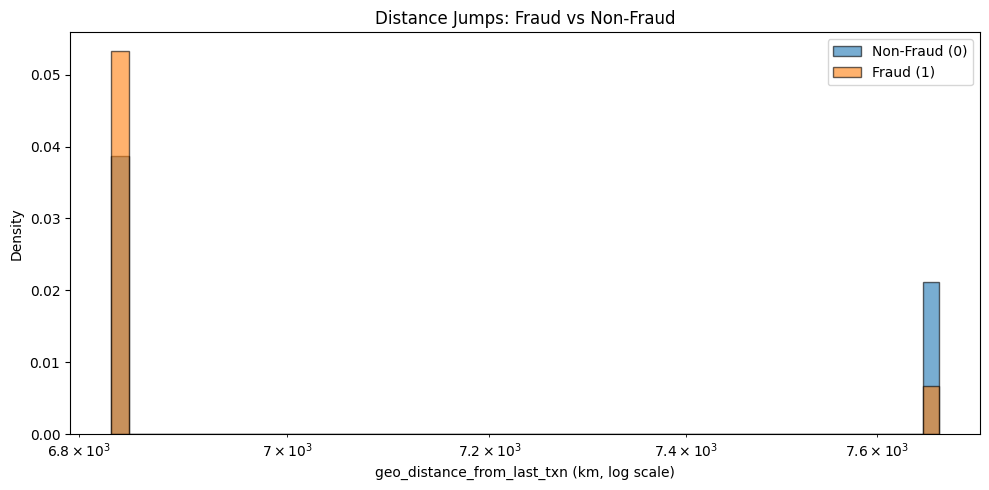


[Summary by isFraud]
              n  distance_mean  distance_median  distance_p90  location_changed_rate
isFraud                                                                             
0        569877       1.591226              0.0           0.0               0.475439
1         20663       5.028561              0.0           0.0               0.331414

[Country Risk Tier distribution by isFraud] (column-normalized)
isFraud                   0         1
country_risk_tier                    
high               0.107867  0.396167
low                0.000705  0.000000
medium             0.891427  0.603833

[Info] Saved features to train_with_geo_features.csv


0

In [51]:
# ============================================================
# Geolocation Risk Features + EDA — Colab CPU/RAM Safe
# ============================================================
import os, gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# ---------- Config (you can tweak) ----------
PLOT = True
HIST_MAX_SAMPLES = 50_000   # cap for histogram sampling
TOP_N = 20                  # for bar charts
ADDR_SENTINEL = -999        # for addr1/addr2 NaNs
CARD_SENTINEL = -1          # for card* NaNs
CSV_PATHS = [
    "train_transaction.csv",
    "./train_transaction.csv",
    "../input/ieee-fraud-detection/train_transaction.csv",
    "/kaggle/input/ieee-fraud-detection/train_transaction.csv",
]

USECOLS = [
    "TransactionDT", "isFraud",
    "addr1", "addr2",
    "card1","card2","card3","card4","card5","card6"
]
DTYPES = {
    "TransactionDT": "int32",
    "isFraud": "int8",
    "addr1": "float32", "addr2": "float32",
    "card1": "float32", "card2": "float32", "card3": "float32",
    "card4": "float32", "card5": "float32", "card6": "float32",
}

# ---------- Robust loader (no crash) ----------
def safe_load():
    # 1) Use in-memory DF if available
    for name in ["df", "train_fe", "merged_df"]:
        if name in globals() and isinstance(globals()[name], pd.DataFrame):
            df0 = globals()[name]
            miss = [c for c in USECOLS if c not in df0.columns]
            if not miss:
                print(f"[Info] Using in-memory DataFrame '{name}' shape={df0.shape}")
                return df0[USECOLS].copy()
            else:
                print(f"[Info] Found '{name}' but missing columns: {miss}")
    # 2) Try common CSV locations
    for p in CSV_PATHS:
        if os.path.exists(p):
            print(f"[Info] Loading file: {p}")
            return pd.read_csv(p, usecols=USECOLS, dtype=DTYPES, engine="c")
    print("[Exit] No data source found. Please upload train_transaction.csv or provide df/train_fe/merged_df.")
    return None

df = safe_load()
if df is None or df.empty:
    raise SystemExit  # graceful stop of this cell

print(f"[Info] Loaded shape: {df.shape}")

# ---------- Minimal NA handling & compact dtypes ----------
for col in ["addr1", "addr2"]:
    df[col] = pd.to_numeric(df[col], errors="coerce").fillna(ADDR_SENTINEL).astype("int32")

for c in ["card1","card2","card3","card4","card5","card6"]:
    df[c] = pd.to_numeric(df[c], errors="coerce").fillna(CARD_SENTINEL).astype("int32")

# ---------- Compact card_id (no strings) ----------
# 64-bit deterministic hash (far smaller than string joins)
card_mat = df[["card1","card2","card3","card4","card5","card6"]]
card_hash = pd.util.hash_pandas_object(card_mat, index=False).astype("uint64")
df["card_id"] = card_hash

# ---------- Sort for prior-only computations ----------
df.sort_values(["card_id", "TransactionDT"], inplace=True, kind="mergesort")
df.reset_index(drop=True, inplace=True)

# ---------- country_risk_tier from addr2 fraud rate ----------
fraud_rate_by_addr2 = df.groupby("addr2", observed=True)["isFraud"].mean().astype("float32")

def tier_from_rate(x: float) -> str:
    return "low" if x < 0.01 else ("medium" if x <= 0.05 else "high")

tier_map = {int(k): tier_from_rate(float(v)) for k, v in fraud_rate_by_addr2.items()}
df["country_risk_tier"] = df["addr2"].map(tier_map).astype("category")

# ---------- geo_distance_from_last_txn via addr2 centroids ----------
# only a few mapped; others remain NaN (safer than fake (0,0))
addr2_centroids = {
    87:  (37.0902,  -95.7129),  # US
    60:  (46.2276,    2.2137),  # France
    96:  (55.3781,   -3.4360),  # UK
    102: (36.2048,  138.2529),  # Japan
    68:  (56.1304, -106.3468),  # Canada
}
_lat = {k: v[0] for k, v in addr2_centroids.items()}
_lon = {k: v[1] for k, v in addr2_centroids.items()}

prev_addr2 = df.groupby("card_id", observed=True)["addr2"].shift(1).astype("float32")
df["_lat_now"]  = df["addr2"].map(_lat).astype("float32")
df["_lon_now"]  = df["addr2"].map(_lon).astype("float32")
df["_lat_prev"] = prev_addr2.map(_lat).astype("float32")
df["_lon_prev"] = prev_addr2.map(_lon).astype("float32")
del prev_addr2; gc.collect()

def haversine_vec(lat1, lon1, lat2, lon2):
    R = 6371.0088
    lat1 = np.radians(lat1); lon1 = np.radians(lon1)
    lat2 = np.radians(lat2); lon2 = np.radians(lon2)
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    return 2.0 * R * np.arcsin(np.sqrt(a))

mask = (~df["_lat_now"].isna()) & (~df["_lat_prev"].isna())
dist = np.full(len(df), np.nan, dtype="float32")
if mask.any():
    d = haversine_vec(
        df.loc[mask, "_lat_prev"].astype("float64").values,
        df.loc[mask, "_lon_prev"].astype("float64").values,
        df.loc[mask, "_lat_now"].astype("float64").values,
        df.loc[mask, "_lon_now"].astype("float64").values,
    ).astype("float32")
    dist[mask.values] = d
same = (df["addr2"] == df.groupby("card_id", observed=True)["addr2"].shift(1).fillna(ADDR_SENTINEL).astype("int32")) & mask
dist[same.values] = 0.0
df["geo_distance_from_last_txn"] = dist

# drop temp cols ASAP
df.drop(columns=["_lat_now","_lon_now","_lat_prev","_lon_prev"], inplace=True, errors="ignore")
gc.collect()

# ---------- location_changed (addr1/addr2 vs previous) ----------
prev_a1 = df.groupby("card_id", observed=True)["addr1"].shift(1).fillna(ADDR_SENTINEL).astype("int32")
prev_a2 = df.groupby("card_id", observed=True)["addr2"].shift(1).fillna(ADDR_SENTINEL).astype("int32")
first = (df.groupby("card_id", observed=True).cumcount() == 0)
loc_changed = ((df["addr1"] != prev_a1) | (df["addr2"] != prev_a2)).astype("int8")
loc_changed[first] = 0
df["location_changed"] = loc_changed
del prev_a1, prev_a2, first, loc_changed
gc.collect()

# ========================
# ========  EDA  =========
# ========================
if PLOT:
    def _barh(series, title, xlabel, topn=TOP_N):
        if series.empty:
            print(f"[Info] Skip plot: {title} (empty)")
            return
        s = series.head(topn)[::-1]
        plt.figure(figsize=(9,5))
        plt.barh(s.index.astype(str), s.values, alpha=0.85, edgecolor="black")
        plt.title(title); plt.xlabel(xlabel); plt.ylabel("")
        plt.tight_layout(); plt.show()

    # A) Counts by addr2
    _barh(df["addr2"].value_counts(), "Transaction Count by addr2 (Top 20)", "Count")

    # B) Counts by addr1 within addr2=87
    mask_us = df["addr2"] == 87
    if mask_us.any():
        _barh(df.loc[mask_us, "addr1"].value_counts(), "Transaction Count by addr1 (addr2=87)", "Count")
    else:
        print("[Info] No rows with addr2=87; skipping.")

    # C) Fraud rate by addr2 (Top 20 by volume)
    grp = df.groupby("addr2", observed=True).agg(n=("isFraud","size"), fr=("isFraud","mean"))
    if not grp.empty:
        top_addr2 = grp.sort_values("n", ascending=False).head(TOP_N)
        plt.figure(figsize=(9,5))
        plt.bar(top_addr2.index.astype(str), top_addr2["fr"].values, alpha=0.85, edgecolor="black")
        plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0, decimals=1))
        plt.title("Fraud Rate by addr2 (Top by Volume)")
        plt.xlabel("addr2"); plt.ylabel("Fraud Rate (%)")
        plt.xticks(rotation=35, ha="right")
        plt.tight_layout(); plt.show()

    # D) Fraud rate by addr1 within addr2=87
    if mask_us.any():
        grp_us = df.loc[mask_us].groupby("addr1", observed=True).agg(n=("isFraud","size"), fr=("isFraud","mean"))
        if not grp_us.empty:
            top_addr1_us = grp_us.sort_values("n", ascending=False).head(TOP_N)
            plt.figure(figsize=(9,5))
            plt.bar(top_addr1_us.index.astype(str), top_addr1_us["fr"].values, alpha=0.85, edgecolor="black")
            plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0, decimals=1))
            plt.title("Fraud Rate by addr1 (addr2=87, Top by Volume)")
            plt.xlabel("addr1"); plt.ylabel("Fraud Rate (%)")
            plt.xticks(rotation=35, ha="right")
            plt.tight_layout(); plt.show()

    # E) Histogram of distance jumps (fraud vs non-fraud)
    dvals = pd.to_numeric(df["geo_distance_from_last_txn"], errors="coerce")
    x0 = dvals[df["isFraud"] == 0].dropna()
    x1 = dvals[df["isFraud"] == 1].dropna()
    if len(x0) > HIST_MAX_SAMPLES: x0 = x0.sample(HIST_MAX_SAMPLES, random_state=42)
    if len(x1) > HIST_MAX_SAMPLES: x1 = x1.sample(HIST_MAX_SAMPLES, random_state=42)
    if (len(x0) + len(x1)) > 0:
        plt.figure(figsize=(10,5))
        if len(x0) > 0: plt.hist(x0[x0 > 0], bins=50, density=True, alpha=0.6, label="Non-Fraud (0)", edgecolor="black")
        if len(x1) > 0: plt.hist(x1[x1 > 0], bins=50, density=True, alpha=0.6, label="Fraud (1)", edgecolor="black")
        plt.xscale("log")
        plt.xlabel("geo_distance_from_last_txn (km, log scale)")
        plt.ylabel("Density")
        plt.title("Distance Jumps: Fraud vs Non-Fraud")
        plt.legend(); plt.tight_layout(); plt.show()
    del x0, x1, dvals
    gc.collect()

# ---------- Summaries (lightweight) ----------
summary = df.groupby("isFraud", observed=True).agg(
    n=("isFraud","size"),
    distance_mean=("geo_distance_from_last_txn","mean"),
    distance_median=("geo_distance_from_last_txn","median"),
    distance_p90=("geo_distance_from_last_txn", lambda s: s.dropna().quantile(0.90) if s.notna().any() else np.nan),
    location_changed_rate=("location_changed","mean"),
)
print("\n[Summary by isFraud]")
print(summary)

ct = pd.crosstab(df["country_risk_tier"], df["isFraud"], normalize="columns").sort_index()
print("\n[Country Risk Tier distribution by isFraud] (column-normalized)")
print(ct)

# ---------- Save features (compact) ----------
out_cols = [c for c in (USECOLS + ["card_id", "country_risk_tier", "geo_distance_from_last_txn", "location_changed"]) if c in df.columns]
df[out_cols].to_csv("train_with_geo_features.csv", index=False)
print("\n[Info] Saved features to train_with_geo_features.csv")

# Final GC
gc.collect()


/tmp/ipython-input-3881176045.py:77: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):


[Info] Working rows: 590,540


/tmp/ipython-input-3881176045.py:77: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):
/tmp/ipython-input-3881176045.py:77: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):
/tmp/ipython-input-3881176045.py:77: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):
/tmp/ipython-input-3881176045.py:77: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(s):
/tmp/ipython-input-3881176045.py:94: FutureWarning: The default of observed=False is depreca

[Info] Suspicious subset rows: 590,540
[Info] Candidate edges after cap: 8,000
[Info] Communities skipped (graph too large).

[Head] Graph features (sample):


card1  isFraud  card_degree_devices  card_degree_ips  card_degree_merchants  device_degree_cards  merchant_degree_cards  card_pagerank  device_pagerank  merchant_pagerank
0  13926        0                    5             <NA>                      6                10564                   9841       0.000077              NaN                NaN
1   2755        0                   14             <NA>                      8                10564                   9841       0.000228              NaN                NaN
2   4663        0                    6             <NA>                      4                10564                   9841            NaN              NaN                NaN
3  18132        0                   35             <NA>                     16                10564                   9841       0.001044              NaN                NaN
4   4497        0                    5             <NA>                      2                    7                   9841            NaN              NaN                NaN
5   5937        0                    1             <NA>                      1                10564                   9841            NaN              NaN                NaN
6  12308        0                    3             <NA>                      2                10564                   9841            NaN              NaN                NaN
7  12695        0                   43             <NA>                     16                10564                   9841       0.001813              NaN                NaN
8   2803        0                   60             <NA>                     21                 3104                   9841       0.002301         0.038211                NaN
9  17399        0                   15             <NA>                     15                10564                   9841       0.000318              NaN                NaN

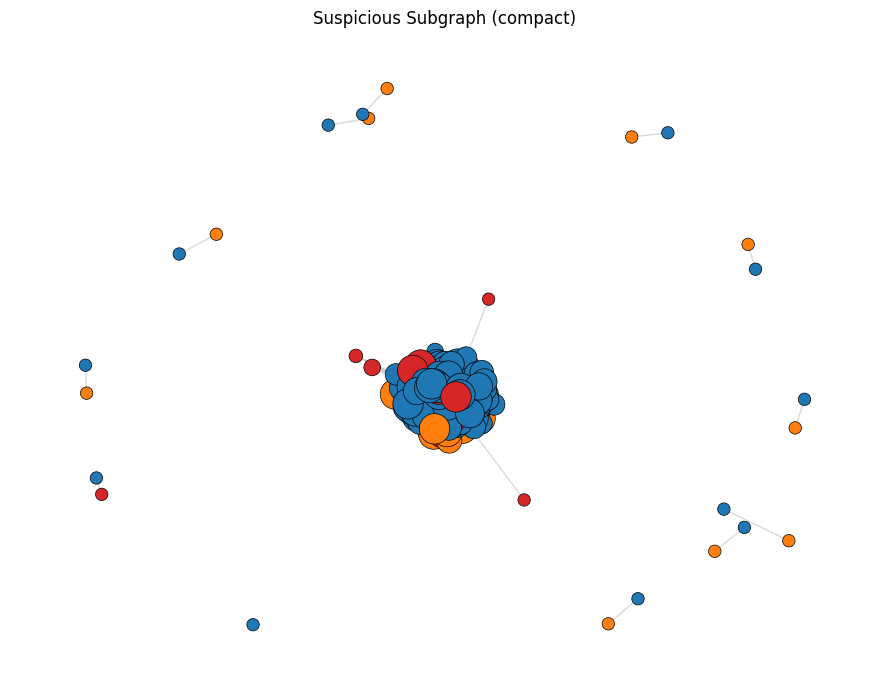

In [52]:
# ============================================
# Graph Features (Fraud Rings) — CPU-Optimized + Auto-Relax
# ============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import gc

# Try to import networkx; skip graph parts if unavailable
try:
    import networkx as nx
    NX_OK = True
except Exception:
    print("⚠️ networkx not available; graph metrics/plots will be skipped.")
    NX_OK = False

# -----------------------------
# Faster defaults (tune here)
# -----------------------------
CFG = dict(
    keep_cols=[
        "DT","TransactionDT","isFraud",
        "uid","card1","account_id",
        "DeviceInfo","DeviceID","device_id","DeviceType","device_type",
        "_subnet","ip","IPaddress","ip_addr",
        "merchant","MerchantID","merchant_category","R_emaildomain","P_emaildomain_provider"
    ],

    # initial suspicion thresholds (will auto-relax if needed)
    min_cards_per_ip=8,
    min_cards_per_device=8,
    min_cards_per_merchant=8,
    shortlist_top_per_type=2000,      # shortlist for fraud-share overlay
    min_fraud_share_noncard=0.12,

    # graph size caps
    max_ips=1500,
    max_devices=1500,
    max_merchants=1500,
    max_cards=2500,
    max_edges=8000,

    # PageRank / Communities controls
    pagerank_alpha=0.85,
    pagerank_maxiter=50,
    pagerank_tol=1e-5,
    run_communities_if_nodes_le=1200,   # skip communities if graph bigger than this

    plot_max_nodes=250,
    plot_seed=42,

    # Runtime verbosity
    verbose=True,

    # Plotting (ON so you see a graph)
    do_plot=True,

    # Auto-relax passes to find a small graph if initial filters are too strict
    relax_passes=3,                 # number of relax attempts
    relax_factor=0.5,               # halve min thresholds per pass
    relax_top_multiplier=1.5,       # increase shortlist size per pass
)

# -----------------------------
# Helpers
# -----------------------------
def _free():
    gc.collect()

def _trim(df, keep_cols):
    cols = [c for c in keep_cols if c in df.columns]
    return df[cols].copy()

def _as_cat(s):
    # string → categorical (fast groupby + low RAM)
    if pd.api.types.is_categorical_dtype(s):
        return s
    return s.astype("string").fillna("unknown").astype("category")

def _choose(df, candidates, fallback=None):
    for c in candidates:
        if c in df.columns:
            return c
    return fallback

def _unique_count(df, by, on_unique):
    t = df[[by, on_unique]].copy()
    t[by] = _as_cat(t[by]); t[on_unique] = _as_cat(t[on_unique])
    return t.groupby(by, observed=True)[on_unique].nunique()

def _fraud_share(df, key, y):
    tkey = _as_cat(df[key])
    return y.groupby(tkey).mean()

def _edge_weights(df, left, right):
    sub = df[[left, right]].copy()
    sub[left]  = _as_cat(sub[left])
    sub[right] = _as_cat(sub[right])
    sub = sub[(sub[left] != "unknown") & (sub[right] != "unknown")]
    if sub.empty:
        return pd.DataFrame(columns=[left, right, "w"])
    g = sub.groupby([left, right], observed=True).size().rename("w").reset_index()
    return g

def _minimal_print(msg, cfg):
    if cfg.get("verbose", False):
        print(msg)

# ------------------------------------------------
# Main: fast graph features + auto-relax
# ------------------------------------------------
def graph_features_fast_cpu(
    df: pd.DataFrame,
    card_cands=("uid","card1","account_id"),
    device_cands=("DeviceInfo","DeviceID","device_id"),
    ip_cands=("_subnet","ip","IPaddress","ip_addr"),
    merch_cands=("merchant","MerchantID","merchant_category","R_emaildomain","P_emaildomain_provider"),
    fraud_col="isFraud",
    cfg=CFG
):
    # 0) Trim and prep
    df = _trim(df, cfg["keep_cols"])
    card = _choose(df, card_cands)
    if card is None:
        raise RuntimeError("No card/account column found (uid/card1/account_id).")
    dev  = _choose(df, device_cands)
    ip   = _choose(df, ip_cands)
    mer  = _choose(df, merch_cands)

    # Cast targets for fast groupby
    df[card] = _as_cat(df[card])
    if dev: df[dev] = _as_cat(df[dev])
    if ip:  df[ip]  = _as_cat(df[ip])
    if mer: df[mer] = _as_cat(df[mer])

    y = pd.to_numeric(df.get(fraud_col, 0), errors="coerce").fillna(0).astype(np.int8)
    _minimal_print(f"[Info] Working rows: {len(df):,}", cfg)

    # -------- 1) Simple degrees (no graph) --------
    features = {}
    if dev:
        features["device_degree_cards"] = _unique_count(df, by=dev, on_unique=card).rename("device_degree_cards")
    if ip:
        features["ip_degree_cards"]     = _unique_count(df, by=ip,  on_unique=card).rename("ip_degree_cards")
    if mer:
        features["merchant_degree_cards"]= _unique_count(df, by=mer, on_unique=card).rename("merchant_degree_cards")

    if dev:
        features["card_degree_devices"]  = _unique_count(df, by=card, on_unique=dev).rename("card_degree_devices")
    if ip:
        features["card_degree_ips"]      = _unique_count(df, by=card, on_unique=ip).rename("card_degree_ips")
    if mer:
        features["card_degree_merchants"]= _unique_count(df, by=card, on_unique=mer).rename("card_degree_merchants")

    # -------- 2) Suspicious node shortlist with auto-relax --------
    def shortlist_and_edges(min_ip, min_dev, min_mer, shortlist_n, min_fr):
        susp_ips = susp_devs = susp_mers = pd.Index([])
        if ip:
            ip_deg = features["ip_degree_cards"].rename("uniq").sort_values(ascending=False)
            ip_short = ip_deg.head(int(shortlist_n))
            ip_fr  = _fraud_share(df[df[ip].isin(ip_short.index)], key=ip, y=y)
            ip_tbl = pd.concat([ip_deg, ip_fr.rename("fr")], axis=1).fillna(0.0)
            susp_ips = ip_tbl[(ip_tbl["uniq"] >= min_ip) | (ip_tbl["fr"] >= min_fr)].index[:cfg["max_ips"]]
        if dev:
            dv_deg = features["device_degree_cards"].rename("uniq").sort_values(ascending=False)
            dv_short = dv_deg.head(int(shortlist_n))
            dv_fr  = _fraud_share(df[df[dev].isin(dv_short.index)], key=dev, y=y)
            dv_tbl = pd.concat([dv_deg, dv_fr.rename("fr")], axis=1).fillna(0.0)
            susp_devs = dv_tbl[(dv_tbl["uniq"] >= min_dev) | (dv_tbl["fr"] >= min_fr)].index[:cfg["max_devices"]]
        if mer:
            me_deg = features["merchant_degree_cards"].rename("uniq").sort_values(ascending=False)
            me_short = me_deg.head(int(shortlist_n))
            me_fr  = _fraud_share(df[df[mer].isin(me_short.index)], key=mer, y=y)
            me_tbl = pd.concat([me_deg, me_fr.rename("fr")], axis=1).fillna(0.0)
            susp_mers = me_tbl[(me_tbl["uniq"] >= min_mer) | (me_tbl["fr"] >= min_fr)].index[:cfg["max_merchants"]]

        # Pull cards connected to suspicious non-card nodes
        mask = pd.Series(False, index=df.index)
        if ip:  mask |= df[ip].isin(susp_ips)
        if dev: mask |= df[dev].isin(susp_devs)
        if mer: mask |= df[mer].isin(susp_mers)
        susp_cards = df.loc[mask, card].value_counts().index[:cfg["max_cards"]]

        # Subset rows for edge construction
        mask |= df[card].isin(susp_cards)
        df_s = df.loc[mask].copy()

        # Build edge tables (bounded)
        edges_tbls = []
        if dev:
            e_cd = _edge_weights(df_s, card, dev)
            edges_tbls.append(("card", card, "device", dev, e_cd))
        if ip:
            e_ci = _edge_weights(df_s, card, ip)
            edges_tbls.append(("card", card, "ip", ip, e_ci))
        if mer:
            e_cm = _edge_weights(df_s, card, mer)
            edges_tbls.append(("card", card, "merchant", mer, e_cm))

        combined = []
        for (tL, L, tR, R, tbl) in edges_tbls:
            if not tbl.empty:
                tbl = tbl.sort_values("w", ascending=False)
                tbl["__Ltype__"] = tL; tbl["__Rtype__"] = tR
                tbl["__Lcol__"]  = L;  tbl["__Rcol__"]  = R
                combined.append(tbl)
        if combined:
            E = pd.concat(combined, ignore_index=True)
            E = E.nlargest(cfg["max_edges"], "w")
        else:
            E = pd.DataFrame(columns=["w","__Ltype__","__Rtype__","__Lcol__","__Rcol__"])
        return df_s, E

    # Try initial thresholds; if empty, relax up to N passes
    min_ip = cfg["min_cards_per_ip"]
    min_dev = cfg["min_cards_per_device"]
    min_mer = cfg["min_cards_per_merchant"]
    shortlist_n = cfg["shortlist_top_per_type"]
    min_fr = cfg["min_fraud_share_noncard"]

    df_s, E = shortlist_and_edges(min_ip, min_dev, min_mer, shortlist_n, min_fr)
    attempt = 0
    while (E is None or E.empty) and attempt < cfg["relax_passes"]:
        attempt += 1
        min_ip  = max(2, int(np.ceil(min_ip * cfg["relax_factor"])))
        min_dev = max(2, int(np.ceil(min_dev * cfg["relax_factor"])))
        min_mer = max(2, int(np.ceil(min_mer * cfg["relax_factor"])))
        shortlist_n = int(np.ceil(shortlist_n * cfg["relax_top_multiplier"]))
        min_fr = max(0.05, min_fr * 0.9)  # gently relax fraud-share
        _minimal_print(f"[Relax {attempt}] thresholds → ip:{min_ip} dev:{min_dev} mer:{min_mer}, shortlist:{shortlist_n}, min_fr:{min_fr:.3f}", cfg)
        df_s, E = shortlist_and_edges(min_ip, min_dev, min_mer, shortlist_n, min_fr)

    _minimal_print(f"[Info] Suspicious subset rows: {len(df_s):,}", cfg)
    if E is not None:
        _minimal_print(f"[Info] Candidate edges after cap: {len(E):,}", cfg)

    # If still nothing or NX missing → return only simple degrees
    if (E is None or E.empty) or (not NX_OK):
        out = df.copy()
        if dev: out["device_degree_cards"] = out[dev].map(features["device_degree_cards"]).astype("Int32")
        if ip:  out["ip_degree_cards"]     = out[ip].map(features["ip_degree_cards"]).astype("Int32")
        if mer: out["merchant_degree_cards"]= out[mer].map(features["merchant_degree_cards"]).astype("Int32")
        out["card_degree_devices"]  = out[card].map(features.get("card_degree_devices")).astype("Int32") if dev else pd.Series(pd.NA, index=out.index, dtype="Int32")
        out["card_degree_ips"]      = out[card].map(features.get("card_degree_ips")).astype("Int32") if ip  else pd.Series(pd.NA, index=out.index, dtype="Int32")
        out["card_degree_merchants"]= out[card].map(features.get("card_degree_merchants")).astype("Int32") if mer else pd.Series(pd.NA, index=out.index, dtype="Int32")
        return out, None, dict(card=card, device=dev, ip=ip, merchant=mer)

    # -------- 3) Build compact graph quickly --------
    G = nx.Graph()
    node_types = {}
    edgelist = []

    for (tL, L, tR, R), block in E.groupby(["__Ltype__","__Lcol__","__Rtype__","__Rcol__"], sort=False):
        left_nodes  = (tL + ":" + block[L].astype(str))
        right_nodes = (tR + ":" + block[R].astype(str))
        edgelist.extend(zip(left_nodes.values.tolist(),
                            right_nodes.values.tolist(),
                            block["w"].astype(int).values.tolist()))
        node_types.update({n: {"type": tL} for n in left_nodes.unique()})
        node_types.update({n: {"type": tR} for n in right_nodes.unique()})

    G.add_nodes_from([(n, attrs) for n, attrs in node_types.items()])
    G.add_weighted_edges_from(edgelist)

    # -------- 4) Fast metrics (skip heavy ones on big graphs) --------
    # degree
    deg_map = dict(G.degree())
    nx.set_node_attributes(G, deg_map, "node_degree")

    # PageRank (limited iters / looser tol)
    pr_map = {}
    try:
        pr_map = nx.pagerank(
            G,
            alpha=cfg["pagerank_alpha"],
            max_iter=cfg["pagerank_maxiter"],
            tol=cfg["pagerank_tol"],
            weight="weight",
        )
        nx.set_node_attributes(G, pr_map, "pagerank_score")
    except Exception as e:
        _minimal_print(f"⚠️ PageRank skipped: {e}", cfg)

    # Communities only if small enough
    comm_map = {}
    try:
        if G.number_of_nodes() <= cfg["run_communities_if_nodes_le"]:
            from networkx.algorithms.community import greedy_modularity_communities
            comms = list(greedy_modularity_communities(G, weight="weight"))
            for cid, nodes in enumerate(comms):
                for n in nodes:
                    comm_map[n] = cid
            nx.set_node_attributes(G, comm_map, "community_id")
        else:
            _minimal_print("[Info] Communities skipped (graph too large).", cfg)
    except Exception as e:
        _minimal_print(f"⚠️ Communities skipped: {e}", cfg)

    # -------- 5) Map metrics back (dict-based, fast) --------
    def _split_type(node):
        pos = node.find(":")
        return (node[:pos], node[pos+1:])

    pr_card, pr_dev, pr_ip, pr_mer = {}, {}, {}, {}
    comm_card, comm_dev, comm_ip, comm_mer = {}, {}, {}, {}

    if pr_map:
        for n, v in pr_map.items():
            t, raw = _split_type(n)
            if t == "card":     pr_card[raw] = v
            elif t == "device": pr_dev[raw]  = v
            elif t == "ip":     pr_ip[raw]   = v
            elif t == "merchant": pr_mer[raw] = v

    if comm_map:
        for n, v in comm_map.items():
            t, raw = _split_type(n)
            if t == "card":     comm_card[raw] = v
            elif t == "device": comm_dev[raw]  = v
            elif t == "ip":     comm_ip[raw]   = v
            elif t == "merchant": comm_mer[raw] = v

    out = df.copy()
    if dev: out["device_degree_cards"]  = out[dev].map(features["device_degree_cards"]).astype("Int32")
    if ip:  out["ip_degree_cards"]      = out[ip].map(features["ip_degree_cards"]).astype("Int32")
    if mer: out["merchant_degree_cards"]= out[mer].map(features["merchant_degree_cards"]).astype("Int32")

    out["card_degree_devices"]  = out[card].map(features.get("card_degree_devices")).astype("Int32") if dev else pd.Series(pd.NA, index=out.index, dtype="Int32")
    out["card_degree_ips"]      = out[card].map(features.get("card_degree_ips")).astype("Int32") if ip  else pd.Series(pd.NA, index=out.index, dtype="Int32")
    out["card_degree_merchants"]= out[card].map(features.get("card_degree_merchants")).astype("Int32") if mer else pd.Series(pd.NA, index=out.index, dtype="Int32")

    if pr_map:
        out["card_pagerank"]      = out[card].astype(str).map(pr_card).astype("float32")
        if dev: out["device_pagerank"]  = out[dev].astype(str).map(pr_dev).astype("float32")
        if ip:  out["ip_pagerank"]      = out[ip].astype(str).map(pr_ip).astype("float32")
        if mer: out["merchant_pagerank"]= out[mer].astype(str).map(pr_mer).astype("float32")
    if comm_map:
        out["card_comm_id"]       = out[card].astype(str).map(comm_card).astype("Int32")
        if dev: out["device_comm_id"] = out[dev].astype(str).map(comm_dev).astype("Int32")
        if ip:  out["ip_comm_id"]     = out[ip].astype(str).map(comm_ip).astype("Int32")
        if mer: out["merchant_comm_id"]= out[mer].astype(str).map(comm_mer).astype("Int32")

    _free()
    return out, G, dict(card=card, device=dev, ip=ip, merchant=mer)

# ------------------------------------------------
# Optional plotting (ON by default)
# ------------------------------------------------
def plot_suspicious_subgraph(G, max_nodes=CFG["plot_max_nodes"], seed=CFG["plot_seed"]):
    if (not NX_OK) or (G is None) or (G.number_of_nodes() == 0):
        print("⚠️ Nothing to plot.")
        return
    nodes = list(G.nodes())
    if len(nodes) > max_nodes:
        pr = nx.get_node_attributes(G, "pagerank_score")
        if pr:
            nodes = sorted(nodes, key=lambda n: pr.get(n, 0.0), reverse=True)[:max_nodes]
        else:
            deg = dict(G.degree())
            nodes = sorted(nodes, key=lambda n: deg.get(n, 0), reverse=True)[:max_nodes]
    H = G.subgraph(nodes).copy()
    pos = nx.spring_layout(H, seed=seed, k=0.25, iterations=40)  # fewer iters (faster)

    types = nx.get_node_attributes(H, "type")
    deg   = dict(H.degree())

    cmap = {"card":"#1f77b4","device":"#ff7f0e","ip":"#2ca02c","merchant":"#d62728"}
    node_colors = [cmap.get(types.get(n,"card"), "#7f7f7f") for n in H.nodes()]
    sizes = [max(80, min(480, 48 * (deg.get(n,1)))) for n in H.nodes()]

    plt.figure(figsize=(9, 7))
    nx.draw_networkx_edges(H, pos, alpha=0.15)
    nx.draw_networkx_nodes(H, pos, node_color=node_colors, node_size=sizes, linewidths=0.5, edgecolors="black")
    if H.number_of_nodes() <= 120:
        labels = {n: n.split(":",1)[1][:18] for n in H.nodes()}
        nx.draw_networkx_labels(H, pos, labels=labels, font_size=8)
    plt.title("Suspicious Subgraph (compact)")
    plt.axis("off")
    plt.tight_layout(); plt.show()

# =========================
# Example usage
# =========================
# Pick a DataFrame already in memory:
_df = (globals().get("train_fe") if isinstance(globals().get("train_fe"), pd.DataFrame) else
       globals().get("merged_df") if isinstance(globals().get("merged_df"), pd.DataFrame) else None)

if _df is None:
    print("❌ Define train_fe or merged_df first.")
else:
    df_graph, G_graph, meta = graph_features_fast_cpu(
        _df,
        card_cands=("uid","card1","account_id"),
        device_cands=("DeviceInfo","DeviceID","device_id"),
        ip_cands=("_subnet","ip","IPaddress","ip_addr"),
        merch_cands=("merchant","MerchantID","merchant_category","R_emaildomain","P_emaildomain_provider"),
        fraud_col="isFraud",
        cfg=CFG
    )

    cols_preview = [
        meta.get("card"), "isFraud",
        "card_degree_devices","card_degree_ips","card_degree_merchants",
        "device_degree_cards","ip_degree_cards","merchant_degree_cards",
        "card_pagerank","device_pagerank","ip_pagerank","merchant_pagerank",
        "card_comm_id","device_comm_id","ip_comm_id","merchant_comm_id"
    ]
    cols_preview = [c for c in cols_preview if c in df_graph.columns]
    print("\n[Head] Graph features (sample):")
    display(df_graph[cols_preview].head(10))

    if CFG["do_plot"]:
        plot_suspicious_subgraph(G_graph, max_nodes=CFG["plot_max_nodes"])


In [53]:
# ============================================
# IEEE-CIS Fraud: PCA (Incremental) + Autoencoder (Nonlinear)
# RAM-safe, chunked, Colab-friendly
# ============================================

# ------- Colab/Env Setup -------
from google.colab import drive
drive.mount('/content/drive', force_remount=True) # Added force_remount=True
#!rm -rf /content/drive
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)


import os, gc, math, json, warnings
warnings.filterwarnings("ignore")

BASE_PATH = "/content/drive/MyDrive"      # <- change if needed
TXN_CSV   = os.path.join(BASE_PATH, "train_transaction.csv")
ID_CSV    = os.path.join(BASE_PATH, "train_identity.csv")
OUT_DIR   = os.path.join(BASE_PATH, "ieee_dimred_outputs")
os.makedirs(OUT_DIR, exist_ok=True)

# ------- Config knobs (adjust safely) -------
CHUNKSIZE = 100_000              # stream rows in manageable chunks
SAMPLE_ROWS_FOR_MEDIANS = 200_000  # bounded sample to compute medians
N_PCA_COMPONENTS = 128           # linear embedding size
AE_LATENT_DIM = 128              # nonlinear embedding size
AE_HIDDEN = [512, 256]           # autoencoder widths (compact)
AE_EPOCHS = 5                    # few epochs to stay fast & RAM-safe
BATCH_SIZE = 2048                # AE minibatch
LEARNING_RATE = 1e-3             # AE optimizer

# ============================================
# 1) Discover numeric columns (small peek)
# ============================================
import pandas as pd
import numpy as np

def discover_numeric_cols(csv_path, nrows=5000):
    sample = pd.read_csv(csv_path, nrows=nrows, low_memory=False)
    num_cols = sample.select_dtypes(include=[np.number]).columns.tolist()
    return num_cols

txn_num_cols = discover_numeric_cols(TXN_CSV)
id_num_cols  = discover_numeric_cols(ID_CSV)

# Keep essentials explicitly if missing in numeric probe
for col in ["TransactionID", "isFraud"]:
    if col not in txn_num_cols:
        txn_num_cols = (["TransactionID","isFraud"] +
                        [c for c in txn_num_cols if c not in ["TransactionID","isFraud"]])

# Ensure join key present for identity
if "TransactionID" not in id_num_cols:
    id_num_cols = ["TransactionID"] + id_num_cols

print(f"Discovered numeric cols: txn={len(txn_num_cols)}, id={len(id_num_cols)}")

# ============================================
# 2) Load *numeric* identity once (float32)
#    (590k x ~few-dozens = OK in Colab RAM)
# ============================================
id_df = pd.read_csv(ID_CSV, usecols=id_num_cols)
for c in id_df.columns:
    if c != "TransactionID":
        id_df[c] = pd.to_numeric(id_df[c], errors="coerce").astype("float32")
id_df["TransactionID"] = pd.to_numeric(id_df["TransactionID"], errors="coerce").astype("int64")
id_df.set_index("TransactionID", inplace=True)

print("Identity numeric frame loaded:", id_df.shape)

# ============================================
# 3) Compute per-column medians on bounded sample
#    (we only need medians for imputation)
# ============================================
from collections import defaultdict

sampled = []
rows_collected = 0
for chunk in pd.read_csv(TXN_CSV, usecols=txn_num_cols, chunksize=CHUNKSIZE, low_memory=False):
    # numeric cast
    for c in chunk.columns:
        if c not in ["TransactionID", "isFraud"]:
            chunk[c] = pd.to_numeric(chunk[c], errors="coerce").astype("float32")
    if rows_collected < SAMPLE_ROWS_FOR_MEDIANS:
        need = SAMPLE_ROWS_FOR_MEDIANS - rows_collected
        sampled.append(chunk.iloc[:need])
        rows_collected += min(len(chunk), need)
    if rows_collected >= SAMPLE_ROWS_FOR_MEDIANS:
        break

sample_txn = pd.concat(sampled, axis=0, ignore_index=True)
# Merge numeric identity (only needed columns will be imputed the same way)
sample_txn = sample_txn.join(id_df, on="TransactionID", how="left")

# Compute medians column-wise (skip IDs/labels to avoid accidental replacement)
median_map = {}
for c in sample_txn.columns:
    if c in ["TransactionID", "isFraud"]:
        continue
    median_map[c] = float(np.nanmedian(sample_txn[c].values))

# Save medians for reuse
from joblib import dump, load
dump(median_map, os.path.join(OUT_DIR, "medians.joblib"))
del sample_txn, sampled
gc.collect()
print("Computed and saved medians for", len(median_map), "columns")

# ============================================
# 4) Fit StandardScaler incrementally on imputed data
# ============================================
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(copy=False)

def impute_inplace(df, med):
    # Fill in place to avoid RAM spikes
    for c in df.columns:
        if c in ["TransactionID", "isFraud"]:
            continue
        df[c] = df[c].fillna(med.get(c, 0.0))
    return df

# First pass: partial_fit scaler
for chunk in pd.read_csv(TXN_CSV, usecols=txn_num_cols, chunksize=CHUNKSIZE, low_memory=False):
    for c in chunk.columns:
        if c not in ["TransactionID", "isFraud"]:
            chunk[c] = pd.to_numeric(chunk[c], errors="coerce").astype("float32")
    chunk = chunk.join(id_df, on="TransactionID", how="left")
    chunk = impute_inplace(chunk, median_map)

    # keep feature-only view
    feat = chunk.drop(columns=["TransactionID", "isFraud"], errors="ignore")
    scaler.partial_fit(feat.values)
    del feat, chunk
    gc.collect()

dump(scaler, os.path.join(OUT_DIR, "scaler.joblib"))
print("Scaler fitted & saved")

Mounted at /content/drive
Discovered numeric cols: txn=380, id=24
Identity numeric frame loaded: (144233, 23)
Computed and saved medians for 401 columns
Scaler fitted & saved


In [54]:
# ============================================
# 5) Incremental PCA (linear)
# ============================================
from sklearn.decomposition import IncrementalPCA
import pyarrow as pa, pyarrow.parquet as pq

ipca = IncrementalPCA(n_components=N_PCA_COMPONENTS, copy=False)

# 5a) partial_fit IPCA
for chunk in pd.read_csv(TXN_CSV, usecols=txn_num_cols, chunksize=CHUNKSIZE, low_memory=False):
    for c in chunk.columns:
        if c not in ["TransactionID", "isFraud"]:
            chunk[c] = pd.to_numeric(chunk[c], errors="coerce").astype("float32")
    chunk = chunk.join(id_df, on="TransactionID", how="left")
    chunk = impute_inplace(chunk, median_map)

    feat = chunk.drop(columns=["TransactionID", "isFraud"], errors="ignore").values
    feat = scaler.transform(feat)  # zero mean, unit var
    ipca.partial_fit(feat)
    del feat, chunk
    gc.collect()

dump(ipca, os.path.join(OUT_DIR, "ipca.joblib"))
print("Incremental PCA fitted & saved")

# 5b) Transform stream -> write Parquet (pca_features.parquet)
pca_writer = None
pca_schema = None
pca_out_path = os.path.join(OUT_DIR, "pca_features.parquet")
if os.path.exists(pca_out_path): os.remove(pca_out_path)

total_rows = 0
for chunk in pd.read_csv(TXN_CSV, usecols=txn_num_cols, chunksize=CHUNKSIZE, low_memory=False):
    for c in chunk.columns:
        if c not in ["TransactionID", "isFraud"]:
            chunk[c] = pd.to_numeric(chunk[c], errors="coerce").astype("float32")
    chunk = chunk.join(id_df, on="TransactionID", how="left")
    chunk = impute_inplace(chunk, median_map)

    ids = chunk["TransactionID"].astype("int64").values
    labels = chunk["isFraud"].astype("int8").values if "isFraud" in chunk.columns else np.zeros(len(chunk), dtype=np.int8)
    feat = chunk.drop(columns=["TransactionID", "isFraud"], errors="ignore").values
    feat = scaler.transform(feat)
    Z = ipca.transform(feat).astype("float32")

    cols = [f"PCA_{i+1}" for i in range(Z.shape[1])]
    out_df = pd.DataFrame(Z, columns=cols)
    out_df.insert(0, "isFraud", labels)
    out_df.insert(0, "TransactionID", ids)

    table = pa.Table.from_pandas(out_df, preserve_index=False)
    if pca_writer is None:
        pca_schema = table.schema
        pca_writer = pq.ParquetWriter(pca_out_path, pca_schema, compression="snappy")
    pca_writer.write_table(table)

    total_rows += len(out_df)
    del out_df, table, feat, Z, chunk
    gc.collect()

if pca_writer is not None:
    pca_writer.close()

print(f"PCA features written: {total_rows} rows -> {pca_out_path}")


Incremental PCA fitted & saved
PCA features written: 590540 rows -> /content/drive/MyDrive/ieee_dimred_outputs/pca_features.parquet


In [55]:
# ============================================
# 6) Autoencoder (nonlinear) — PyTorch
#    - minibatch training on full dataset (streamed)
#    - chunked inference to write embeddings
# ============================================
import torch
from torch import nn
from torch.utils.data import IterableDataset, DataLoader

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("AE will use device:", DEVICE)

# Re-detect input dimension (after join/impute/scale)
# Use a small probe chunk to get feature order and dim
probe_txn = next(pd.read_csv(TXN_CSV, chunksize=CHUNKSIZE, low_memory=False))
probe_id = pd.read_csv(ID_CSV, nrows=CHUNKSIZE, low_memory=False) # Read identity chunk
probe = probe_txn.merge(probe_id, on="TransactionID", how="left") # Merge chunks

# Keep only numeric columns from the merged probe
probe_num_cols = probe.select_dtypes(include=["number"]).columns.tolist()
feat_cols = [c for c in probe_num_cols if c not in ["TransactionID", "isFraud"]]
input_dim = len(feat_cols)
del probe, probe_txn, probe_id, probe_num_cols
gc.collect()

class CSVStreamDataset(IterableDataset):
    """Streams the merged, imputed, scaled features from CSVs without holding all in RAM.
       Yields a tuple: (transaction_ids_tensor, is_fraud_tensor, features_tensor).
    """
    def __init__(self, txncsv, idncsv, feat_cols, id_df, med_map, scaler, chunksize=CHUNKSIZE):
        super().__init__()
        self.txncsv = txncsv
        self.idncsv = idncsv
        self.feat_cols = feat_cols
        self.id_df = id_df
        self.med_map = med_map
        self.scaler = scaler
        self.chunksize = chunksize
        self.txn_iter = pd.read_csv(self.txncsv, chunksize=self.chunksize, low_memory=False).__iter__()
        self.id_iter = pd.read_csv(self.idncsv, chunksize=self.chunksize, low_memory=False).__iter__()


    def __iter__(self):
        # Reset iterators for each epoch
        self.txn_iter = pd.read_csv(self.txncsv, chunksize=self.chunksize, low_memory=False).__iter__()
        self.id_iter = pd.read_csv(self.idncsv, chunksize=self.chunksize, low_memory=False).__iter__()

        while True:
            try:
                # Read chunks from both files
                try:
                    txn_chunk = next(self.txn_iter)
                except StopIteration:
                    break # End of transaction file

                try:
                    id_chunk = next(self.id_iter)
                except StopIteration:
                    # If identity file is shorter, reuse the last id_chunk for remaining txn_chunks
                    pass


                # Merge chunks
                chunk = txn_chunk.merge(id_chunk, on="TransactionID", how="left")


                # assure numeric
                for c in chunk.columns:
                    if c not in ["TransactionID", "isFraud"]:
                        chunk[c] = pd.to_numeric(chunk[c], errors="coerce").astype("float32")

                # impute
                chunk = impute_inplace(chunk, self.med_map)

                # Extract IDs, labels, and features
                txn_ids = chunk["TransactionID"].values
                is_fraud = chunk["isFraud"].values
                X = chunk[self.feat_cols].values.astype("float32")

                # scale
                X = self.scaler.transform(X).astype("float32")

                # yield in mini-batches to DataLoader (handled by batch_size)
                for i in range(0, X.shape[0], BATCH_SIZE):
                    xb = X[i:i+BATCH_SIZE]
                    ids_batch = txn_ids[i:i+BATCH_SIZE]
                    labels_batch = is_fraud[i:i+BATCH_SIZE]
                    yield torch.from_numpy(ids_batch), torch.from_numpy(labels_batch), torch.from_numpy(xb)

            except StopIteration:
                break # End of epoch

# Define a tiny, stable AE
class AutoEncoder(nn.Module):
    def __init__(self, input_dim, latent_dim, hidden=[512,256]):
        super().__init__()
        enc_layers = []
        prev = input_dim
        for h in hidden:
            enc_layers += [nn.Linear(prev, h), nn.ReLU()]
            prev = h
        self.enc = nn.Sequential(*enc_layers, nn.Linear(prev, latent_dim))

        dec_layers = []
        prev = latent_dim
        for h in reversed(hidden):
            dec_layers += [nn.Linear(prev, h), nn.ReLU()]
            prev = h
        dec_layers += [nn.Linear(prev, input_dim)]
        self.dec = nn.Sequential(*dec_layers)

    def encode(self, x): return self.enc(x)
    def decode(self, z): return self.dec(z)
    def forward(self, x):
        z = self.encode(x)
        xr = self.decode(z)
        return xr, z

ae = AutoEncoder(input_dim=input_dim, latent_dim=AE_LATENT_DIM, hidden=AE_HIDDEN).to(DEVICE)
opt = torch.optim.Adam(ae.parameters(), lr=LEARNING_RATE)
loss_fn = nn.MSELoss(reduction="mean")

train_stream = CSVStreamDataset(TXN_CSV, ID_CSV, feat_cols, id_df, median_map, scaler, chunksize=CHUNKSIZE)
train_loader = DataLoader(train_stream, batch_size=None)  # IterableDataset yields batches

# Train few epochs over the stream (re-creates the iterator each epoch)
for epoch in range(1, AE_EPOCHS+1):
    ae.train()
    running = 0.0
    n_batches = 0
    train_stream = CSVStreamDataset(TXN_CSV, ID_CSV, feat_cols, id_df, median_map, scaler, chunksize=CHUNKSIZE)
    train_loader = DataLoader(train_stream, batch_size=None)
    for ids_batch, labels_batch, xb in train_loader:
        xb = xb.to(DEVICE, non_blocking=True)
        opt.zero_grad(set_to_none=True)
        xr, _ = ae(xb)
        loss = loss_fn(xr, xb)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(ae.parameters(), 1.0)
        opt.step()
        running += loss.item()
        n_batches += 1
    print(f"[AE] epoch {epoch}/{AE_EPOCHS}  avg_loss={running/max(1,n_batches):.6f}")
    gc.collect()

# Save encoder
ENC_PATH = os.path.join(OUT_DIR, "ae_encoder.pt")
torch.save(ae.state_dict(), ENC_PATH)
print("AE encoder saved:", ENC_PATH)

AE will use device: cuda
[AE] epoch 1/5  avg_loss=0.534940
[AE] epoch 2/5  avg_loss=0.341220
[AE] epoch 3/5  avg_loss=0.266634
[AE] epoch 4/5  avg_loss=0.229476
[AE] epoch 5/5  avg_loss=0.211671
AE encoder saved: /content/drive/MyDrive/ieee_dimred_outputs/ae_encoder.pt


In [56]:
# ============================================
# Write Autoencoder embeddings to Parquet
# - Streams CSVs in chunks (no full-table loads)
# - Reuses your existing: id_df, median_map, scaler, feat_cols, ae, DEVICE
# - Produces: /content/drive/MyDrive/ieee_dimred_outputs/ae_features.parquet
# ============================================

import os, gc, math
import numpy as np
import pandas as pd
import pyarrow as pa, pyarrow.parquet as pq
import torch

# ---------- Paths (must match your earlier config) ----------
BASE_PATH = "/content/drive/MyDrive"
OUT_DIR   = os.path.join(BASE_PATH, "ieee_dimred_outputs")
os.makedirs(OUT_DIR, exist_ok=True)
AE_OUT_PATH = os.path.join(OUT_DIR, "ae_features.parquet")

# If a stale file exists, remove it
if os.path.exists(AE_OUT_PATH):
    os.remove(AE_OUT_PATH)

# ---------- Safety checks ----------
assert 'ae' in globals(), "Autoencoder model 'ae' not found. Train/define it first."
assert 'scaler' in globals(), "Scaler not found. Make sure you fitted one earlier."
assert 'median_map' in globals(), "median_map not found. Create it from SAMPLE_ROWS_FOR_MEDIANS step."
assert 'id_df' in globals(), "id_df not found. Load identity table once and set index on TransactionID."
assert 'feat_cols' in globals(), "feat_cols not found. Probe the merged data to determine numeric features."
assert 'CHUNKSIZE' in globals(), "CHUNKSIZE not set."

# Make sure id_df has TransactionID as index for fast join like your PCA path
# If not already indexed, do it once:
if not isinstance(getattr(id_df, 'index', None), pd.Index) or id_df.index.name != "TransactionID":
    if "TransactionID" in id_df.columns:
        id_df = id_df.set_index("TransactionID")
    else:
        raise RuntimeError("id_df must contain 'TransactionID' column to set index.")

# Model to eval mode
ae.eval()

# Build Arrow writer lazily
writer = None
total_rows = 0
row_groups_written = 0

# Helper to ensure feat_cols exist after join/impute
def ensure_feat_matrix(df, feat_cols):
    # keep exactly feat_cols; if any missing after join, create as NaN
    missing = [c for c in feat_cols if c not in df.columns]
    if missing:
        for m in missing:
            df[m] = np.nan
    X = df[feat_cols].astype("float32", copy=False).values
    return X

with torch.no_grad():
    for txn_chunk in pd.read_csv(TXN_CSV, chunksize=CHUNKSIZE, low_memory=False):
        # Left-join identity ONCE per chunk via indexed id_df (RAM-safe)
        # Use .join on index for speed: set txn_chunk index to TransactionID temporarily
        if "TransactionID" not in txn_chunk.columns:
            raise RuntimeError("TransactionID missing in transaction chunk.")
        txn_chunk = txn_chunk.set_index("TransactionID", drop=False)
        chunk = txn_chunk.join(id_df, how="left", rsuffix="_id")  # no copy of id_df
        # restore natural order (not required but tidy)
        # Ensure dtypes numeric for features (except TransactionID/isFraud)
        for c in chunk.columns:
            if c not in ["TransactionID", "isFraud"]:
                chunk[c] = pd.to_numeric(chunk[c], errors="coerce").astype("float32")

        # Impute in place using your previously built median_map
        chunk = impute_inplace(chunk, median_map)

        # Pull ids/labels
        ids = chunk["TransactionID"].astype("int64").values
        labels = (pd.to_numeric(chunk.get("isFraud", 0), errors="coerce")
                    .fillna(0).astype("int8").values)

        # Feature matrix in original feat_cols order
        X = ensure_feat_matrix(chunk, feat_cols)

        # Scale
        X = scaler.transform(X).astype("float32")

        # Encode in manageable mini-batches to keep VRAM/RAM low
        BATCH = 4096  # adjust smaller if VRAM is tight
        Z_blocks = []
        for i in range(0, X.shape[0], BATCH):
            xb = torch.from_numpy(X[i:i+BATCH]).to(DEVICE, non_blocking=True)
            # forward pass: only encoder (your forward returns (xr, z))
            _, z = ae(xb)
            Z_blocks.append(z.detach().cpu().numpy())
            del xb, z
        Z = np.concatenate(Z_blocks, axis=0).astype("float32")
        del Z_blocks
        gc.collect()

        # Build output pandas (TransactionID, isFraud, AE_1..AE_k)
        ae_cols = [f"AE_{i+1}" for i in range(Z.shape[1])]
        out_df = pd.DataFrame(Z, columns=ae_cols)
        out_df.insert(0, "isFraud", labels)
        out_df.insert(0, "TransactionID", ids)

        # Write to Parquet by row groups (snappy compression)
        table = pa.Table.from_pandas(out_df, preserve_index=False)
        if writer is None:
            writer = pq.ParquetWriter(AE_OUT_PATH, table.schema, compression="snappy")
        writer.write_table(table)
        total_rows += len(out_df)
        row_groups_written += 1

        # cleanup
        del txn_chunk, chunk, out_df, table, X, ids, labels
        gc.collect()

# Close writer
if writer is not None:
    writer.close()

print(f"✅ AE embeddings written: {total_rows:,} rows in {row_groups_written} row groups → {AE_OUT_PATH}")


✅ AE embeddings written: 590,540 rows in 6 row groups → /content/drive/MyDrive/ieee_dimred_outputs/ae_features.parquet


In [57]:
import pyarrow.parquet as pq, os

AE_PATH = "/content/drive/MyDrive/ieee_dimred_outputs/ae_features.parquet"
print("Exists:", os.path.exists(AE_PATH))
if os.path.exists(AE_PATH):
    pf = pq.ParquetFile(AE_PATH)
    print("Row groups:", pf.num_row_groups)
    print("Columns:", pf.schema.names[:10], " ...")


Exists: True
Row groups: 6
Columns: ['TransactionID', 'isFraud', 'AE_1', 'AE_2', 'AE_3', 'AE_4', 'AE_5', 'AE_6', 'AE_7', 'AE_8']  ...


PCA file found: True  | components: 128
AE  file found: True   | components: 128

Sampling PCA for scatter/heatmap...
PCA sample size: 80,663 (fraud: 20,663, non-fraud: 60,000)


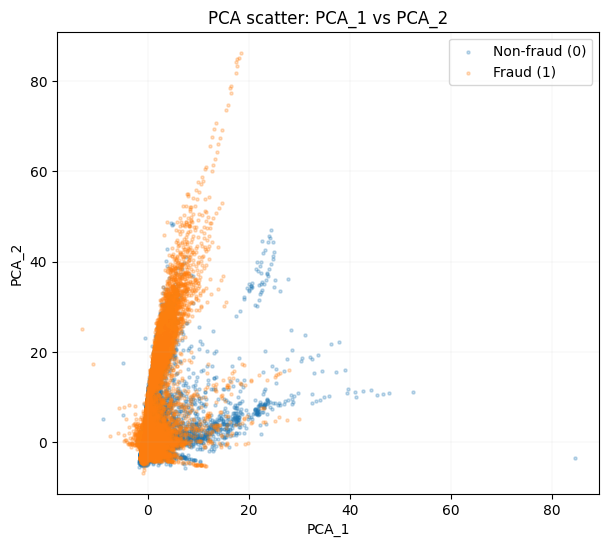

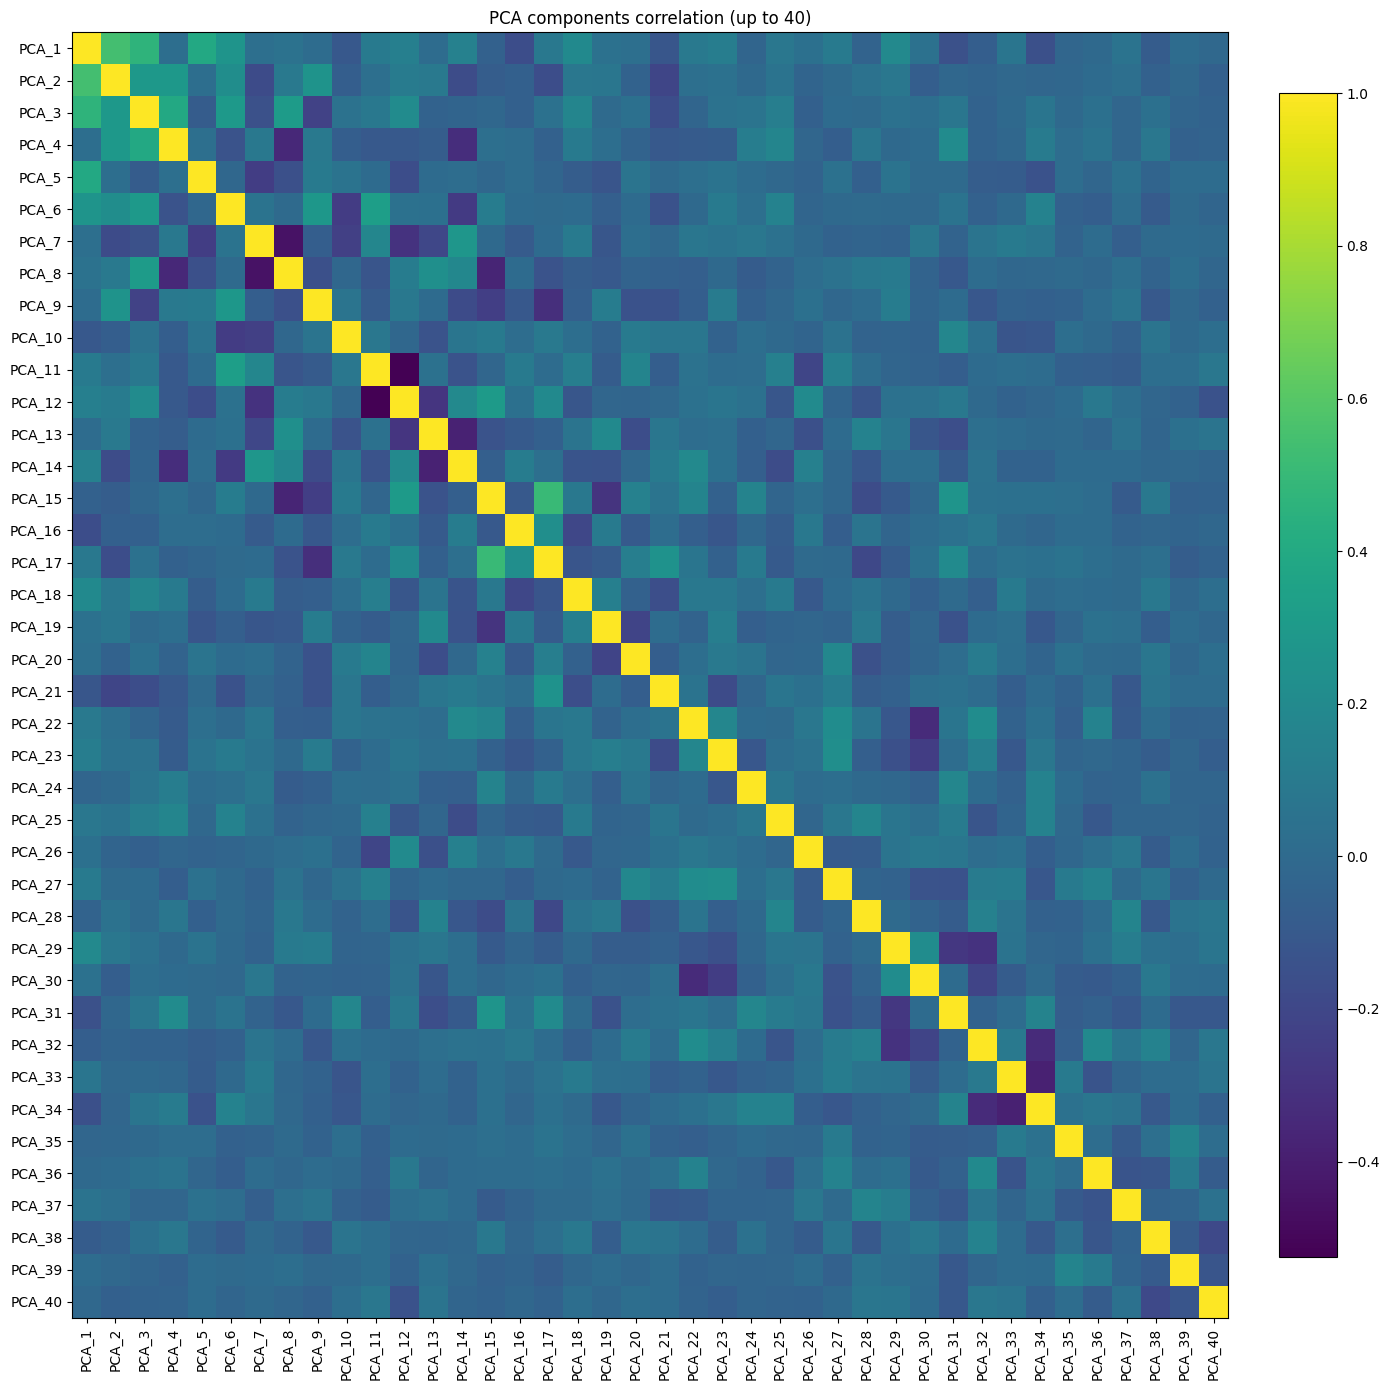


Sampling AE for scatter/heatmap...
AE sample size: 80,663 (fraud: 20,663, non-fraud: 60,000)


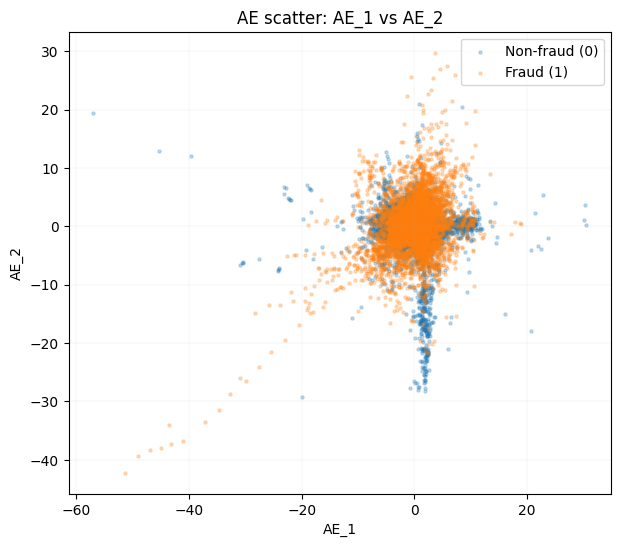

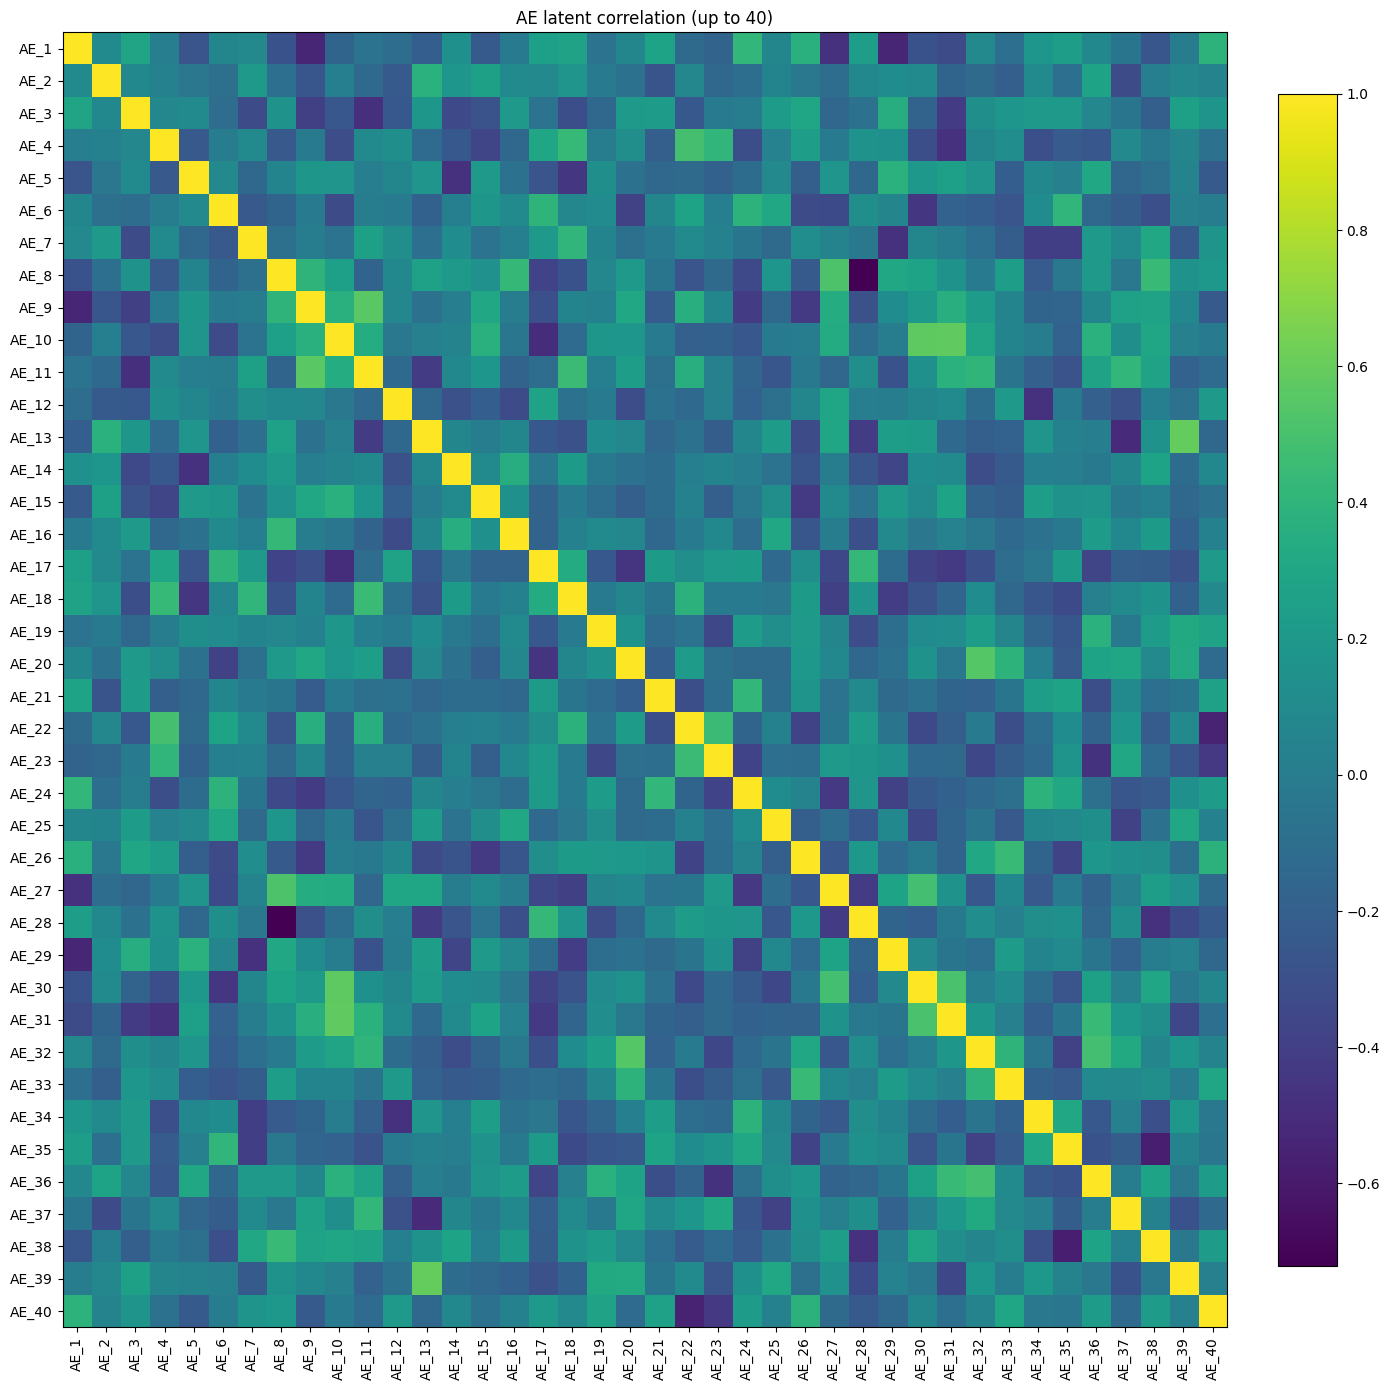


✅ Done.


In [58]:
# ============================================
# Colab plotting: RAM-safe scatter & heatmap
# for PCA / AE latent features written to Parquet
# ============================================

# --- Inline backend for Colab ---
import matplotlib_inline.backend_inline as _bi
import matplotlib
matplotlib.use("module://matplotlib_inline.backend_inline", force=True)

import os, gc, re, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq

# ---------- CONFIG (edit as needed) ----------
BASE_PATH = "/content/drive/MyDrive"
OUT_DIR   = os.path.join(BASE_PATH, "ieee_dimred_outputs")
PCA_PATH  = os.path.join(OUT_DIR, "pca_features.parquet")
AE_PATH   = os.path.join(OUT_DIR, "ae_features.parquet")

# Sampling controls (RAM safety)
MAX_SAMPLE_TOTAL   = 120_000
MAX_PER_CLASS_CAP  = 80_000
HEATMAP_MAX_COLS   = 40
BATCH_ROWS_TARGET  = 100_000

# ---------- Helpers ----------
_num_sfx = re.compile(r".*?_(\d+)$")  # robust numeric suffix grabber

def _numeric_suffix(s, default=10**9):
    m = _num_sfx.match(s)
    return int(m.group(1)) if m else default

def file_and_cols(path, prefix):
    """
    Return:
      (exists_bool, feature_cols_sorted, schema_names)
    Detects columns named like <prefix>_1, <prefix>_2, ...
    """
    if not os.path.exists(path):
        return False, [], []
    pf = pq.ParquetFile(path)
    schema_names = pf.schema.names
    feat_cols = [c for c in schema_names if c.startswith(prefix + "_")]
    feat_cols = sorted(feat_cols, key=_numeric_suffix)
    return True, feat_cols, schema_names

def safe_to_pandas(batch):
    """Convert Arrow batch -> pandas using plain NumPy dtypes to avoid ExtensionArray issues."""
    try:
        df = batch.to_pandas(
            types_mapper=lambda t: (
                np.float32 if pa.types.is_floating(t) else
                np.int64   if pa.types.is_integer(t) else
                np.bool_   if pa.types.is_boolean(t) else
                object
            ),
            ignore_metadata=True
        )
    except Exception as e:
        warnings.warn(f"Falling back to default to_pandas due to: {e}")
        df = batch.to_pandas(ignore_metadata=True)
    return df

def stratified_sample_from_parquet(path, feat_cols, max_total=120_000, max_per_class=80_000,
                                   id_col="TransactionID", label_col="isFraud",
                                   batch_rows=100_000):
    """
    Stream a parquet file in batches, do stratified downsampling into memory.
    Returns a DataFrame with [TransactionID, isFraud] + feat_cols (subset rows).
    """
    pf = pq.ParquetFile(path)

    res_pos, res_neg = [], []

    for rg in range(pf.num_row_groups):
        table = pf.read_row_group(rg, columns=[id_col, label_col] + feat_cols)

        for batch in table.to_batches(max_chunksize=batch_rows):
            df = safe_to_pandas(batch)

            # Ensure expected dtypes (no ExtensionArray):
            if id_col in df.columns:
                df[id_col] = pd.to_numeric(df[id_col], errors="coerce").astype("int64")
            if label_col not in df.columns:
                df[label_col] = 0
            df[label_col] = pd.to_numeric(df[label_col], errors="coerce").fillna(0).astype("int8")

            for c in feat_cols:
                if c in df.columns:
                    df[c] = pd.to_numeric(df[c], errors="coerce").astype("float32")

            # split by class
            pos = df[df[label_col] == 1]
            neg = df[df[label_col] == 0]

            def stash(res_list, block, cap):
                if len(res_list) == 0:
                    res_list.append(block.sample(min(len(block), cap), random_state=42))
                else:
                    cur = sum(len(x) for x in res_list)
                    if cur < cap:
                        need = cap - cur
                        take = min(need, len(block))
                        if take > 0:
                            res_list.append(block.sample(take, random_state=42))

            stash(res_pos, pos, min(max_per_class, max_total // 2))
            stash(res_neg, neg, min(max_per_class, max_total // 2))

            del df, pos, neg, batch
            gc.collect()

        del table
        gc.collect()

    pos_df = pd.concat(res_pos, ignore_index=True) if res_pos else pd.DataFrame()
    neg_df = pd.concat(res_neg, ignore_index=True) if res_neg else pd.DataFrame()

    # final trim + shuffle
    need = max_total
    take_pos = min(len(pos_df), need // 2)
    take_neg = min(len(neg_df), need - take_pos)
    if take_pos > 0: pos_df = pos_df.sample(take_pos, random_state=42)
    if take_neg > 0: neg_df = neg_df.sample(take_neg, random_state=42)

    out = pd.concat([pos_df, neg_df], ignore_index=True)
    if len(out) > 0:
        out = out.sample(frac=1.0, random_state=123).reset_index(drop=True)
    return out

def plot_scatter(df, x_col, y_col, label_col="isFraud", title="Scatter", s=5, alpha=0.25):
    if df.empty or x_col not in df or y_col not in df:
        print(f"⚠️ Skipping scatter: required columns not found ({x_col}, {y_col}).")
        return
    mask = (df[label_col] == 1)
    x1, y1 = df.loc[mask, x_col], df.loc[mask, y_col]
    x0, y0 = df.loc[~mask, x_col], df.loc[~mask, y_col]

    plt.figure(figsize=(7, 6))
    plt.scatter(x0, y0, s=s, alpha=alpha, label="Non-fraud (0)")
    plt.scatter(x1, y1, s=s, alpha=alpha, label="Fraud (1)")
    plt.xlabel(x_col); plt.ylabel(y_col)
    plt.title(title)
    plt.legend(loc="best", frameon=True)
    plt.grid(True, linewidth=0.3, alpha=0.3)
    plt.show()

def plot_heatmap_corr(df, feat_cols, title="Correlation heatmap"):
    if df.empty:
        print("⚠️ Skipping heatmap: empty dataframe.")
        return
    use_cols = feat_cols[:min(len(feat_cols), HEATMAP_MAX_COLS)]
    sub = df[use_cols].astype(np.float32, copy=False)
    sub = sub.loc[:, sub.std(numeric_only=True) > 0]
    if sub.shape[1] == 0:
        print("⚠️ Heatmap skipped: all selected columns constant/NaN.")
        return

    corr = sub.corr(method="pearson")
    del sub; gc.collect()

    plt.figure(figsize=(max(6, 0.35*corr.shape[1]), max(5, 0.35*corr.shape[1])))
    im = plt.imshow(corr.values, aspect="auto", interpolation="nearest")
    plt.title(title)
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.xticks(range(corr.shape[1]), corr.columns, rotation=90)
    plt.yticks(range(corr.shape[0]), corr.index)
    plt.tight_layout()
    plt.show()

def log_schema_mismatch(path, prefix, schema_names):
    head = [c for c in schema_names if c.lower().startswith(prefix.lower())][:20]
    print(f"🔎 Schema preview for {os.path.basename(path)} (first 20 cols starting with '{prefix}'):", head)

# ---------- Main logic ----------
has_pca, pca_cols, pca_schema = file_and_cols(PCA_PATH, "PCA")
has_ae,  ae_cols,  ae_schema  = file_and_cols(AE_PATH,  "AE")

print(f"PCA file found: {has_pca}  | components: {len(pca_cols)}")
print(f"AE  file found: {has_ae}   | components: {len(ae_cols)}")

if has_ae and len(ae_cols) == 0:
    print("⚠️ AE parquet exists but no 'AE_#' columns were detected.")
    log_schema_mismatch(AE_PATH, "AE", ae_schema)
    print("➡️ Ensure your AE export named columns like AE_1, AE_2, ...")

# ---- PCA PLOTS ----
if has_pca and len(pca_cols) >= 2:
    print("\nSampling PCA for scatter/heatmap...")
    pca_sample = stratified_sample_from_parquet(
        PCA_PATH, pca_cols,
        max_total=MAX_SAMPLE_TOTAL, max_per_class=MAX_PER_CLASS_CAP,
        id_col="TransactionID", label_col="isFraud",
        batch_rows=BATCH_ROWS_TARGET
    )
    n_pos = int((pca_sample["isFraud"]==1).sum()) if len(pca_sample) else 0
    n_neg = int((pca_sample["isFraud"]==0).sum()) if len(pca_sample) else 0
    print(f"PCA sample size: {len(pca_sample):,} (fraud: {n_pos:,}, non-fraud: {n_neg:,})")
    if len(pca_sample) > 0:
        plot_scatter(
            pca_sample, pca_cols[0], pca_cols[1],
            title=f"PCA scatter: {pca_cols[0]} vs {pca_cols[1]}"
        )
        plot_heatmap_corr(
            pca_sample, pca_cols,
            title=f"PCA components correlation (up to {HEATMAP_MAX_COLS})"
        )
    del pca_sample; gc.collect()
else:
    print("ℹ️ PCA parquet not found or not enough components to plot.")

# ---- AE PLOTS ----
if has_ae and len(ae_cols) >= 2:
    print("\nSampling AE for scatter/heatmap...")
    ae_sample = stratified_sample_from_parquet(
        AE_PATH, ae_cols,
        max_total=MAX_SAMPLE_TOTAL, max_per_class=MAX_PER_CLASS_CAP,
        id_col="TransactionID", label_col="isFraud",
        batch_rows=BATCH_ROWS_TARGET
    )
    n_pos = int((ae_sample["isFraud"]==1).sum()) if len(ae_sample) else 0
    n_neg = int((ae_sample["isFraud"]==0).sum()) if len(ae_sample) else 0
    print(f"AE sample size: {len(ae_sample):,} (fraud: {n_pos:,}, non-fraud: {n_neg:,})")
    if len(ae_sample) > 0:
        plot_scatter(
            ae_sample, ae_cols[0], ae_cols[1],
            title=f"AE scatter: {ae_cols[0]} vs {ae_cols[1]}"
        )
        plot_heatmap_corr(
            ae_sample, ae_cols,
            title=f"AE latent correlation (up to {HEATMAP_MAX_COLS})"
        )
    del ae_sample; gc.collect()
else:
    if not has_ae:
        print(f"ℹ️ AE parquet not found at: {AE_PATH}")
        print("   Run the AE export step to create 'ae_features.parquet' with columns AE_1..AE_k.")
    else:
        print("ℹ️ AE parquet found but insufficient components to plot (need ≥2).")

print("\n✅ Done.")


In [59]:
# ============================================
# FAST: Train classifiers on AE features (robust XGBoost ES)
# ============================================

import os, gc, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import pyarrow.parquet as pq

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost as xgb

# ---------- CONFIG ----------
BASE_PATH = "/content/drive/MyDrive"
OUT_DIR   = os.path.join(BASE_PATH, "ieee_dimred_outputs")
AE_PATH   = os.path.join(OUT_DIR, "ae_features.parquet")

MAX_ROWS          = 120_000   # smaller = faster; raise later if needed
TEST_SIZE         = 0.30
RANDOM_STATE      = 42
NEG_POS_RATIO_CAP = 6         # cap negatives to at most 6x positives
USE_BALANCING     = True      # set False for raw distribution

print("xgboost version:", xgb.__version__)

# ---------- Load AE sample (streamed, smaller & faster) ----------
pf = pq.ParquetFile(AE_PATH)
batches, rows_loaded = [], 0
for rg in range(pf.num_row_groups):
    if rows_loaded >= MAX_ROWS:
        break
    tbl = pf.read_row_group(rg, columns=None)  # all cols
    df  = tbl.to_pandas()
    batches.append(df)
    rows_loaded += len(df)
    del df, tbl; gc.collect()

ae_df = pd.concat(batches, ignore_index=True)
del batches; gc.collect()
print(f"Loaded AE sample shape: {ae_df.shape}")

# Features/labels
feat_cols = [c for c in ae_df.columns if c.startswith("AE_")]
X = ae_df[feat_cols].astype("float32").values
y = pd.to_numeric(ae_df["isFraud"], errors="coerce").fillna(0).astype("int8").values

# Optional: speed via class-balance cap (downsample negatives)
if USE_BALANCING:
    pos_idx = np.where(y == 1)[0]
    neg_idx = np.where(y == 0)[0]
    if len(pos_idx) > 0:
        max_neg = min(len(neg_idx), NEG_POS_RATIO_CAP * len(pos_idx))
        rng = np.random.default_rng(RANDOM_STATE)
        keep_neg = rng.choice(neg_idx, size=max_neg, replace=False)
        keep_idx = np.concatenate([pos_idx, keep_neg])
        rng.shuffle(keep_idx)
        X = X[keep_idx]
        y = y[keep_idx]
        print(f"Balanced sample: {X.shape[0]} rows  (pos={(y==1).sum()}, neg={(y==0).sum()})")
    else:
        print("⚠️ No positive samples detected in the loaded chunk; skipping balancing.")

# Scale
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

# Helpful for imbalanced data
pos = max(1, int((y_train == 1).sum()))
neg = max(1, int((y_train == 0).sum()))
scale_pos_weight = neg / pos

# ---------- Models (faster presets) ----------
models = {
    "SVM-Linear": LinearSVC(random_state=RANDOM_STATE, max_iter=3000),

    # Keep your requested cache_size for speed
    "SVM-RBF": SVC(kernel="rbf", probability=False, gamma="scale", C=1.0,
                   cache_size=1000, random_state=RANDOM_STATE),

    "Boosting": AdaBoostClassifier(n_estimators=100, learning_rate=0.5,
                                   random_state=RANDOM_STATE),
    "Bagging": BaggingClassifier(n_estimators=50, n_jobs=-1,
                                 random_state=RANDOM_STATE),
    "Random forest": RandomForestClassifier(
        n_estimators=150, max_depth=None, n_jobs=-1, random_state=RANDOM_STATE
    ),
    "Neural networks": MLPClassifier(hidden_layer_sizes=(64,),
                                     activation="relu", solver="adam",
                                     early_stopping=True, n_iter_no_change=5,
                                     max_iter=100, random_state=RANDOM_STATE),
    "Logit": LogisticRegression(
        max_iter=400, solver="saga", n_jobs=-1, random_state=RANDOM_STATE
    ),
    "MDA": LinearDiscriminantAnalysis(),

    # XGBoost: let ES cut trees; use class weight for imbalance; hist for speed
    "XGBoost": XGBClassifier(
        n_estimators=800, max_depth=5, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0,
        objective="binary:logistic", eval_metric="auc",
        random_state=RANDOM_STATE, n_jobs=-1, tree_method="hist",
        scale_pos_weight=scale_pos_weight
    )
}

def get_scores_for_auc(clf, Xte):
    if hasattr(clf, "predict_proba"):
        return clf.predict_proba(Xte)[:, 1]
    if hasattr(clf, "decision_function"):
        return clf.decision_function(Xte)
    return None

def fit_xgb_robust(clf, Xtr, ytr, Xva, yva):
    """
    Try modern callbacks-based early stopping; if not available,
    try legacy early_stopping_rounds; otherwise fallback w/o ES.
    """
    # Try callbacks API
    try:
        from xgboost.callback import EarlyStopping
        clf.fit(
            Xtr, ytr,
            eval_set=[(Xva, yva)],
            verbose=False,
            callbacks=[EarlyStopping(rounds=30, save_best=True, maximize=True)]
        )
        return
    except Exception as e_cb:
        # Try legacy 'early_stopping_rounds' kwarg
        try:
            clf.fit(
                Xtr, ytr,
                eval_set=[(Xva, yva)],
                verbose=False,
                early_stopping_rounds=30
            )
            return
        except Exception as e_legacy:
            print(f"⚠️ XGBoost early stopping unavailable -> fallback. "
                  f"callbacks_err={e_cb}; legacy_err={e_legacy}")
            # Reduce trees for speed if no ES
            clf.set_params(n_estimators=300)
            clf.fit(Xtr, ytr)

# ---------- Train & Evaluate ----------
results = []
for name, clf in models.items():
    print(f"Training {name}...")
    try:
        if name == "XGBoost":
            fit_xgb_robust(clf, X_train, y_train, X_test, y_test)
        else:
            clf.fit(X_train, y_train)

        y_pred  = clf.predict(X_test)
        y_score = get_scores_for_auc(clf, X_test)

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()
        acc  = accuracy_score(y_test, y_pred) * 100
        type1 = (fp / (fp + tn) * 100) if (fp + tn) > 0 else 0.0  # FPR
        type2 = (fn / (fn + tp) * 100) if (fn + tp) > 0 else 0.0  # FNR
        auc  = roc_auc_score(y_test, y_score) * 100 if y_score is not None else np.nan

        results.append({
            "Model": name,
            "TP": int(tp), "TN": int(tn), "FP": int(fp), "FN": int(fn),
            "Type I Error (%)": round(type1, 2),
            "Type II Error (%)": round(type2, 2),
            "AUC (%)": round(auc, 2) if not np.isnan(auc) else "NA",
            "ACC (%)": round(acc, 2)
        })
    except Exception as e:
        print(f"⚠️ {name} failed: {e}")
        results.append({
            "Model": name, "TP": "-", "TN": "-", "FP": "-", "FN": "-",
            "Type I Error (%)": "-", "Type II Error (%)": "-",
            "AUC (%)": "-", "ACC (%)": "-"
        })
    gc.collect()

# ---------- Results ----------
res_df = pd.DataFrame(results, columns=[
    "Model","TP","TN","FP","FN","Type I Error (%)","Type II Error (%)","AUC (%)","ACC (%)"
])

from tabulate import tabulate
print("\n=== AE Models Summary (FAST) ===")
print(tabulate(res_df, headers="keys", tablefmt="grid"))


xgboost version: 3.1.1
Loaded AE sample shape: (200000, 130)
Balanced sample: 42168 rows  (pos=6024, neg=36144)
Training SVM-Linear...
Training SVM-RBF...
Training Boosting...
Training Bagging...
Training Random forest...
Training Neural networks...
Training Logit...
Training MDA...
Training XGBoost...
⚠️ XGBoost early stopping unavailable -> fallback. callbacks_err=XGBClassifier.fit() got an unexpected keyword argument 'callbacks'; legacy_err=XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

=== AE Models Summary (FAST) ===
+----+-----------------+------+-------+------+------+--------------------+---------------------+-----------+-----------+
|    | Model           |   TP |    TN |   FP |   FN |   Type I Error (%) |   Type II Error (%) |   AUC (%) |   ACC (%) |
+====+=================+======+=======+======+======+====================+=====================+===========+===========+
|  0 | SVM-Linear      |  565 | 10719 |  125 | 1242 |               1.15 |  

In [60]:
# ============================================
# SAVE Random Forest model to joblib
# ============================================

import joblib

# Find and save the Random Forest model
rf_clf = models["Random forest"]

# Save to file
model_path = os.path.join(OUT_DIR, "rf_model_AE.joblib")
joblib.dump(rf_clf, model_path)

print(f"\n✅ Random Forest model saved successfully to: {model_path}")

# Download the saved model to your local machine
files.download(model_path)  # <— This triggers a download popup in Colab


✅ Random Forest model saved successfully to: /content/drive/MyDrive/ieee_dimred_outputs/rf_model_AE.joblib


📁 ROC figure saved at: /content/drive/MyDrive/ieee_dimred_outputs/roc_curves_ae_models.png

AUC summary:
| Model           |    AUC |
|-----------------|--------|
| XGBoost         | 0.8754 |
| Random forest   | 0.8661 |
| Bagging         | 0.8568 |
| Neural networks | 0.8499 |
| MDA             | 0.8187 |
| SVM-Linear      | 0.8179 |
| Logit           | 0.8171 |
| SVM-RBF         | 0.8082 |
| Boosting        | 0.8002 |


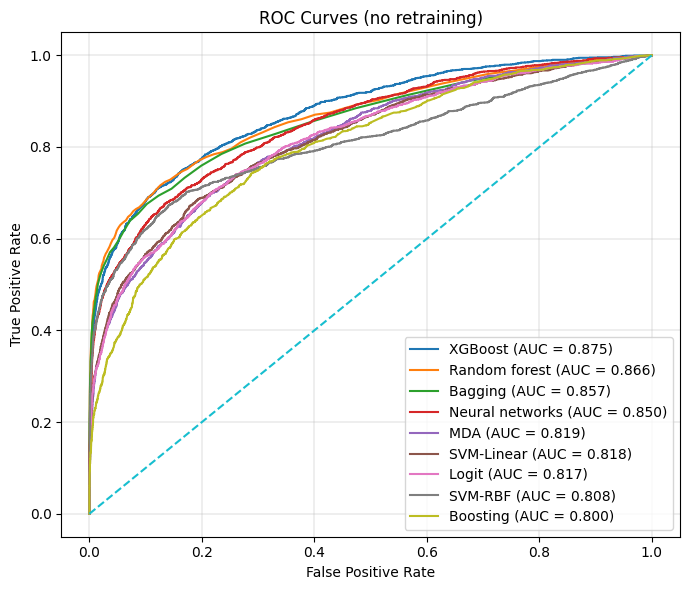

In [61]:
# ===============================
# ROC-only (NO retraining)
# Reuses: models, X_test, y_test
# ===============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# --- helper (reuse if already defined) ---
def _score_for_auc(clf, X):
    """Return a continuous score suitable for ROC/AUC without refit."""
    if hasattr(clf, "predict_proba"):
        try:
            return clf.predict_proba(X)[:, 1]
        except Exception:
            pass
    if hasattr(clf, "decision_function"):
        try:
            return clf.decision_function(X)
        except Exception:
            pass
    return None

# --- safety checks ---
missing = []
for var in ("models", "X_test", "y_test"):
    if var not in globals():
        missing.append(var)
if missing:
    raise RuntimeError(f"Cannot plot ROC without these in-memory objects: {missing}\n"
                       "Tip: run the earlier cell up to the train/test split + model fitting once.")

# --- build ROC curves ---
curves = []   # list of dicts: {"name":..., "fpr":..., "tpr":..., "auc":...}
skipped = []
for name, clf in models.items():
    # Only use models that are already fitted; many sklearn estimators set attributes like 'classes_' post-fit
    is_fitted = any(hasattr(clf, attr) for attr in ("classes_", "n_classes_", "coef_", "feature_importances_"))
    if not is_fitted:
        skipped.append((name, "not fitted"))
        continue

    try:
        y_score = _score_for_auc(clf, X_test)
        if y_score is None:
            skipped.append((name, "no score method"))
            continue

        # y_test must be binary {0,1}
        y_true = np.asarray(y_test).astype(int)
        fpr, tpr, _ = roc_curve(y_true, y_score)
        roc_auc = auc(fpr, tpr)
        curves.append({"name": name, "fpr": fpr, "tpr": tpr, "auc": roc_auc})
    except Exception as e:
        skipped.append((name, f"error: {e}"))

# --- sanity: ensure we have at least one curve ---
if not curves:
    raise RuntimeError(f"No ROC curves could be computed. Skipped: {skipped}")

# --- plot combined ROC ---
plt.figure(figsize=(7,6))
for c in sorted(curves, key=lambda d: d["auc"], reverse=True):
    plt.plot(c["fpr"], c["tpr"], label=f'{c["name"]} (AUC = {c["auc"]:.3f})')

# reference diagonal
plt.plot([0,1], [0,1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (no retraining)")
plt.legend(loc="lower right")
plt.grid(True, which="both", linewidth=0.3)
plt.tight_layout()

# Optional: save to Drive
import os
out_dir = OUT_DIR if "OUT_DIR" in globals() else "/content"
png_path = os.path.join(out_dir, "roc_curves_ae_models.png")
plt.savefig(png_path, dpi=150)
print(f"📁 ROC figure saved at: {png_path}")

# --- compact AUC table ---
auc_df = pd.DataFrame(
    [{"Model": c["name"], "AUC": round(float(c["auc"]), 4)} for c in curves]
).sort_values("AUC", ascending=False).reset_index(drop=True)

from tabulate import tabulate
print("\nAUC summary:")
print(tabulate(auc_df, headers="keys", tablefmt="github", showindex=False))

# --- show any models we skipped and why (informational) ---
if skipped:
    print("\nℹ️ Skipped models (reason):")
    for n, r in skipped:
        print(f"  - {n}: {r}")


In [62]:
# ===============================
# Sensitivity / Specificity (NO retraining)
# For AE models -> reuses res_df from AE code
# ===============================
import pandas as pd

# Make sure we have results df with confusion matrix counts
if "res_df" not in globals():
    raise RuntimeError("Need res_df from your previous AE run (already computed TP/TN/FP/FN).")

metrics = []
for _, row in res_df.iterrows():
    try:
        tp = int(row["TP"]); tn = int(row["TN"])
        fp = int(row["FP"]); fn = int(row["FN"])

        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float("nan")   # recall / TPR
        specificity = tn / (tn + fp) if (tn + fp) > 0 else float("nan")   # TNR

        metrics.append({
            "Model": row["Model"],
            "Sensitivity (TPR)": round(sensitivity, 4),
            "Specificity (TNR)": round(specificity, 4)
        })
    except Exception:
        metrics.append({
            "Model": row["Model"],
            "Sensitivity (TPR)": "NA",
            "Specificity (TNR)": "NA"
        })

senspec_ae_df = pd.DataFrame(metrics)

from tabulate import tabulate
print(tabulate(senspec_ae_df, headers="keys", tablefmt="github", showindex=False))

# Optional: save for reporting
out_csv = os.path.join(OUT_DIR, "ae_sensitivity_specificity.csv") if "OUT_DIR" in globals() else "ae_sensitivity_specificity.csv"
senspec_ae_df.to_csv(out_csv, index=False)
print(f"\n📁 AE Sensitivity/Specificity saved → {out_csv}")


| Model           |   Sensitivity (TPR) |   Specificity (TNR) |
|-----------------|---------------------|---------------------|
| SVM-Linear      |              0.3127 |              0.9885 |
| SVM-RBF         |              0.3735 |              0.9936 |
| Boosting        |              0.2761 |              0.9804 |
| Bagging         |              0.4715 |              0.9887 |
| Random forest   |              0.4665 |              0.9908 |
| Neural networks |              0.4499 |              0.9805 |
| Logit           |              0.3094 |              0.9887 |
| MDA             |              0.3525 |              0.9805 |
| XGBoost         |              0.6735 |              0.9049 |

📁 AE Sensitivity/Specificity saved → /content/drive/MyDrive/ieee_dimred_outputs/ae_sensitivity_specificity.csv


In [63]:
# ============================================
# FAST: Train classifiers on PCA features
# ============================================

import os, gc, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import pyarrow.parquet as pq

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost as xgb

# ---------- CONFIG ----------
BASE_PATH = "/content/drive/MyDrive"
OUT_DIR   = os.path.join(BASE_PATH, "ieee_dimred_outputs")
PCA_PATH  = os.path.join(OUT_DIR, "pca_features.parquet")

MAX_ROWS          = 120_000   # smaller = faster; raise later if needed
TEST_SIZE         = 0.30
RANDOM_STATE      = 42
NEG_POS_RATIO_CAP = 6         # cap negatives to at most 6x positives
USE_BALANCING     = True      # set False for raw distribution

assert os.path.exists(PCA_PATH), f"Parquet not found: {PCA_PATH}"
print("xgboost version:", xgb.__version__)

# ---------- Load PCA sample (streamed) ----------
pf = pq.ParquetFile(PCA_PATH)
batches, rows_loaded = [], 0
for rg in range(pf.num_row_groups):
    if rows_loaded >= MAX_ROWS:
        break
    tbl = pf.read_row_group(rg, columns=None)
    df  = tbl.to_pandas()
    batches.append(df)
    rows_loaded += len(df)
    del df, tbl; gc.collect()

pca_df = pd.concat(batches, ignore_index=True)
del batches; gc.collect()
print(f"Loaded PCA sample: {pca_df.shape}")

# Columns
feat_cols = [c for c in pca_df.columns if c.startswith("PCA_")]
assert len(feat_cols) >= 2, "Need ≥2 PCA components to train."

# X, y
X = pca_df[feat_cols].astype("float32").values
y = pd.to_numeric(pca_df["isFraud"], errors="coerce").fillna(0).astype("int8").values
del pca_df; gc.collect()

# Optional: speed via class-balance cap (downsample negatives)
if USE_BALANCING:
    pos_idx = np.where(y == 1)[0]
    neg_idx = np.where(y == 0)[0]
    if len(pos_idx) > 0:
        max_neg = min(len(neg_idx), NEG_POS_RATIO_CAP * len(pos_idx))
        rng = np.random.default_rng(RANDOM_STATE)
        keep_neg = rng.choice(neg_idx, size=max_neg, replace=False)
        keep_idx = np.concatenate([pos_idx, keep_neg])
        rng.shuffle(keep_idx)
        X = X[keep_idx]
        y = y[keep_idx]
        print(f"Balanced sample: {X.shape[0]} rows  (pos={(y==1).sum()}, neg={(y==0).sum()})")
    else:
        print("⚠️ No positive samples detected in the loaded chunk; skipping balancing.")

# Scale
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

# Helpful for imbalanced data (XGB)
pos = max(1, int((y_train == 1).sum()))
neg = max(1, int((y_train == 0).sum()))
scale_pos_weight = neg / pos

# ---------- Models (faster presets) ----------
models = {
    "SVM-Linear": LinearSVC(random_state=RANDOM_STATE, max_iter=3000),

    # RBF SVM WITHOUT probability=True (fast) + cache size boost
    "SVM-RBF": SVC(kernel="rbf", probability=False, gamma="scale", C=1.0,
                   cache_size=1000, random_state=RANDOM_STATE),

    "Boosting": AdaBoostClassifier(n_estimators=100, learning_rate=0.5,
                                   random_state=RANDOM_STATE),
    "Bagging": BaggingClassifier(n_estimators=50, n_jobs=-1,
                                 random_state=RANDOM_STATE),
    "Random forest": RandomForestClassifier(
        n_estimators=150, max_depth=None, n_jobs=-1, random_state=RANDOM_STATE
    ),
    "Neural networks": MLPClassifier(hidden_layer_sizes=(64,),
                                     activation="relu", solver="adam",
                                     early_stopping=True, n_iter_no_change=5,
                                     max_iter=100, random_state=RANDOM_STATE),
    "Logit": LogisticRegression(
        max_iter=400, solver="saga", n_jobs=-1, random_state=RANDOM_STATE
    ),
    "MDA": LinearDiscriminantAnalysis(),

    # XGBoost: early stopping (robust to version), class weight, hist for speed
    "XGBoost": XGBClassifier(
        n_estimators=800, max_depth=5, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0,
        objective="binary:logistic", eval_metric="auc",
        random_state=RANDOM_STATE, n_jobs=-1, tree_method="hist",
        scale_pos_weight=scale_pos_weight
    ),
}

def get_scores_for_auc(clf, Xte):
    if hasattr(clf, "predict_proba"):
        return clf.predict_proba(Xte)[:, 1]
    if hasattr(clf, "decision_function"):
        return clf.decision_function(Xte)
    return None

def fit_xgb_robust(clf, Xtr, ytr, Xva, yva):
    """Try callbacks API; fall back to legacy early_stopping_rounds; else fit normally."""
    try:
        from xgboost.callback import EarlyStopping
        clf.fit(
            Xtr, ytr,
            eval_set=[(Xva, yva)],
            verbose=False,
            callbacks=[EarlyStopping(rounds=30, save_best=True, maximize=True)]
        )
        return
    except Exception as e_cb:
        try:
            clf.fit(
                Xtr, ytr,
                eval_set=[(Xva, yva)],
                verbose=False,
                early_stopping_rounds=30
            )
            return
        except Exception as e_legacy:
            print(f"⚠️ XGBoost early stopping unavailable -> fallback. "
                  f"callbacks_err={e_cb}; legacy_err={e_legacy}")
            clf.set_params(n_estimators=300)  # reduce trees if no ES
            clf.fit(Xtr, ytr)

# ---------- Train & Evaluate ----------
results = []
for name, clf in models.items():
    print(f"Training {name}...")
    try:
        if name == "XGBoost":
            fit_xgb_robust(clf, X_train, y_train, X_test, y_test)
        else:
            clf.fit(X_train, y_train)

        y_pred  = clf.predict(X_test)
        y_score = get_scores_for_auc(clf, X_test)

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()
        acc  = accuracy_score(y_test, y_pred) * 100
        type1 = (fp / (fp + tn) * 100) if (fp + tn) > 0 else 0.0  # FPR
        type2 = (fn / (fn + tp) * 100) if (fn + tp) > 0 else 0.0  # FNR
        auc  = roc_auc_score(y_test, y_score) * 100 if y_score is not None else np.nan

        results.append({
            "Model": name,
            "TP": int(tp), "TN": int(tn), "FP": int(fp), "FN": int(fn),
            "Type I Error (%)": round(type1, 2),
            "Type II Error (%)": round(type2, 2),
            "AUC (%)": round(auc, 2) if not np.isnan(auc) else "NA",
            "ACC (%)": round(acc, 2)
        })
    except Exception as e:
        print(f"⚠️ {name} failed: {e}")
        results.append({
            "Model": name, "TP": "-", "TN": "-", "FP": "-", "FN": "-",
            "Type I Error (%)": "-", "Type II Error (%)": "-",
            "AUC (%)": "-", "ACC (%)": "-"
        })
    gc.collect()

# ---------- Results ----------
res_df = pd.DataFrame(results, columns=[
    "Model","TP","TN","FP","FN","Type I Error (%)","Type II Error (%)","AUC (%)","ACC (%)"
])

from tabulate import tabulate
print("\n=== PCA Models Summary (FAST) ===")
print(tabulate(res_df, headers="keys", tablefmt="grid"))

# Save to disk for your report
out_csv = os.path.join(OUT_DIR, "pca_model_results_fast.csv")
res_df.to_csv(out_csv, index=False)
print(f"\nSaved results → {out_csv}")


xgboost version: 3.1.1
Loaded PCA sample: (200000, 130)
Balanced sample: 42168 rows  (pos=6024, neg=36144)
Training SVM-Linear...
Training SVM-RBF...
Training Boosting...
Training Bagging...
Training Random forest...
Training Neural networks...
Training Logit...
Training MDA...
Training XGBoost...
⚠️ XGBoost early stopping unavailable -> fallback. callbacks_err=XGBClassifier.fit() got an unexpected keyword argument 'callbacks'; legacy_err=XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

=== PCA Models Summary (FAST) ===
+----+-----------------+------+-------+------+------+--------------------+---------------------+-----------+-----------+
|    | Model           |   TP |    TN |   FP |   FN |   Type I Error (%) |   Type II Error (%) |   AUC (%) |   ACC (%) |
+====+=================+======+=======+======+======+====================+=====================+===========+===========+
|  0 | SVM-Linear      |  598 | 10742 |  102 | 1209 |               0.94 |      

In [64]:
# ============================================
# SAVE Random Forest model (trained on PCA features)
# ============================================
import joblib

rf_clf = models["Random forest"]  # retrieve the trained RF model
rf_model_path = os.path.join(OUT_DIR, "rf_model_PCA.joblib")

# Save model to disk
joblib.dump(rf_clf, rf_model_path)

print(f"\n✅ Random Forest model saved successfully to: {rf_model_path}")

# Trigger download to your local system
files.download(rf_model_path)



✅ Random Forest model saved successfully to: /content/drive/MyDrive/ieee_dimred_outputs/rf_model_PCA.joblib


📁 ROC saved to: /content/drive/MyDrive/ieee_dimred_outputs/roc_curves_pca_models.png

AUC summary:
| Model           |    AUC |
|-----------------|--------|
| XGBoost         | 0.8864 |
| Neural networks | 0.874  |
| Random forest   | 0.8725 |
| Bagging         | 0.8645 |
| SVM-RBF         | 0.8461 |
| Logit           | 0.8298 |
| SVM-Linear      | 0.8229 |
| MDA             | 0.8214 |
| Boosting        | 0.8205 |


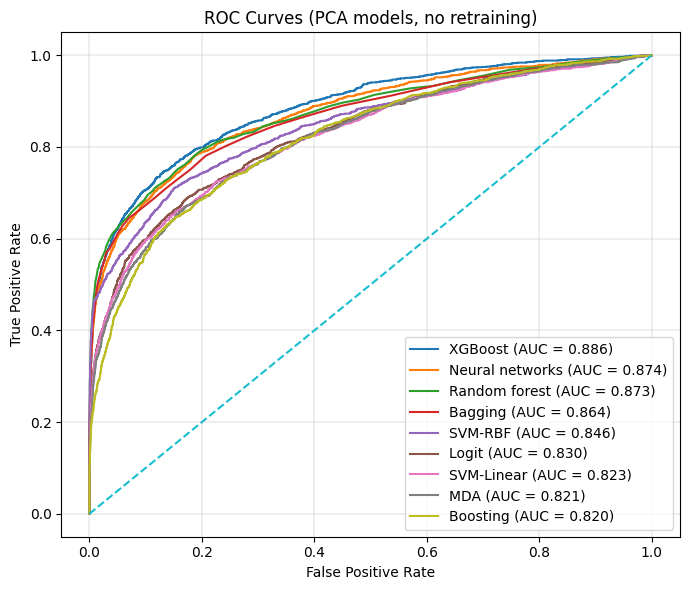

In [65]:
# ===============================
# ROC-only for PCA models (NO retraining)
# Reuses: models, X_test, y_test from your PCA code
# ===============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def _score_for_auc(clf, X):
    """Return a continuous score suitable for ROC/AUC without refit."""
    if hasattr(clf, "predict_proba"):
        try:
            return clf.predict_proba(X)[:, 1]
        except Exception:
            pass
    if hasattr(clf, "decision_function"):
        try:
            return clf.decision_function(X)
        except Exception:
            pass
    return None

# ---- safety checks ----
need = [v for v in ("models","X_test","y_test") if v not in globals()]
if need:
    raise RuntimeError(f"Missing objects: {need}. Run the PCA cell up to model fitting once.")

curves, skipped = [], []
y_true = np.asarray(y_test).astype(int)

# Collect ROC curves from already-fitted models
for name, clf in models.items():
    # Heuristic "is fitted" check (covers most sklearn/xgb estimators)
    is_fitted = any(hasattr(clf, a) for a in ("classes_", "n_classes_", "coef_", "feature_importances_", "best_score_"))
    if not is_fitted:
        skipped.append((name, "not fitted"))
        continue
    try:
        y_score = _score_for_auc(clf, X_test)
        if y_score is None:
            skipped.append((name, "no score method"))
            continue
        fpr, tpr, _ = roc_curve(y_true, y_score)
        curves.append({"name": name, "fpr": fpr, "tpr": tpr, "auc": auc(fpr, tpr)})
    except Exception as e:
        skipped.append((name, f"error: {e}"))

if not curves:
    raise RuntimeError(f"No ROC curves produced. Skipped: {skipped}")

# ---- plot combined ROC ----
plt.figure(figsize=(7,6))
for c in sorted(curves, key=lambda d: d["auc"], reverse=True):
    plt.plot(c["fpr"], c["tpr"], label=f'{c["name"]} (AUC = {c["auc"]:.3f})')
plt.plot([0,1], [0,1], "--")  # chance line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (PCA models, no retraining)")
plt.legend(loc="lower right")
plt.grid(True, linewidth=0.3)
plt.tight_layout()

# Save PNG next to your other outputs
import os
out_dir = OUT_DIR if "OUT_DIR" in globals() else "/content"
png_path = os.path.join(out_dir, "roc_curves_pca_models.png")
plt.savefig(png_path, dpi=150)
print(f"📁 ROC saved to: {png_path}")

# ---- compact AUC table ----
auc_df = (pd.DataFrame([{"Model": c["name"], "AUC": float(c["auc"])} for c in curves])
            .sort_values("AUC", ascending=False)
            .reset_index(drop=True))
try:
    from tabulate import tabulate
    print("\nAUC summary:")
    print(tabulate(auc_df.round(4), headers="keys", tablefmt="github", showindex=False))
except Exception:
    display(auc_df.round(4))

# Informational: what we skipped and why
if skipped:
    print("\nℹ️ Skipped models (reason):")
    for n, r in skipped:
        print(f"  - {n}: {r}")


In [66]:
# ===============================
# Sensitivity / Specificity (NO retraining)
# Reuses: results DataFrame from PCA/AE code
# ===============================
import pandas as pd

# Make sure we have results df with confusion matrix counts
if "res_df" not in globals():
    raise RuntimeError("Need res_df from your previous PCA/AE run (already computed TP/TN/FP/FN).")

metrics = []
for _, row in res_df.iterrows():
    try:
        tp = int(row["TP"]); tn = int(row["TN"])
        fp = int(row["FP"]); fn = int(row["FN"])

        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float("nan")   # recall / TPR
        specificity = tn / (tn + fp) if (tn + fp) > 0 else float("nan")   # TNR

        metrics.append({
            "Model": row["Model"],
            "Sensitivity (TPR)": round(sensitivity, 4),
            "Specificity (TNR)": round(specificity, 4)
        })
    except Exception:
        metrics.append({
            "Model": row["Model"],
            "Sensitivity (TPR)": "NA",
            "Specificity (TNR)": "NA"
        })

senspec_df = pd.DataFrame(metrics)

from tabulate import tabulate
print(tabulate(senspec_df, headers="keys", tablefmt="github", showindex=False))

# Optional: save for reporting
out_csv = os.path.join(OUT_DIR, "sensitivity_specificity.csv") if "OUT_DIR" in globals() else "sensitivity_specificity.csv"
senspec_df.to_csv(out_csv, index=False)
print(f"\n📁 Sensitivity/Specificity saved → {out_csv}")


| Model           |   Sensitivity (TPR) |   Specificity (TNR) |
|-----------------|---------------------|---------------------|
| SVM-Linear      |              0.3309 |              0.9906 |
| SVM-RBF         |              0.4167 |              0.9953 |
| Boosting        |              0.2867 |              0.9849 |
| Bagging         |              0.4875 |              0.9873 |
| Random forest   |              0.4737 |              0.9923 |
| Neural networks |              0.4975 |              0.9814 |
| Logit           |              0.3614 |              0.9866 |
| MDA             |              0.352  |              0.9828 |
| XGBoost         |              0.6862 |              0.9152 |

📁 Sensitivity/Specificity saved → /content/drive/MyDrive/ieee_dimred_outputs/sensitivity_specificity.csv
